# **Problem Statement: What type of movies/shows should Netflix produce to grow its business?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# DEFAULT
sns.set_palette('bright')
current_palette = sns.color_palette()
# sns.palplot(current_palette)

In [3]:
df_main = pd.read_csv("./data/netflix.csv", index_col='show_id')
df_main.head()

type                  title         director  \
show_id                                                    
s1         Movie   Dick Johnson Is Dead  Kirsten Johnson   
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   

                                                      cast        country  \
show_id                                                                     
s1                                                     NaN  United States   
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
s4                                                     NaN            NaN   
s5       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

                 date_added  release_year rating   duration  \
show_id                                                       
s1       September 25, 2021          2020  PG-13     90 min   
s2       September 24, 2021          2021  TV-MA  2 Seasons   
s3       September 24, 2021          2021  TV-MA   1 Season   
s4       September 24, 2021          2021  TV-MA   1 Season   
s5       September 24, 2021          2021  TV-MA  2 Seasons   

                                                 listed_in  \
show_id                                                      
s1                                           Documentaries   
s2         International TV Shows, TV Dramas, TV Mysteries   
s3       Crime TV Shows, International TV Shows, TV Act...   
s4                                  Docuseries, Reality TV   
s5       International TV Shows, Romantic TV Shows, TV ...   

                                               description  
show_id                                                     
s1       As her father nears the end of his life, filmm...  
s2       After crossing paths at a party, a Cape Town t...  
s3       To protect his family from a powerful drug lor...  
s4       Feuds, flirtations and toilet talk go down amo...  
s5       In a city of coaching centers known to train I...

# **Basic structure & characteristics of the dataset**

**Shape**

In [4]:
df_main.shape

(8807, 11)

**Data types of all attributes**

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


**Locating the Missing values**
-  We will treat these missing values when we do the data pre-processing

In [6]:
df_main.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## **Appraoch to perform the EDA:**

-  We identify that there are 2 types of content on Neflix
    1. Movies
    2. TV-Shows
-  We will perform the EDA on both Movies and TV-Shows seperately 

In [7]:
df_main['type'].value_counts()
# plt.figure(figsize=(12,6))
# sns.set_context('talk')
# sns.set_style('whitegrid')
# sns.countplot(x = df_main['type'], 
#               color='lightskyblue', edgecolor='black')
# plt.xlabel(f"Content Type")
# plt.ylabel('Count')
# plt.title('Count of different types of content on Netflix')
# plt.savefig('./images/movies_vs_shows_count.png', dpi='figure', bbox_inches='tight')
# plt.show()

Movie      6131
TV Show    2676
Name: type, dtype: int64

# **EDA: Netflix_Movies**

In [8]:
df_mov = df_main.loc[df_main['type'] == 'Movie'].copy()

In [9]:
df_mov.shape

(6131, 11)

In [10]:
df_mov.head()

type                             title  \
show_id                                            
s1       Movie              Dick Johnson Is Dead   
s7       Movie  My Little Pony: A New Generation   
s8       Movie                           Sankofa   
s10      Movie                      The Starling   
s13      Movie                      Je Suis Karl   

                              director  \
show_id                                  
s1                     Kirsten Johnson   
s7       Robert Cullen, José Luis Ucha   
s8                        Haile Gerima   
s10                     Theodore Melfi   
s13                Christian Schwochow   

                                                      cast  \
show_id                                                      
s1                                                     NaN   
s7       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
s8       Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
s10      Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
s13      Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                                   country  \
show_id                                                      
s1                                           United States   
s7                                                     NaN   
s8       United States, Ghana, Burkina Faso, United Kin...   
s10                                          United States   
s13                                Germany, Czech Republic   

                 date_added  release_year rating duration  \
show_id                                                     
s1       September 25, 2021          2020  PG-13   90 min   
s7       September 24, 2021          2021     PG   91 min   
s8       September 24, 2021          1993  TV-MA  125 min   
s10      September 24, 2021          2021  PG-13  104 min   
s13      September 23, 2021          2021  TV-MA  127 min   

                                                listed_in  \
show_id                                                     
s1                                          Documentaries   
s7                               Children & Family Movies   
s8       Dramas, Independent Movies, International Movies   
s10                                      Comedies, Dramas   
s13                          Dramas, International Movies   

                                               description  
show_id                                                     
s1       As her father nears the end of his life, filmm...  
s7       Equestria's divided. But a bright-eyed hero be...  
s8       On a photo shoot in Ghana, an American model s...  
s10      A woman adjusting to life after a loss contend...  
s13      After most of her family is murdered in a terr...

***Movies: Basic details of data***

In [11]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6131 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6131 non-null   object
 1   title         6131 non-null   object
 2   director      5943 non-null   object
 3   cast          5656 non-null   object
 4   country       5691 non-null   object
 5   date_added    6131 non-null   object
 6   release_year  6131 non-null   int64 
 7   rating        6129 non-null   object
 8   duration      6128 non-null   object
 9   listed_in     6131 non-null   object
 10  description   6131 non-null   object
dtypes: int64(1), object(10)
memory usage: 574.8+ KB


***Movies: Features with missing values***

In [12]:
df_mov.isna().sum()

type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

***Movies: % with missing values***

In [13]:
100*(df_mov.isna().sum().loc[df_mov.isna().sum() > 0]/df_mov.shape[0])

director    3.066384
cast        7.747513
country     7.176643
rating      0.032621
duration    0.048932
dtype: float64

## **Movies: Data pre-procesing**

### **Feature: date_added**

In [14]:
def date_clean(date_str):
    year = date_str.split()[-1]
    month = date_str.split()[0][:3]
    return ('-').join((year,month))

df_mov['year_added'] = pd.to_datetime(df_mov['date_added'].apply(date_clean)).dt.year
df_mov['month_added'] = pd.to_datetime(df_mov['date_added'].apply(date_clean)).dt.month

### **Feature: rating**

In [15]:
# df_mov.loc[df_mov['rating'].isna()]
df_mov['rating'].isna().sum()

2

***There are only 2 missing values, we will replace them with the mode***

In [16]:
df_mov['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [17]:
df_mov['rating'].fillna('TV-MA', inplace=True)
df_mov['rating'].isna().sum()

0

### **Feature: duration**

In [18]:
wrong_rating = df_mov.loc[df_mov['duration'].isna()]
wrong_rating

type                                 title    director        cast  \
show_id                                                                        
s5542    Movie                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
s5795    Movie                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
s5814    Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

               country          date_added  release_year  rating duration  \
show_id                                                                     
s5542    United States       April 4, 2017          2017  74 min      NaN   
s5795    United States  September 16, 2016          2010  84 min      NaN   
s5814    United States     August 15, 2016          2015  66 min      NaN   

        listed_in                                        description  \
show_id                                                                
s5542      Movies  Louis C.K. muses on religion, eternal love, gi...   
s5795      Movies  Emmy-winning comedy writer Louis C.K. brings h...   
s5814      Movies  The comic puts his trademark hilarious/thought...   

         year_added  month_added  
show_id                           
s5542          2017            4  
s5795          2016            9  
s5814          2016            8

In [19]:
# Copying rating info to duration column
# Then replacing incorrect rating information with mode_rating
df_mov.loc[wrong_rating.index, 'duration'] = df_mov.loc[wrong_rating.index, 'rating']
df_mov.loc[wrong_rating.index, 'rating'] = 'TV-MA'

In [20]:
df_mov.loc[wrong_rating.index]

type                                 title    director        cast  \
show_id                                                                        
s5542    Movie                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
s5795    Movie                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
s5814    Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

               country          date_added  release_year rating duration  \
show_id                                                                    
s5542    United States       April 4, 2017          2017  TV-MA   74 min   
s5795    United States  September 16, 2016          2010  TV-MA   84 min   
s5814    United States     August 15, 2016          2015  TV-MA   66 min   

        listed_in                                        description  \
show_id                                                                
s5542      Movies  Louis C.K. muses on religion, eternal love, gi...   
s5795      Movies  Emmy-winning comedy writer Louis C.K. brings h...   
s5814      Movies  The comic puts his trademark hilarious/thought...   

         year_added  month_added  
show_id                           
s5542          2017            4  
s5795          2016            9  
s5814          2016            8

In [21]:
df_mov['duration_mins'] = df_mov['duration'].apply(lambda x: int(x.split()[0]))

### **Feature: country**

In [22]:
df_mov['country'].isna().sum()

440

***Calculating count of individual countries***

In [23]:
mov_con = [con.strip() for lst in df_mov.loc[df_mov['country'].isna() == False, 'country'].str.strip(',').str.split(',') for con in lst]
series_mov_con = pd.Series(mov_con)
series_mov_con.value_counts()

United States     2752
India              962
United Kingdom     534
Canada             319
France             303
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Length: 117, dtype: int64

***We have 440 missing values: we will fill missing values with 'Unknown'***

In [24]:
df_mov['country'].fillna('Unknown', inplace=True)
df_mov['country'].isna().sum()

0

***Reformatting the country column so that we can perform eda on it later***

In [25]:
def country_clean(con_str):
    con_lst = [con.strip() for con in con_str.strip(',').split(',')]
    return ('+').join(con_lst)

df_mov['country_mod'] = df_mov['country'].apply(country_clean)

### **Feature: listed_in**

In [26]:
mov_gen = [gen.strip() for lst in df_mov['listed_in'].str.strip(',').str.split(',') for gen in lst]
series_mov_gen = pd.Series(mov_gen)
series_mov_gen.value_counts()

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
dtype: int64

***Reformatting the listed_in column so that we can perform eda on it later***

In [27]:
def genre_clean(gen_str):
    gen_lst = [gen.strip() for gen in gen_str.strip(',').split(',')]
    return ('+').join(gen_lst)

df_mov['genre_mod'] = df_mov['listed_in'].apply(genre_clean)

### **Feature: director**

In [28]:
# df_mov.loc[df_mov['director'].isna()]
df_mov['director'].isna().sum()

188

In [29]:
mov_dir = [dirc.strip() for lst in df_mov.loc[df_mov['director'].isna() == False, 'director'].str.strip(',').str.split(',') for dirc in lst]
series_mov_dir = pd.Series(mov_dir)
series_mov_dir.value_counts()

Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Length: 4777, dtype: int64

***We have 188 missing values: we will fill missing values with 'Unknown'***

In [30]:
df_mov['director'].fillna('Unknown', inplace=True)
df_mov['director'].isna().sum()

0

### **Feature: cast**

In [31]:
# df_mov.loc[df_mov['cast'].isna()]
df_mov['cast'].isna().sum()

475

In [32]:
mov_cast = [cast.strip() for lst in df_mov.loc[df_mov['cast'].isna() == False, 'cast'].str.strip(',').str.split(',') for cast in lst]
series_mov_cast = pd.Series(mov_cast)
series_mov_cast.value_counts()

Anupam Kher              42
Shah Rukh Khan           35
Naseeruddin Shah         32
Akshay Kumar             30
Om Puri                  30
                         ..
Sushma Bakshi             1
Yusuf Hussain             1
Amarjeet Amle             1
Priya                     1
Chittaranjan Tripathy     1
Length: 25951, dtype: int64

***We have 475 missing values: we will fill missing values with 'Unknown'***

In [33]:
df_mov['cast'].fillna('Unknown', inplace=True)
df_mov['cast'].isna().sum()

0

## **Movies: Preparing final data after pre-procesing**

In [34]:
# Before dropping columns
df_mov.head(2)

type                             title  \
show_id                                            
s1       Movie              Dick Johnson Is Dead   
s7       Movie  My Little Pony: A New Generation   

                              director  \
show_id                                  
s1                     Kirsten Johnson   
s7       Robert Cullen, José Luis Ucha   

                                                      cast        country  \
show_id                                                                     
s1                                                 Unknown  United States   
s7       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   

                 date_added  release_year rating duration  \
show_id                                                     
s1       September 25, 2021          2020  PG-13   90 min   
s7       September 24, 2021          2021     PG   91 min   

                        listed_in  \
show_id                             
s1                  Documentaries   
s7       Children & Family Movies   

                                               description  year_added  \
show_id                                                                  
s1       As her father nears the end of his life, filmm...        2021   
s7       Equestria's divided. But a bright-eyed hero be...        2021   

         month_added  duration_mins    country_mod                 genre_mod  
show_id                                                                       
s1                 9             90  United States             Documentaries  
s7                 9             91        Unknown  Children & Family Movies

In [35]:
df_mov.shape

(6131, 16)

In [36]:
# Dropping unnecessary columns (since we have re-formatted them)
df_mov.drop(['country', 'date_added', 'duration', 'listed_in'], axis=1, inplace=True)

In [37]:
# Re-arranging the columns
df_mov = df_mov[['type', 'title', 'director', 'cast', 'description', 'country_mod', 'genre_mod', 'rating', 'duration_mins', 'release_year', 'year_added', 'month_added']]
df_mov.shape

(6131, 12)

### **Final dataset**

In [38]:
df_mov

type                             title  \
show_id                                            
s1       Movie              Dick Johnson Is Dead   
s7       Movie  My Little Pony: A New Generation   
s8       Movie                           Sankofa   
s10      Movie                      The Starling   
s13      Movie                      Je Suis Karl   
...        ...                               ...   
s8802    Movie                           Zinzana   
s8803    Movie                            Zodiac   
s8805    Movie                        Zombieland   
s8806    Movie                              Zoom   
s8807    Movie                            Zubaan   

                              director  \
show_id                                  
s1                     Kirsten Johnson   
s7       Robert Cullen, José Luis Ucha   
s8                        Haile Gerima   
s10                     Theodore Melfi   
s13                Christian Schwochow   
...                                ...   
s8802                  Majid Al Ansari   
s8803                    David Fincher   
s8805                  Ruben Fleischer   
s8806                     Peter Hewitt   
s8807                      Mozez Singh   

                                                      cast  \
show_id                                                      
s1                                                 Unknown   
s7       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
s8       Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
s10      Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
s13      Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                    ...   
s8802    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
s8803    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
s8805    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
s8806    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
s8807    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                               description  \
show_id                                                      
s1       As her father nears the end of his life, filmm...   
s7       Equestria's divided. But a bright-eyed hero be...   
s8       On a photo shoot in Ghana, an American model s...   
s10      A woman adjusting to life after a loss contend...   
s13      After most of her family is murdered in a terr...   
...                                                    ...   
s8802    Recovering alcoholic Talal wakes up inside a s...   
s8803    A political cartoonist, a crime reporter and a...   
s8805    Looking to survive in a world taken over by zo...   
s8806    Dragged from civilian life, a former superhero...   
s8807    A scrappy but poor boy worms his way into a ty...   

                                               country_mod  \
show_id                                                      
s1                                           United States   
s7                                                 Unknown   
s8       United States+Ghana+Burkina Faso+United Kingdo...   
s10                                          United States   
s13                                 Germany+Czech Republic   
...                                                    ...   
s8802                          United Arab Emirates+Jordan   
s8803                                        United States   
s8805                                        United States   
s8806                                        United States   
s8807                                                India   

                                              genre_mod rating  duration_mins  \
show_id                                                                         
s1                                        Documentaries  PG-13             90   
s7                             Children & Family Movies     PG             91   
s8       Dramas+Independent Movies+Intern

## **Movies: Visualization-Univariate**

### **Qualitative variables**

#### **Feature: rating**

In [39]:
print('Total number of unique Movie ratings:', df_mov['rating'].nunique())

Total number of unique Movie ratings: 14


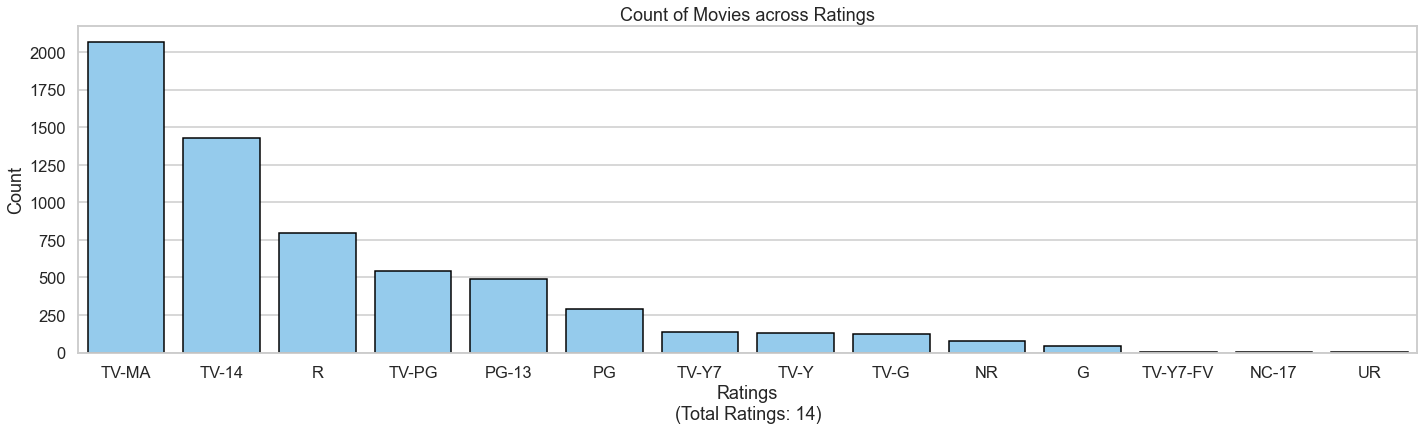

In [40]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.countplot(x = df_mov['rating'],
              order=df_mov['rating'].value_counts().index,
              color='lightskyblue', edgecolor='black')
plt.xlabel(f"Ratings\n(Total Ratings: {df_mov['rating'].nunique()})")
plt.ylabel('Count')
plt.title('Count of Movies across Ratings')
plt.savefig('./images/movies_count_byRating.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: genre**

In [41]:
df_mov['genre_mod'].str.get_dummies(sep='+')

Action & Adventure  Anime Features  Children & Family Movies  \
show_id                                                                 
s1                        0               0                         0   
s7                        0               0                         1   
s8                        0               0                         0   
s10                       0               0                         0   
s13                       0               0                         0   
...                     ...             ...                       ...   
s8802                     0               0                         0   
s8803                     0               0                         0   
s8805                     0               0                         0   
s8806                     0               0                         1   
s8807                     0               0                         0   

         Classic Movies  Comedies  Cult Movies  Documentaries  Dramas  \
show_id                                                                 
s1                    0         0            0              1       0   
s7                    0         0            0              0       0   
s8                    0         0            0              0       1   
s10                   0         1            0              0       1   
s13                   0         0            0              0       1   
...                 ...       ...          ...            ...     ...   
s8802                 0         0            0              0       1   
s8803                 0         0            1              0       1   
s8805                 0         1            0              0       0   
s8806                 0         1            0              0       0   
s8807                 0         0            0              0       1   

         Faith & Spirituality  Horror Movies  Independent Movies  \
show_id                                                            
s1                          0              0                   0   
s7                          0              0                   0   
s8                          0              0                   1   
s10                         0              0                   0   
s13                         0              0                   0   
...                       ...            ...                 ...   
s8802                       0              0                   0   
s8803                       0              0                   0   
s8805                       0              1                   0   
s8806                       0              0                   0   
s8807                       0              0                   0   

         International Movies  LGBTQ Movies  Movies  Music & Musicals  \
show_id                                                                 
s1                          0             0       0                 0   
s7                          0             0       0                 0   
s8                          1             0       0                 0   
s10                         0             0       0                 0   
s13                         1             0       0                 0   
...                       ...           ...     ...               ...   
s8802                       1             0       0                 0   
s8803                       0             0       0                 0   
s8805                       0             0       0                 0   
s8806                       0             0       0                 0   
s8807                       1             0       0                 1   

         Romantic Movies  Sci-Fi & Fantasy  Sports Movies  Stand-Up Comedy  \
show_id                                                                      
s1                     0                 0              0                0   
s7                     0                

In [42]:
print('Total number of unique Movie genres:', series_mov_gen.value_counts().index.nunique())

Total number of unique Movie genres: 20


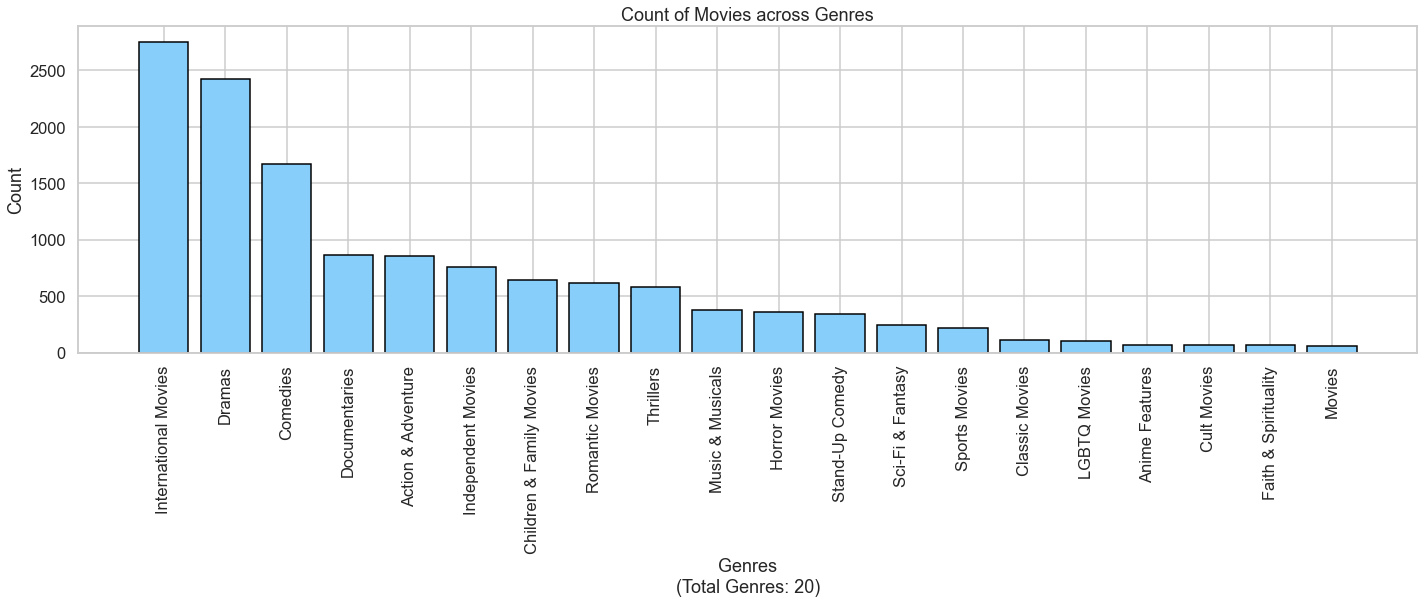

In [43]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_mov_gen.value_counts().index,
        series_mov_gen.value_counts(),
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Genres\n(Total Genres: {series_mov_gen.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of Movies across Genres')
plt.savefig('./images/movies_count_byGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: country**

In [44]:
df_mov['country_mod'].str.get_dummies(sep='+')

Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
show_id                                                                         
s1                 0        0        0       0          0        0          0   
s7                 0        0        0       0          0        0          0   
s8                 0        0        0       0          0        0          0   
s10                0        0        0       0          0        0          0   
s13                0        0        0       0          0        0          0   
...              ...      ...      ...     ...        ...      ...        ...   
s8802              0        0        0       0          0        0          0   
s8803              0        0        0       0          0        0          0   
s8805              0        0        0       0          0        0          0   
s8806              0        0        0       0          0        0          0   
s8807              0        0        0       0          0        0          0   

         Austria  Bahamas  Bangladesh  ...  United Arab Emirates  \
show_id                                ...                         
s1             0        0           0  ...                     0   
s7             0        0           0  ...                     0   
s8             0        0           0  ...                     0   
s10            0        0           0  ...                     0   
s13            0        0           0  ...                     0   
...          ...      ...         ...  ...                   ...   
s8802          0        0           0  ...                     1   
s8803          0        0           0  ...                     0   
s8805          0        0           0  ...                     0   
s8806          0        0           0  ...                     0   
s8807          0        0           0  ...                     0   

         United Kingdom  United States  Unknown  Uruguay  Vatican City  \
show_id                                                                  
s1                    0              1        0        0             0   
s7                    0              0        1        0             0   
s8                    1              1        0        0             0   
s10                   0              1        0        0             0   
s13                   0              0        0        0             0   
...                 ...            ...      ...      ...           ...   
s8802                 0              0        0        0             0   
s8803                 0              1        0        0             0   
s8805                 0              1        0        0             0   
s8806                 0              1        0        0             0   
s8807                 0              0        0        0             0   

         Venezuela  Vietnam  West Germany  Zimbabwe  
show_id                                              
s1               0        0             0         0  
s7               0        0             0         0  
s8               0        0             0         0  
s10              0        0             0         0  
s13              0        0             0         0  
...            ...      ...           ...       ...  
s8802            0        0             0         0  
s8803            0        0             0         0  
s8805            0        0             0         0  
s8806            0        0             0         0  
s8807            0        0             0         0  

[6131 rows x 118 columns]

In [45]:
print('Total number of unique movie-producing countries:', series_mov_con.value_counts().index.nunique())

Total number of unique movie-producing countries: 117


Since there are a large number of countires:  
we will see only the Top-20 content-producing countries and count of movies per country

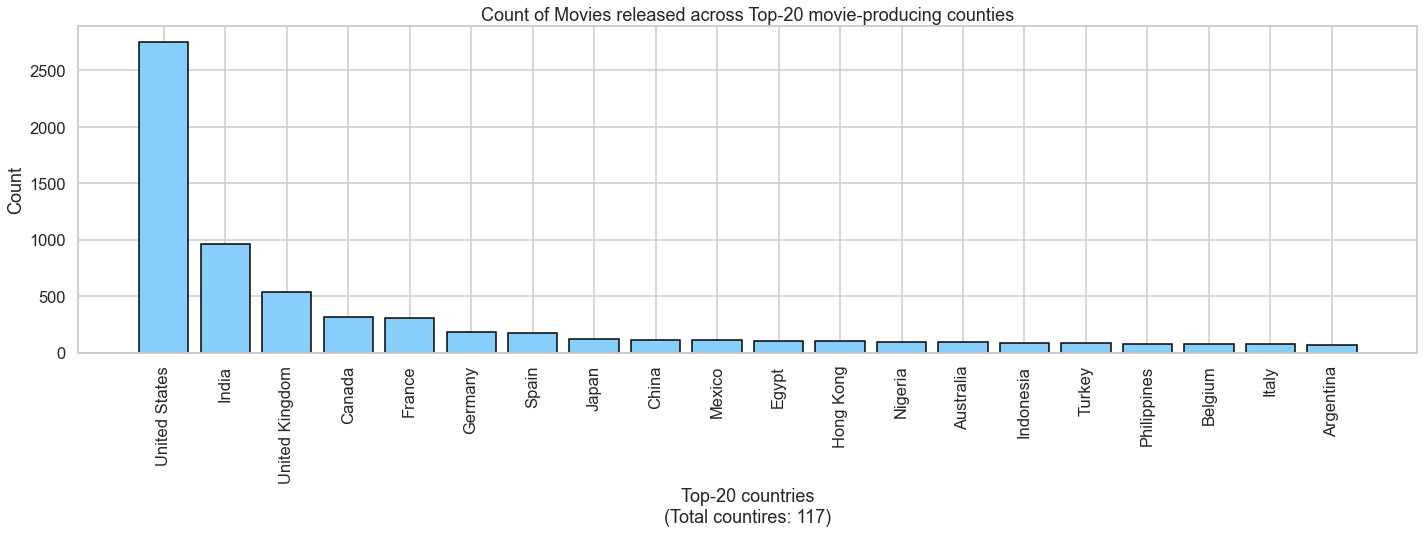

In [46]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_mov_con.value_counts().index[:20], 
        series_mov_con.value_counts()[:20], 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Top-20 countries\n(Total countires: {series_mov_con.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of Movies released across Top-20 movie-producing counties')
plt.savefig('./images/movies_count_byCountry.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: director**

In [47]:
print('Total number of unique Movie directors:', series_mov_dir.value_counts().index.nunique())

Total number of unique Movie directors: 4777


Since there are a large number of directors:  
we will see only the Top-30 directors by movies directed

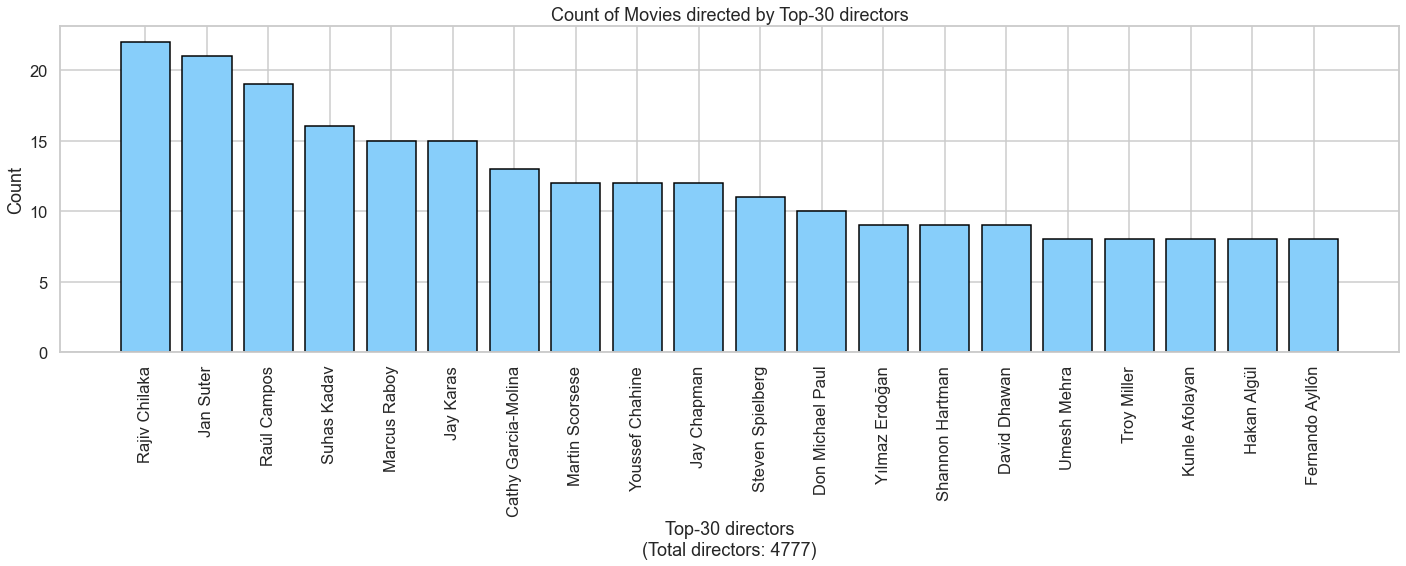

In [48]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_mov_dir.value_counts().index[:20], 
        series_mov_dir.value_counts()[:20], 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Top-30 directors\n(Total directors: {series_mov_dir.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of Movies directed by Top-30 directors')
plt.savefig('./images/movies_count_byDirector.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: cast**

In [49]:
print('Total number of unique Movie actors:', series_mov_cast.value_counts().index.nunique())

Total number of unique Movie actors: 25951


Since there are a large number of actors:  
we will see only the Top-30 actors by movies acted in

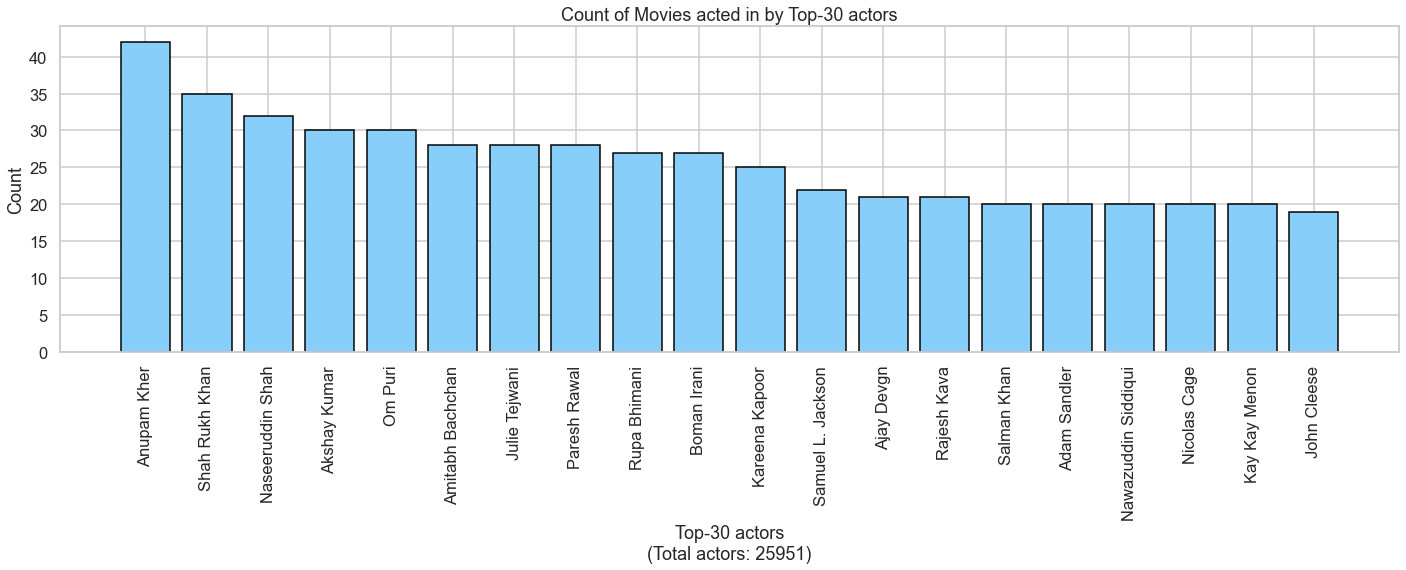

In [50]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_mov_cast.value_counts().index[:20], 
        series_mov_cast.value_counts()[:20], 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Top-30 actors\n(Total actors: {series_mov_cast.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of Movies acted in by Top-30 actors')
plt.savefig('./images/movies_count_byActor.png', dpi='figure', bbox_inches='tight')
plt.show()

### **Quantitative variables**

#### **Feature: release_year**

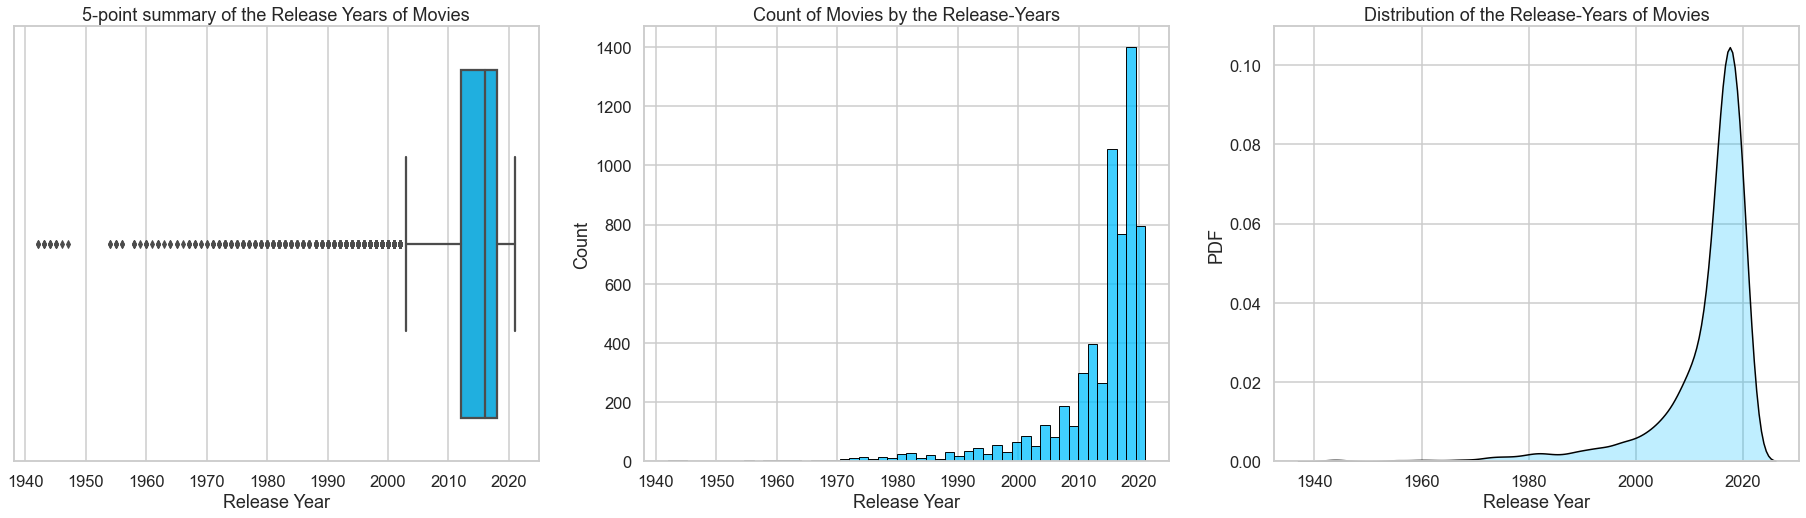

In [51]:
fig = plt.figure(figsize=(32,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 3, 1)
sns.boxplot(x=df_mov['release_year'], color='deepskyblue')
plt.xlabel('Release Year')
plt.title('5-point summary of the Release Years of Movies')
plt.subplot(1, 3, 2)
sns.histplot(x = df_mov['release_year'], bins=50, 
             color='deepskyblue', edgecolor='black')
plt.title('Count of Movies by the Release-Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.kdeplot(df_mov['release_year'], 
            fill=True, color='deepskyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('PDF')
plt.title('Distribution of the Release-Years of Movies')
plt.savefig('./images/movies_byReleaseYear.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: duration**

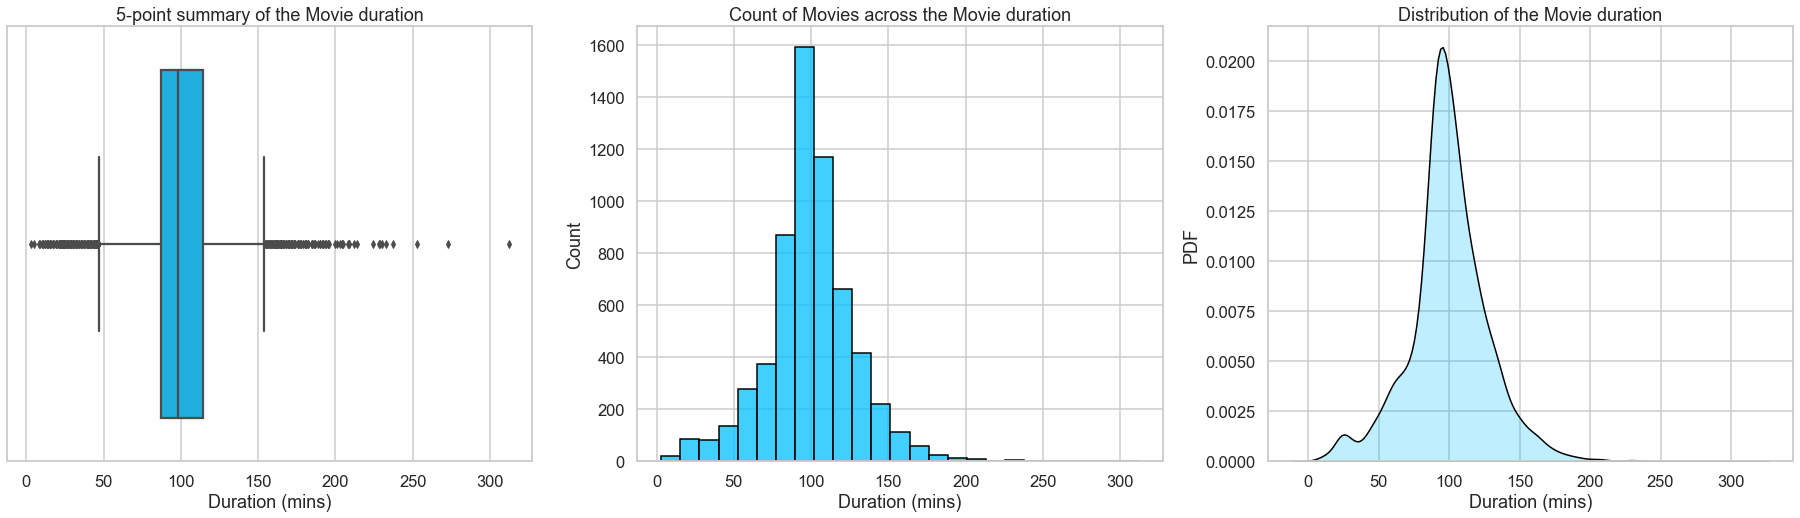

In [52]:
fig = plt.figure(figsize=(32,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 3, 1)
sns.boxplot(x=df_mov['duration_mins'], color='deepskyblue')
plt.xlabel('Duration (mins)')
plt.title('5-point summary of the Movie duration')
plt.subplot(1, 3, 2)
sns.histplot(x = df_mov['duration_mins'], bins=25,
             color='deepskyblue', edgecolor='black')
plt.xlabel('Duration (mins)')
plt.ylabel('Count')
plt.title('Count of Movies across the Movie duration')
plt.subplot(1, 3, 3)
sns.kdeplot(df_mov['duration_mins'], 
            fill=True, color='deepskyblue', edgecolor='black')
plt.xlabel('Duration (mins)')
plt.ylabel('PDF')
plt.title('Distribution of the Movie duration')
plt.savefig('./images/movies_byDuration.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: date_added**

***Overall temporal trend of Movies getting added on Netflix***

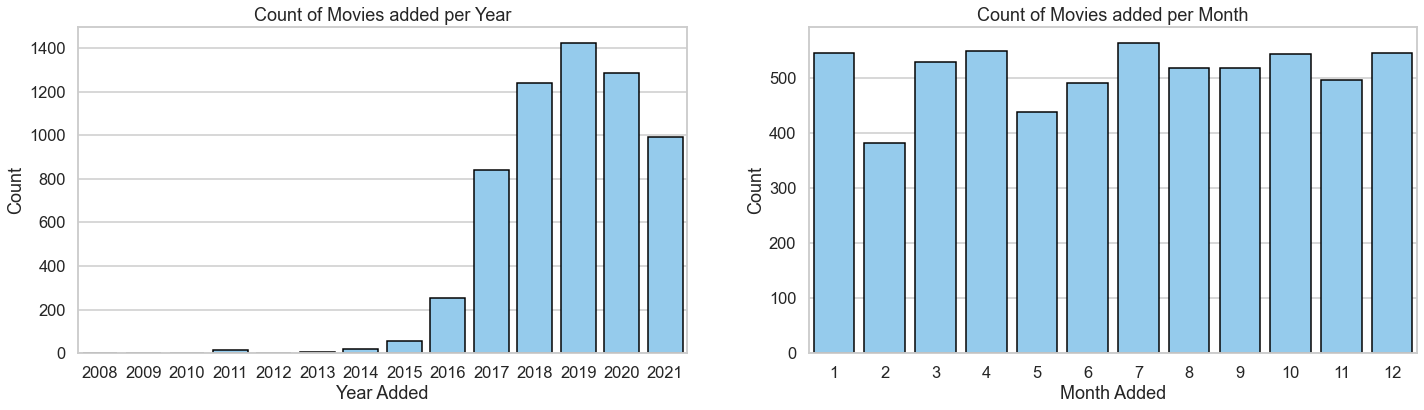

In [53]:
fig = plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
sns.countplot(x = df_mov['year_added'], 
              color='lightskyblue', edgecolor='black')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Count of Movies added per Year')
plt.subplot(1, 2, 2)
sns.countplot(x = df_mov['month_added'], 
              color='lightskyblue', edgecolor='black')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Count of Movies added per Month')
plt.savefig('./images/movies_count_byYearMonth.png', dpi='figure', bbox_inches='tight')
plt.show()

***When was the most number of Movies added on Netflix (across Year and Month)?***

In [54]:
df_mov_yearAdd_monAdd_pt = pd.pivot_table(df_mov, index='month_added', columns='year_added', 
                                          values='title', aggfunc='count')

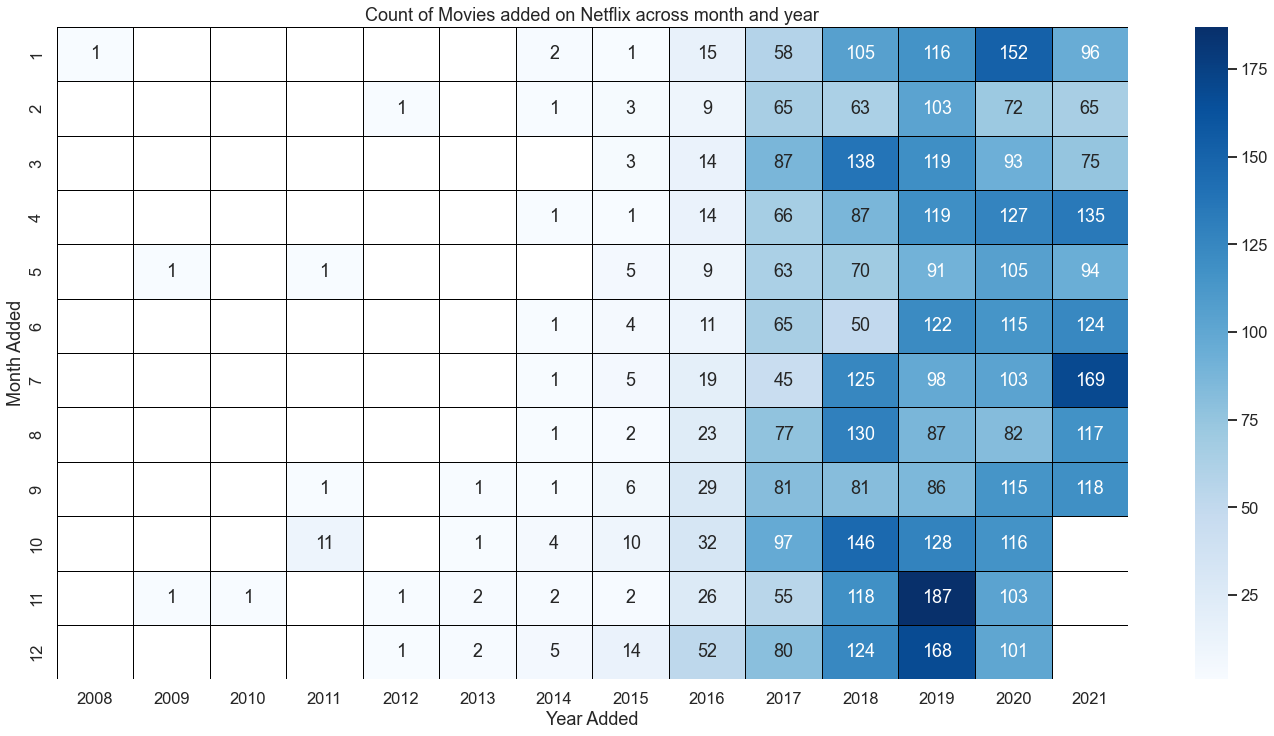

In [55]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(df_mov_yearAdd_monAdd_pt, 
            annot=True, fmt=".0f", cmap='Blues', 
            linewidth=1, linecolor='black')
plt.xlabel("Year Added")
plt.ylabel("Month Added")
plt.title("Count of Movies added on Netflix across month and year")
plt.savefig('./images/movies_count_byYearMonth_HeatMap.png', dpi='figure', bbox_inches='tight')
plt.show()

In [56]:
movAdd_acrossTime = df_mov.groupby(['year_added', 'month_added'])['title'].agg(['count']).reset_index()

In [57]:
movAdd_acrossTime['year_month'] = movAdd_acrossTime[['year_added', 'month_added']].apply(lambda x: str(x['year_added']) + str('-') + str(x['month_added']), axis=1)
movAdd_acrossTime_post2015 = movAdd_acrossTime.loc[movAdd_acrossTime['year_added'] > 2015]

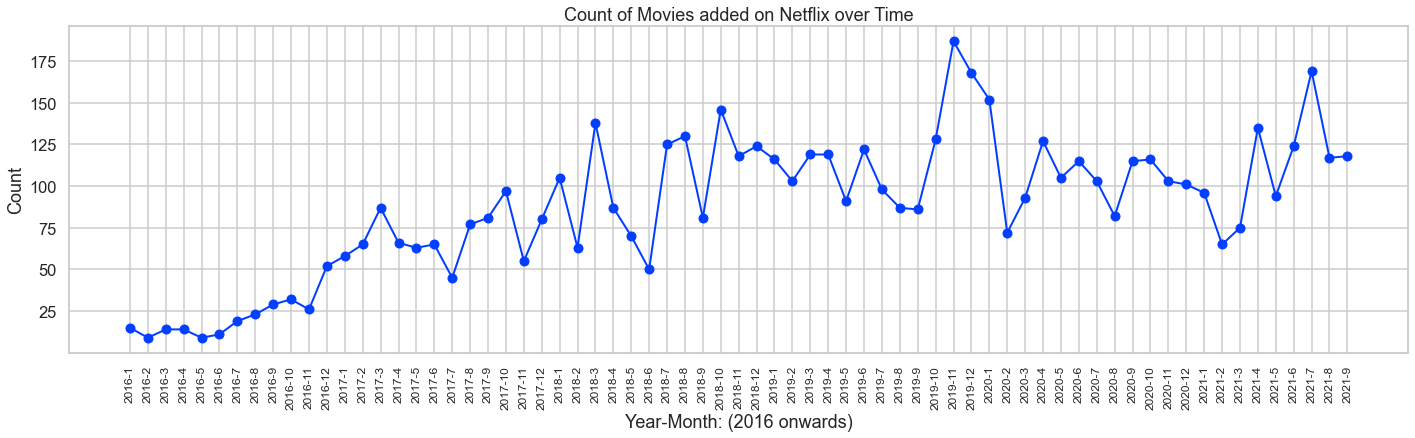

In [58]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.plot(movAdd_acrossTime_post2015['year_month'], 
         movAdd_acrossTime_post2015['count'], 
         marker='o', linewidth=2)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Year-Month: (2016 onwards)")
plt.ylabel("Count")
plt.title("Count of Movies added on Netflix over Time")
plt.show()

## **Movies: Visualization-Multivariate**

### **Movies in Top-5 Genres and Top-5 Ratings**

In [59]:
mov_top5_genres = series_mov_gen.value_counts().index[:5]
mov_top5_ratings = df_mov['rating'].value_counts().index[:5]

In [60]:
# Filtering out shows if in any of the Top-5 genres (Note that genres are non-mutually exclusive)
df_mov_t1 = pd.concat([df_mov, df_mov['genre_mod'].str.get_dummies(sep='+').loc[:, mov_top5_genres]], axis=1)
movies_top5_genres = df_mov_t1.loc[df_mov_t1[mov_top5_genres].apply(np.any, axis=1)]
# Now we filter only those shows which fall in the Top-5 ratings
movies_top5_genres_top5_ratings = movies_top5_genres.loc[movies_top5_genres['rating'].isin(mov_top5_ratings), 
                                                       ['title', 'country_mod', 'rating', 'duration_mins', 'release_year', 'year_added', 'International Movies', 'Dramas', 'Comedies', 
                                                        'Documentaries', "Action & Adventure"]]

#### ***Count of Movies***

In [61]:
movCount_top5_genres_top5_ratings = movies_top5_genres_top5_ratings.groupby('rating')[mov_top5_genres].agg(['sum'])
movCount_top5_genres_top5_ratings.columns = [tup[0] for tup in movCount_top5_genres_top5_ratings.columns]
movCount_top5_genres_top5_ratings

International Movies  Dramas  Comedies  Documentaries  \
rating                                                          
PG-13                     54     192       168             33   
R                        101     375       180             27   
TV-14                   1065     693       465            227   
TV-MA                   1130     831       431            321   
TV-PG                    294     200       153            167   

        Action & Adventure  
rating                      
PG-13                  148  
R                      220  
TV-14                  213  
TV-MA                  201  
TV-PG                   33

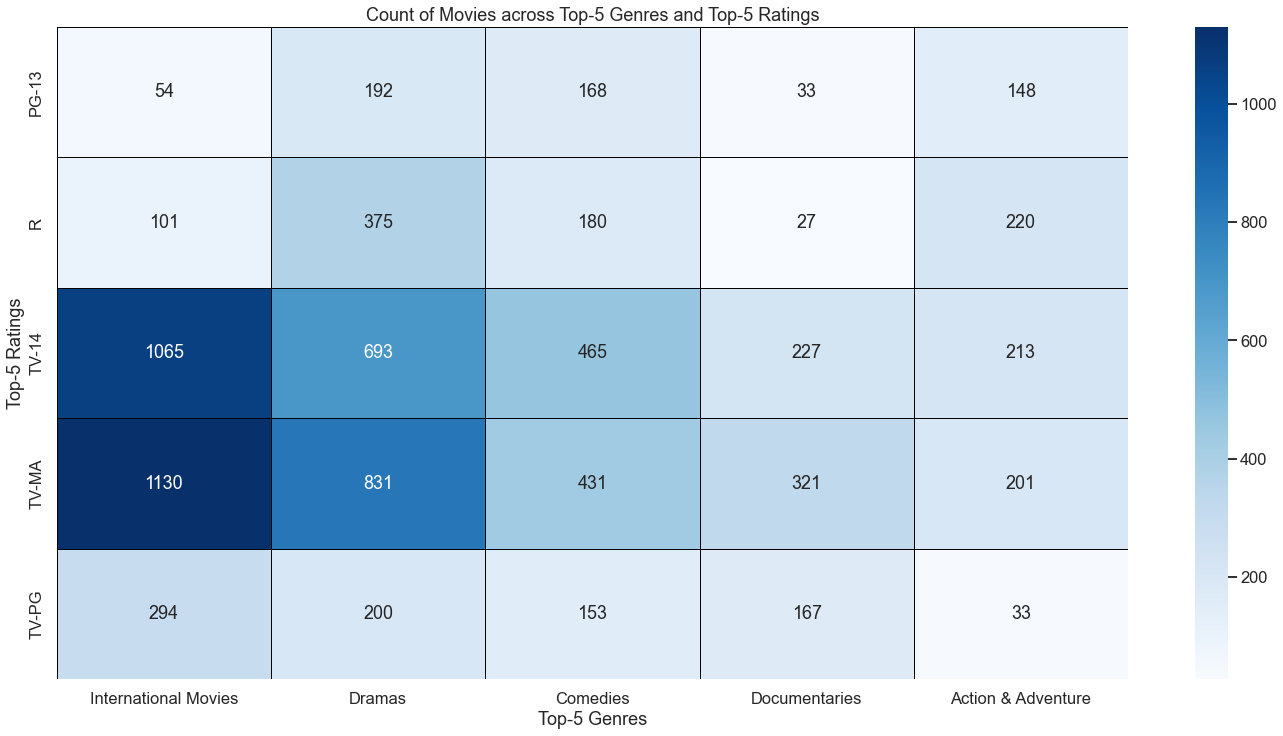

In [62]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(movCount_top5_genres_top5_ratings, 
            annot=True, fmt=".0f", cmap='Blues',
            linewidth=1, linecolor='black')
plt.xlabel("Top-5 Genres")
plt.ylabel("Top-5 Ratings")
plt.title("Count of Movies across Top-5 Genres and Top-5 Ratings")
plt.savefig('./images/movies_count_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

In [63]:
# Melting all the genres under a single column
mov_top5_genres_top5_ratings_melt = pd.melt(movies_top5_genres_top5_ratings, 
                                            id_vars=['title', 'country_mod', 'rating', 'duration_mins', 'release_year', 'year_added'], 
                                            var_name='genre', value_name='genre_value')
# Filtering out only those rows where show is of a valid genre
mov_top5_genres_top5_ratings_melt = mov_top5_genres_top5_ratings_melt.loc[mov_top5_genres_top5_ratings_melt['genre_value'] == 1]

#### ***Mean of movie duration***

In [64]:
movieDurationMean_top5_genres_top5_ratings = pd.pivot_table(mov_top5_genres_top5_ratings_melt, 
                                                            index='rating', columns='genre', 
                                                            values='duration_mins', aggfunc='mean')
movieDurationMean_top5_genres_top5_ratings

genre   Action & Adventure    Comedies  Documentaries      Dramas  \
rating                                                              
PG-13           113.074324  102.446429      94.030303  113.447917   
R               106.886364  100.688889      99.074074  113.690667   
TV-14           125.859155  116.767742      80.462555  121.790765   
TV-MA           108.542289  100.417633      87.635514  107.134777   
TV-PG           119.636364  108.980392      68.928144  111.075000   

genre   International Movies  
rating                        
PG-13             110.796296  
R                 109.663366  
TV-14             117.298592  
TV-MA             106.061062  
TV-PG             107.302721

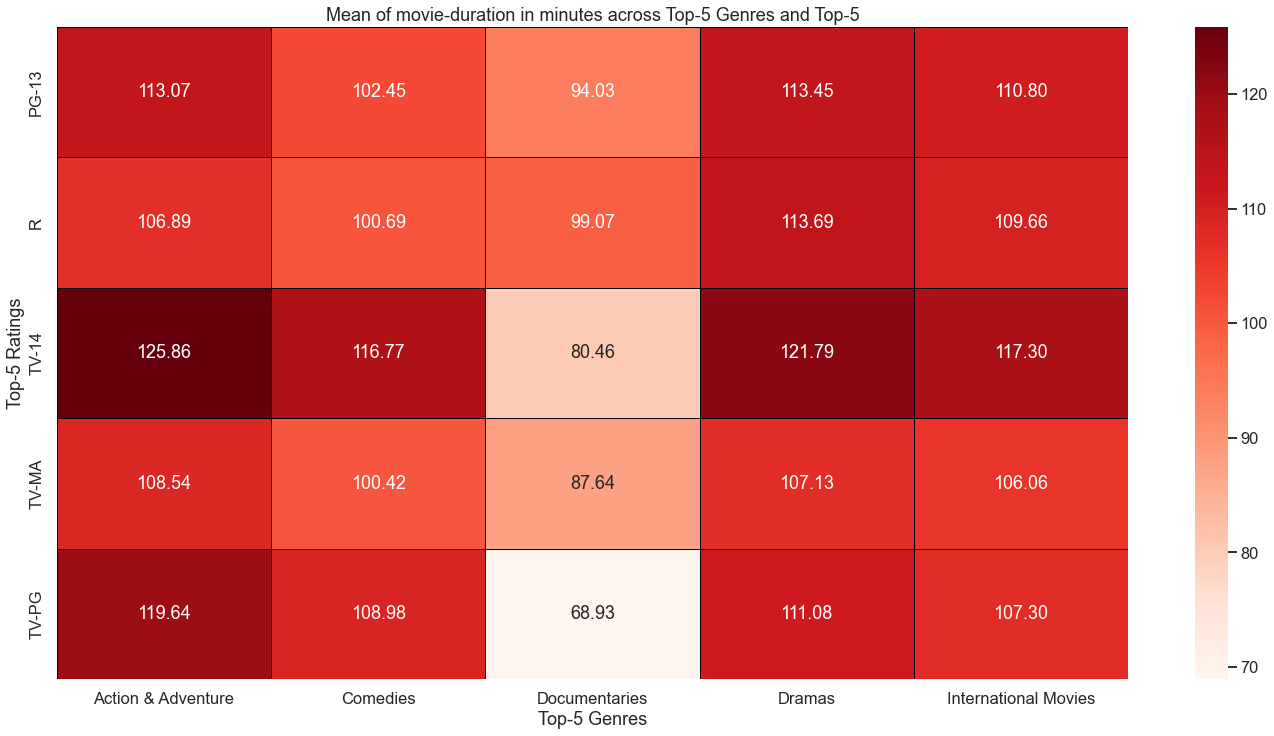

In [65]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(movieDurationMean_top5_genres_top5_ratings, 
            annot=True, fmt=".2f", cmap='Reds', 
            linewidth=1, linecolor='black')
plt.xlabel("Top-5 Genres")
plt.ylabel("Top-5 Ratings")
plt.title("Mean of movie-duration in minutes across Top-5 Genres and Top-5")
plt.savefig('./images/movies_meanDuration_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Temporal Trend***

In [66]:
movPost2015_top5_genres_top5_ratings = mov_top5_genres_top5_ratings_melt.loc[(mov_top5_genres_top5_ratings_melt['year_added'] >= 2016) & 
                                                                             (mov_top5_genres_top5_ratings_melt['year_added'] < 2021)]

In [67]:
movPost2015_top5_genre_yoy = movPost2015_top5_genres_top5_ratings.groupby(['genre', 'year_added'])['title'].agg(['count']).reset_index()
movPost2015_top5_genre_yoy_pivot = pd.pivot(movPost2015_top5_genre_yoy, index=['year_added'], columns='genre', values='count')
movPost2015_top5_genre_yoy_pivot

genre       Action & Adventure  Comedies  Documentaries  Dramas  \
year_added                                                        
2016                        15        34             55      57   
2017                        93       154            189     273   
2018                       167       275            145     506   
2019                       189       348            168     543   
2020                       162       335            107     498   

genre       International Movies  
year_added                        
2016                          71  
2017                         374  
2018                         643  
2019                         601  
2020                         552

In [68]:
movPost2015_top5_rating_yoy = movPost2015_top5_genres_top5_ratings.groupby(['rating', 'year_added'])['title'].agg(['count']).reset_index()
movPost2015_top5_rating_yoy_pivot = pd.pivot(movPost2015_top5_rating_yoy, index=['year_added'], columns='rating', values='count')
movPost2015_top5_rating_yoy_pivot

rating      PG-13    R  TV-14  TV-MA  TV-PG
year_added                                 
2016            9   16     52    128     27
2017           31   78    326    482    166
2018           65  157    704    600    210
2019          169  245    602    655    178
2020          137  193    583    587    154

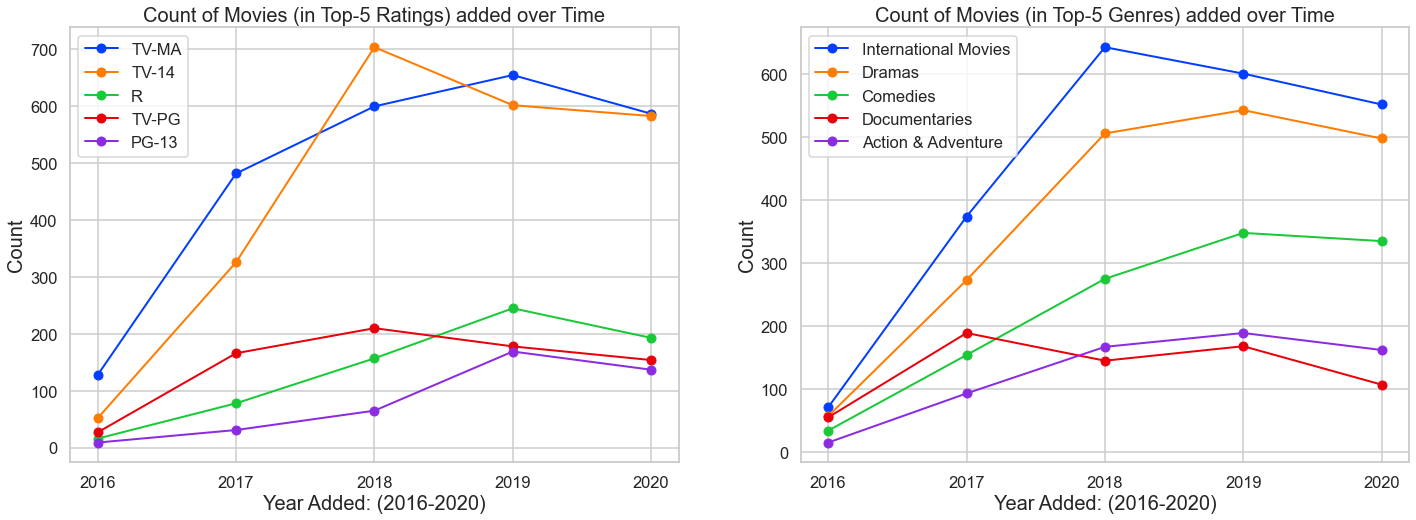

In [69]:
fig = plt.figure(figsize=(24,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
plt.plot(movPost2015_top5_rating_yoy_pivot.index, movPost2015_top5_rating_yoy_pivot['TV-MA'], label='TV-MA', linewidth=2, marker='o')
plt.plot(movPost2015_top5_rating_yoy_pivot.index, movPost2015_top5_rating_yoy_pivot['TV-14'], label='TV-14', linewidth=2, marker='o')
plt.plot(movPost2015_top5_rating_yoy_pivot.index, movPost2015_top5_rating_yoy_pivot['R'], label='R', linewidth=2, marker='o')
plt.plot(movPost2015_top5_rating_yoy_pivot.index, movPost2015_top5_rating_yoy_pivot['TV-PG'], label='TV-PG', linewidth=2, marker='o')
plt.plot(movPost2015_top5_rating_yoy_pivot.index, movPost2015_top5_rating_yoy_pivot["PG-13"], label="PG-13", linewidth=2, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.title('Count of Movies (in Top-5 Ratings) added over Time', fontsize=20)
plt.subplot(1, 2, 2)
plt.plot(movPost2015_top5_genre_yoy_pivot.index, movPost2015_top5_genre_yoy_pivot['International Movies'], label='International Movies', linewidth=2, marker='o')
plt.plot(movPost2015_top5_genre_yoy_pivot.index, movPost2015_top5_genre_yoy_pivot['Dramas'], label='Dramas', linewidth=2, marker='o')
plt.plot(movPost2015_top5_genre_yoy_pivot.index, movPost2015_top5_genre_yoy_pivot['Comedies'], label='Comedies', linewidth=2, marker='o')
plt.plot(movPost2015_top5_genre_yoy_pivot.index, movPost2015_top5_genre_yoy_pivot['Documentaries'], label='Documentaries', linewidth=2, marker='o')
plt.plot(movPost2015_top5_genre_yoy_pivot.index, movPost2015_top5_genre_yoy_pivot["Action & Adventure"], label="Action & Adventure", linewidth=2, marker='o')
plt.title('Count of Movies (in Top-5 Genres) added over Time', fontsize=20)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.savefig('./images/movies_count_overTime_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

### **Seeing trends across Top-5 Movie creating country**

In [70]:
mov_top5_con = series_mov_con.value_counts().index[:5]

In [71]:
df_mov_t2 = pd.concat([df_mov, df_mov['country_mod'].str.get_dummies(sep='+').loc[:, mov_top5_con]], axis=1)
movies_top5_con = df_mov_t2.loc[df_mov_t2[mov_top5_con].apply(np.any, axis=1), ['title', 'genre_mod', 'rating', 'duration_mins', 'release_year', 'year_added', 
                                                                             'United States', 'India', 'United Kingdom', "Canada", 'France']]

#### ***Popular Ratings***

In [72]:
moviesCount_byRating_top5_con = movies_top5_con.groupby(['rating'])[mov_top5_con].agg(['sum'])
moviesCount_byRating_top5_con.columns = [tup[0] for tup in moviesCount_byRating_top5_con.columns]
moviesCount_byRating_top5_con

United States  India  United Kingdom  Canada  France
rating                                                        
G                    39      0               4       2       2
NC-17                 1      0               0       1       1
NR                   41      7              10       5       4
PG                  243      7              35      33      21
PG-13               433     11              84      32      35
R                   660      5             145      79      57
TV-14               276    547              58      29      45
TV-G                 47      7              10       8       3
TV-MA               722    232             138      72     120
TV-PG               180    133              41      25       9
TV-Y                 52      0               5      25       1
TV-Y7                55     12               3       8       3
TV-Y7-FV              2      1               0       0       0
UR                    1      0               1       0       2

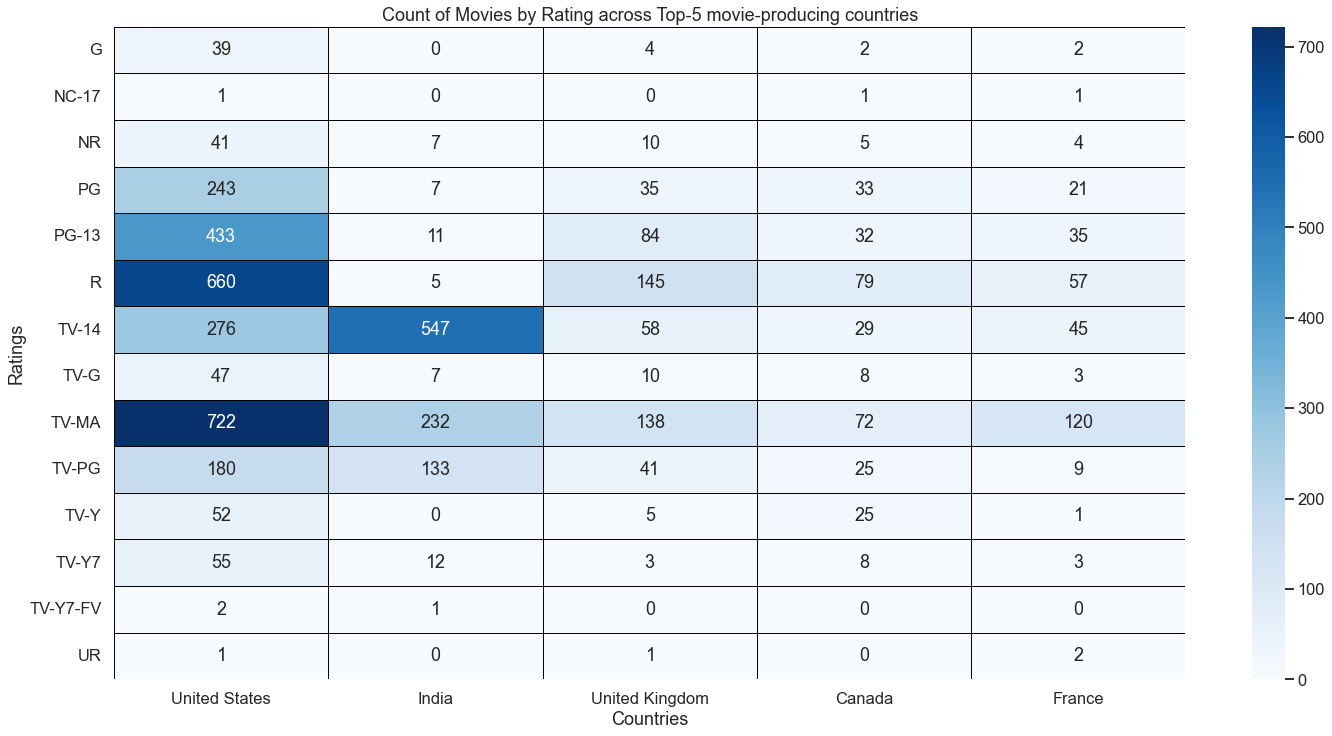

In [73]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(moviesCount_byRating_top5_con, 
            annot=True, fmt=".0f", cmap='Blues', 
            linewidth=1, linecolor='black')
plt.xlabel("Countries")
plt.ylabel("Ratings")
plt.title("Count of Movies by Rating across Top-5 movie-producing countries")
plt.savefig('./images/movies_count_byRating_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Popular Genres***

In [74]:
# Splitting open thye genres_mod column
df_mov_t3 = pd.concat([movies_top5_con[['title', 'United States', 'India', 'United Kingdom', "Canada", 'France']], movies_top5_con['genre_mod'].str.get_dummies(sep='+')], axis=1)
# Melting all the genres under a single column
movies_top5_con_genresMelt = pd.melt(df_mov_t3, id_vars=['title', 'United States', 'India', 'United Kingdom', "Canada", 'France'], var_name='genres', value_name='genre_value')
# Filtering out only those rows where show is of a valid genre
movies_top5_con_genresMelt = movies_top5_con_genresMelt.loc[movies_top5_con_genresMelt['genre_value'] == 1]

In [75]:
moviesCount_byGenre_top5_con = movies_top5_con_genresMelt.groupby(['genres'])[mov_top5_con].agg(['sum'])
moviesCount_byGenre_top5_con.columns = [tup[0] for tup in moviesCount_byGenre_top5_con.columns]
moviesCount_byGenre_top5_con

United States  India  United Kingdom  Canada  France
genres                                                                        
Action & Adventure                  404    137              84      44      37
Anime Features                        7      0               0       0       0
Children & Family Movies            390     26              46      80      23
Classic Movies                       81     11              16       0       6
Comedies                            680    323              91      94      51
Cult Movies                          52      5               7       6       2
Documentaries                       512     27             128      42      44
Dramas                              835    662             197      82     167
Faith & Spirituality                 42      4               5       3       3
Horror Movies                       201     35              28      36      10
Independent Movies                  390    167              74      44      73
International Movies                166    864             170      60     207
LGBTQ Movies                         63      2               7       6       1
Movies                               22      0               4       5       1
Music & Musicals                    147     96              36      14       8
Romantic Movies                     225    120              38      25      22
Sci-Fi & Fantasy                    181     12              35      28      10
Sports Movies                       113     17              21      13      12
Stand-Up Comedy                     216      6              21       2       5
Thrillers                           292     92              61      49      44

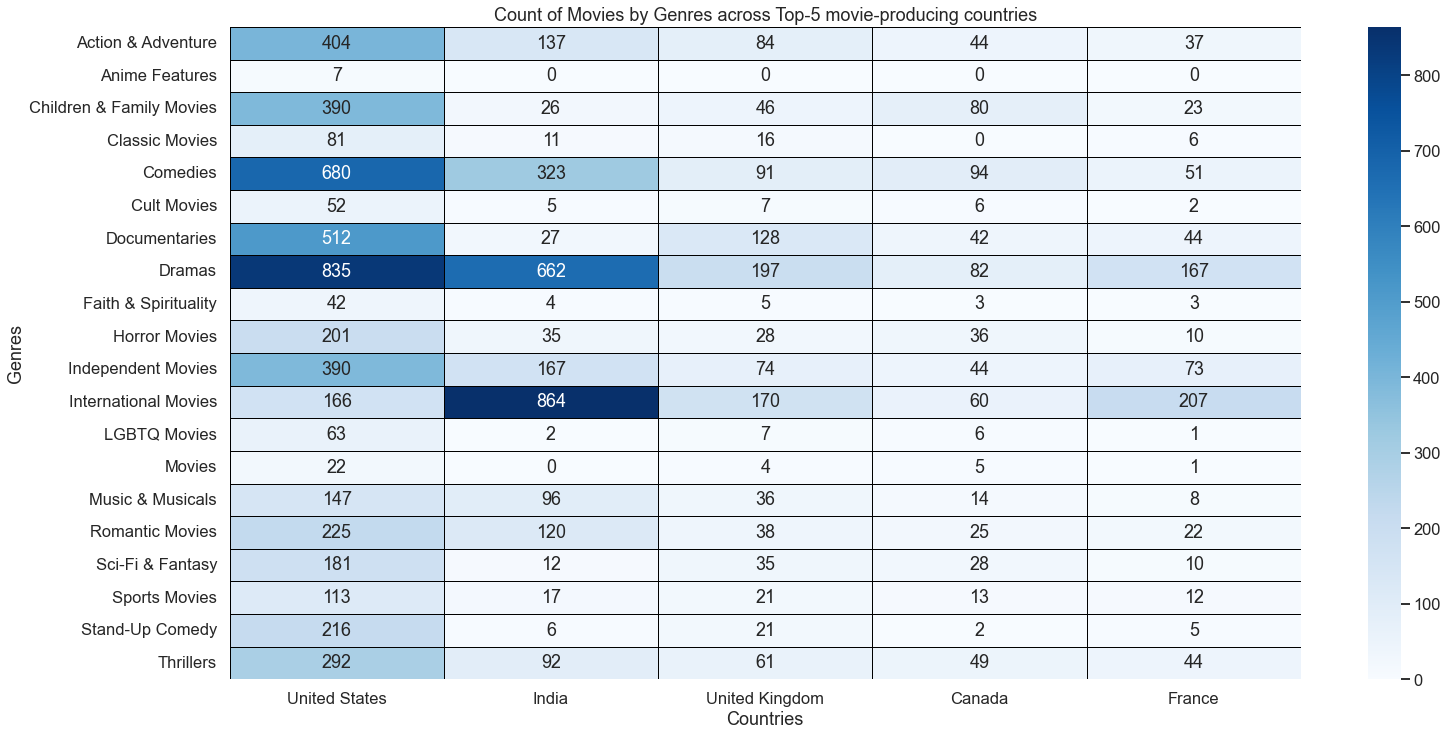

In [76]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(moviesCount_byGenre_top5_con, 
            annot=True, fmt=".0f", cmap='Blues', 
            linewidth=1, linecolor='black')
plt.xlabel("Countries")
plt.ylabel("Genres")
plt.title("Count of Movies by Genres across Top-5 movie-producing countries")
plt.savefig('./images/movies_count_byGenre_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

In [77]:
# Melting all the countries under a single column
movies_top5_con_conMelt = pd.melt(movies_top5_con, id_vars=['title', 'genre_mod', 'rating', 'duration_mins', 'release_year', 'year_added'], var_name='country', value_name='country_value')
# Filtering out only those rows where show is of a valid country
movies_top5_con_conMelt = movies_top5_con_conMelt.loc[movies_top5_con_conMelt['country_value'] == 1]

#### ***Movie-duration***

In [78]:
movies_top5_con_conMelt.groupby('country')['duration_mins'].agg(['mean']).sort_values('mean')[::-1]

mean
country                   
India           125.912682
France          100.973597
United Kingdom   98.760300
United States    93.732922
Canada           91.150470

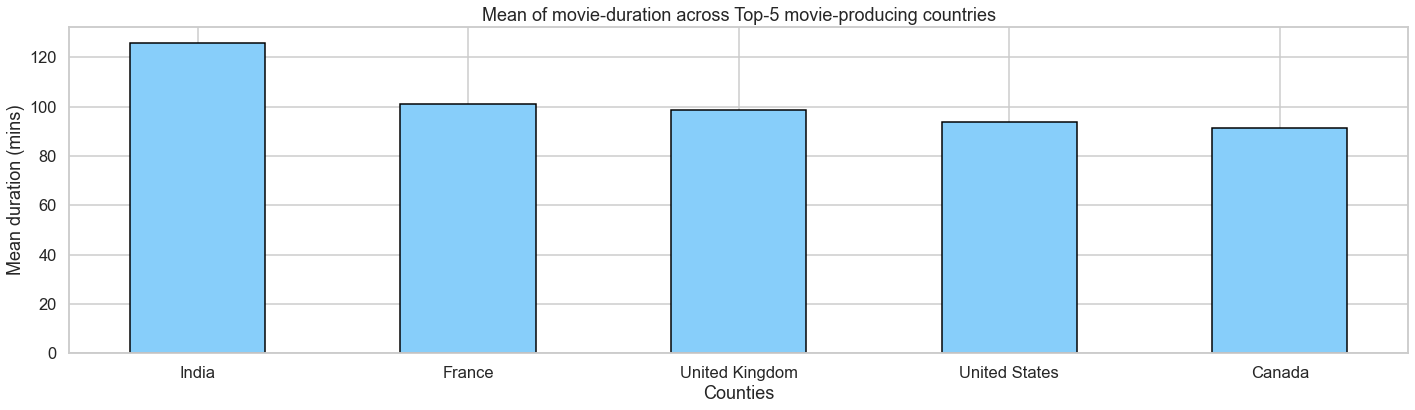

In [79]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(movies_top5_con_conMelt.groupby('country')['duration_mins'].agg(['mean']).sort_values('mean')[::-1].index, 
        movies_top5_con_conMelt.groupby('country')['duration_mins'].agg(['mean']).sort_values('mean')['mean'][::-1], 
        width=0.5, color='lightskyblue', edgecolor='black')
plt.xlabel("Counties")
plt.ylabel("Mean duration (mins)")
plt.title("Mean of movie-duration across Top-5 movie-producing countries")
plt.savefig('./images/movies_meanDuration_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Temporal Trend***

In [80]:
moviesPost2015_top5_con = movies_top5_con_conMelt.loc[(movies_top5_con_conMelt['year_added'] >= 2016) & 
                                                      (movies_top5_con_conMelt['year_added'] < 2021)]

In [81]:
moviesPost2015_top5_con_yoy = moviesPost2015_top5_con.groupby(['country', 'year_added'])['title'].agg(['count']).reset_index()
moviesPost2015_top5_con_yoy_pivot = pd.pivot(moviesPost2015_top5_con_yoy, 
                                             index='year_added', 
                                             columns='country', values='count')
moviesPost2015_top5_con_yoy_pivot

country     Canada  France  India  United Kingdom  United States
year_added                                                      
2016            16      16     13              32            139
2017            54      47    148              81            364
2018            62      48    332             103            455
2019            62      61    200             131            678
2020            79      74    181              97            582

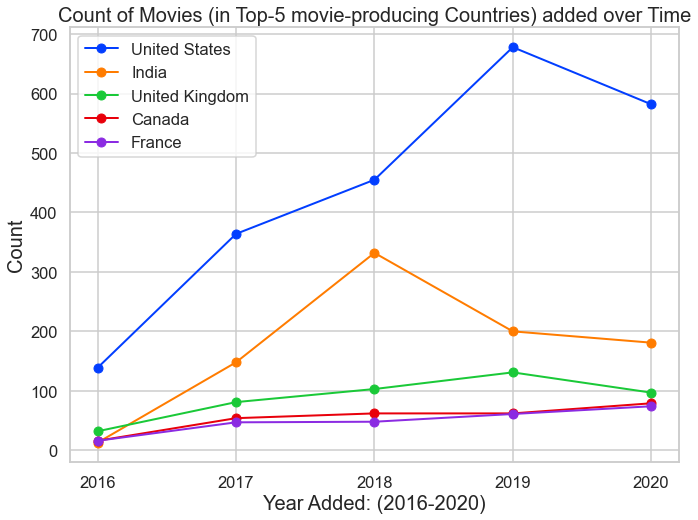

In [82]:
plt.figure(figsize=(24,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
plt.plot(moviesPost2015_top5_con_yoy_pivot.index, moviesPost2015_top5_con_yoy_pivot['United States'], label='United States', linewidth=2, marker='o')
plt.plot(moviesPost2015_top5_con_yoy_pivot.index, moviesPost2015_top5_con_yoy_pivot['India'], label='India', linewidth=2, marker='o')
plt.plot(moviesPost2015_top5_con_yoy_pivot.index, moviesPost2015_top5_con_yoy_pivot['United Kingdom'], label='United Kingdom', linewidth=2, marker='o')
plt.plot(moviesPost2015_top5_con_yoy_pivot.index, moviesPost2015_top5_con_yoy_pivot['Canada'], label='Canada', linewidth=2, marker='o')
plt.plot(moviesPost2015_top5_con_yoy_pivot.index, moviesPost2015_top5_con_yoy_pivot["France"], label="France", linewidth=2, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.title('Count of Movies (in Top-5 movie-producing Countries) added over Time', fontsize=20)
plt.savefig('./images/movies_count_overTime_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

# **EDA: Netflix_TV-Shows**

In [83]:
df_show = df_main.loc[df_main['type'] == 'TV Show'].copy()

In [84]:
df_show.shape

(2676, 11)

In [85]:
df_show.head()

type                  title         director  \
show_id                                                    
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
s6       TV Show          Midnight Mass    Mike Flanagan   

                                                      cast       country  \
show_id                                                                    
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           NaN   
s4                                                     NaN           NaN   
s5       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India   
s6       Kate Siegel, Zach Gilford, Hamish Linklater, H...           NaN   

                 date_added  release_year rating   duration  \
show_id                                                       
s2       September 24, 2021          2021  TV-MA  2 Seasons   
s3       September 24, 2021          2021  TV-MA   1 Season   
s4       September 24, 2021          2021  TV-MA   1 Season   
s5       September 24, 2021          2021  TV-MA  2 Seasons   
s6       September 24, 2021          2021  TV-MA   1 Season   

                                                 listed_in  \
show_id                                                      
s2         International TV Shows, TV Dramas, TV Mysteries   
s3       Crime TV Shows, International TV Shows, TV Act...   
s4                                  Docuseries, Reality TV   
s5       International TV Shows, Romantic TV Shows, TV ...   
s6                      TV Dramas, TV Horror, TV Mysteries   

                                               description  
show_id                                                     
s2       After crossing paths at a party, a Cape Town t...  
s3       To protect his family from a powerful drug lor...  
s4       Feuds, flirtations and toilet talk go down amo...  
s5       In a city of coaching centers known to train I...  
s6       The arrival of a charismatic young priest brin...

***Basic details of the data***

In [86]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2676 entries, s2 to s8804
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          2676 non-null   object
 1   title         2676 non-null   object
 2   director      230 non-null    object
 3   cast          2326 non-null   object
 4   country       2285 non-null   object
 5   date_added    2666 non-null   object
 6   release_year  2676 non-null   int64 
 7   rating        2674 non-null   object
 8   duration      2676 non-null   object
 9   listed_in     2676 non-null   object
 10  description   2676 non-null   object
dtypes: int64(1), object(10)
memory usage: 250.9+ KB


***Features with missing values:***

In [87]:
df_show.isna().sum()

type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

*% of missing values*

In [88]:
100*(df_show.isna().sum().loc[df_show.isna().sum() > 0]/df_show.shape[0])

director      91.405082
cast          13.079223
country       14.611360
date_added     0.373692
rating         0.074738
dtype: float64

## **Shows: Data pre-processing**

### **Feature: date_added**

In [89]:
# df_show.loc[df_show['date_added'].isna()]
df_show['date_added'].isna().sum()

10

***We have only 10 missing values: we will fill them with the mode***

In [90]:
# In which year max shows were added?
df_show.loc[df_show['date_added'].isna() == False]['date_added'].str.split().str[-1].value_counts()

2020    595
2019    592
2021    505
2018    412
2017    349
2016    176
2015     26
2014      5
2013      5
2008      1
Name: date_added, dtype: int64

In [91]:
# In which month max shows were added?
df_show.loc[df_show['date_added'].isna() == False]['date_added'].str.split().str[0].value_counts()

December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
Name: date_added, dtype: int64

In [92]:
# Missing values are replaced with max-year and max-month
df_show['date_added'].fillna('December 01, 2020', inplace=True)
df_show['date_added'].isna().sum()

0

In [93]:
# Rows where date_added is an empty strings (our missing values) are filled with a dummy date from future
# This is done so that we can easily filter them out
def date_clean(date_str):
    year = date_str.split()[-1]
    month = date_str.split()[0][:3]
    return ('-').join((year,month))

df_show['year_added'] = pd.to_datetime(df_show['date_added'].apply(date_clean)).dt.year
df_show['month_added'] = pd.to_datetime(df_show['date_added'].apply(date_clean)).dt.month

### **Feature: rating**

In [94]:
# df_show.loc[df_show['rating'].isna()]
df_show['rating'].isna().sum()

2

***We have only 2 missing values: we will fill them with the mode***

In [95]:
# Which rating is the most popular?
df_show.loc[df_show['rating'].isna() == False]['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

In [96]:
df_show['rating'].fillna('TV-MA', inplace=True)
df_show['rating'].isna().sum()

0

In [97]:
df_show['rating'].unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR',
       'TV-Y7-FV'], dtype=object)

### **Feature: country**

In [98]:
# df_show.loc[df_show['country'].isna()]
df_show['country'].isna().sum()

391

***Calculating count of individual countries and finding the Top-10 countries***

In [99]:
# df_show.loc[df_show['country'].isna() == False, 'country'].str.strip(',').str.split(',')
show_con = [con.strip() for lst in df_show.loc[df_show['country'].isna() == False, 'country'].str.strip(',').str.split(',') for con in lst]
series_show_con = pd.Series(show_con)
series_show_con.value_counts()

United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Senegal                   1
Uruguay                   1
United Arab Emirates      1
Switzerland               1
Length: 65, dtype: int64

In [100]:
# Storing the top-10 countries in a variable
# show_con_top10 = series_show_con.value_counts().index[:10]

***We have 391 missing values: we will fill missing values with 'Unknown'***

In [101]:
df_show['country'].fillna('Unknown', inplace=True)
df_show['country'].isna().sum()

0

***Reformatting the country column so that we can perform eda on it later***

In [102]:
def country_clean(con_str):
    con_lst = [con.strip() for con in con_str.strip(',').split(',')]
    return ('+').join(con_lst)
    
df_show['country_mod'] = df_show['country'].apply(country_clean)

In [103]:
# Use .str.get_dummies function to get ONE-HOT encoding
# Get the Top-10 contries by content as follows
# df_show['country_mod'].str.get_dummies(sep='+').loc[:, show_con_top10]

### **Feature: cast**

In [104]:
# df_show.loc[df_show['cast'].isna()]
df_show['cast'].isna().sum()

350

***Calculating count of individual actors***

In [105]:
show_cast = [cast.strip() for lst in df_show.loc[df_show['cast'].isna() == False, 'cast'].str.strip(',').str.split(',') for cast in lst]
series_show_cast = pd.Series(show_cast)
series_show_cast.value_counts()

Takahiro Sakurai         25
Yuki Kaji                19
Daisuke Ono              17
Junichi Suwabe           17
Ai Kayano                17
                         ..
Bhumibhat Thavornsiri     1
Thanongsak Suphakan       1
Kanjanaporn Plodpai       1
Boonsong Nakphoo          1
Hina Khawaja Bayat        1
Length: 14863, dtype: int64

***We have 350 missing values: we will fill missing values with 'Unknown'***

In [106]:
df_show['cast'].fillna('Unknown', inplace=True)
df_show['cast'].isna().sum()

0

### **Feature: duration**

In [107]:
df_show['seasons'] = df_show['duration'].apply(lambda x: int(x.split()[0]))
df_show['seasons'].unique()

array([ 2,  1,  9,  4,  5,  3,  6,  7, 10,  8, 17, 13, 15, 12, 11],
      dtype=int64)

### **Feature: listed_in**

***Calculating count of individual genres***

In [108]:
show_genre = [gen.strip() for lst in df_show['listed_in'].str.strip(',').str.split(',') for gen in lst]
series_show_genre = pd.Series(show_genre)
series_show_genre.value_counts()

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
dtype: int64

In [109]:
# Storing the top-15 genres in a variable
# show_genre_top15 = series_show_genre.value_counts().index[:15]

***Reformatting the listed_in column so that we can perform eda on it later***

In [110]:
def genre_clean(gen_str):
    gen_lst = [gen.strip() for gen in gen_str.strip(',').split(',')]
    return ('+').join(gen_lst)

df_show['genre_mod'] = df_show['listed_in'].apply(genre_clean)

In [111]:
# Use .str.get_dummies function to get ONE-HOT encoding
# Get the Top-5 genres as follows
# df_show['genre_mod'].str.get_dummies(sep='+').loc[:, show_genre_top15[:5]]

## **Shows: Preparing final data after pre-processing**

In [112]:
# Before dropping columns
df_show.head(2)

type          title         director  \
show_id                                            
s2       TV Show  Blood & Water              NaN   
s3       TV Show      Ganglands  Julien Leclercq   

                                                      cast       country  \
show_id                                                                    
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown   

                 date_added  release_year rating   duration  \
show_id                                                       
s2       September 24, 2021          2021  TV-MA  2 Seasons   
s3       September 24, 2021          2021  TV-MA   1 Season   

                                                 listed_in  \
show_id                                                      
s2         International TV Shows, TV Dramas, TV Mysteries   
s3       Crime TV Shows, International TV Shows, TV Act...   

                                               description  year_added  \
show_id                                                                  
s2       After crossing paths at a party, a Cape Town t...        2021   
s3       To protect his family from a powerful drug lor...        2021   

         month_added   country_mod  seasons  \
show_id                                       
s2                 9  South Africa        2   
s3                 9       Unknown        1   

                                                 genre_mod  
show_id                                                     
s2           International TV Shows+TV Dramas+TV Mysteries  
s3       Crime TV Shows+International TV Shows+TV Actio...

In [113]:
df_show.shape

(2676, 16)

In [114]:
# Dropping unnecessary columns (since we have re-formatted them)
df_show.drop(['country', 'date_added', 'duration', 'listed_in'], axis=1, inplace=True)

In [115]:
# Re-arranging the columns
df_show = df_show[['type', 'title', 'director', 'cast', 'description', 'country_mod', 'genre_mod', 'rating', 'seasons', 'release_year', 'year_added', 'month_added']]
df_show.shape

(2676, 12)

### **Final dataset**

In [116]:
df_show

type                  title         director  \
show_id                                                    
s2       TV Show          Blood & Water              NaN   
s3       TV Show              Ganglands  Julien Leclercq   
s4       TV Show  Jailbirds New Orleans              NaN   
s5       TV Show           Kota Factory              NaN   
s6       TV Show          Midnight Mass    Mike Flanagan   
...          ...                    ...              ...   
s8796    TV Show        Yu-Gi-Oh! Arc-V              NaN   
s8797    TV Show             Yunus Emre              NaN   
s8798    TV Show              Zak Storm              NaN   
s8801    TV Show     Zindagi Gulzar Hai              NaN   
s8804    TV Show            Zombie Dumb              NaN   

                                                      cast  \
show_id                                                      
s2       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
s3       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
s4                                                 Unknown   
s5       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
s6       Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                    ...   
s8796    Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
s8797    Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
s8798    Michael Johnston, Jessica Gee-George, Christin...   
s8801    Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
s8804                                              Unknown   

                                               description  \
show_id                                                      
s2       After crossing paths at a party, a Cape Town t...   
s3       To protect his family from a powerful drug lor...   
s4       Feuds, flirtations and toilet talk go down amo...   
s5       In a city of coaching centers known to train I...   
s6       The arrival of a charismatic young priest brin...   
...                                                    ...   
s8796    Now that he's discovered the Pendulum Summonin...   
s8797    During the Mongol invasions, Yunus Emre leaves...   
s8798    Teen surfer Zak Storm is mysteriously transpor...   
s8801    Strong-willed, middle-class Kashaf and carefre...   
s8804    While living alone in a spooky town, a young g...   

                                        country_mod  \
show_id                                               
s2                                     South Africa   
s3                                          Unknown   
s4                                          Unknown   
s5                                            India   
s6                                          Unknown   
...                                             ...   
s8796                                  Japan+Canada   
s8797                                        Turkey   
s8798    United States+France+South Korea+Indonesia   
s8801                                      Pakistan   
s8804                                       Unknown   

                                                 genre_mod rating  seasons  \
show_id                                                                      
s2           International TV Shows+TV Dramas+TV Mysteries  TV-MA        2   
s3       Crime TV Shows+International TV Shows+TV Actio...  TV-MA        1   
s4                                   Docuseries+Reality TV  TV-MA        1   
s5       International TV Shows+Romantic TV Shows+TV Co...  TV-MA        2   
s6                        TV Dramas+TV Horror+TV Mysteries  TV-MA        1   
...                                                    ...    ...      ...   
s8796                                Anime Series+Kids' TV  TV-Y7        2   
s8797                     International TV Shows+TV Dramas  TV-PG        2   
s8798                                             Kids' TV  TV-Y7        3   
s8801    International TV Shows+Romantic TV

## **Shows: Visualization-Univariate**

### **Qualitative variables**

#### **Feature: rating**

In [117]:
print('Total number of unique ratings:', df_show['rating'].value_counts().index.nunique())

Total number of unique ratings: 9


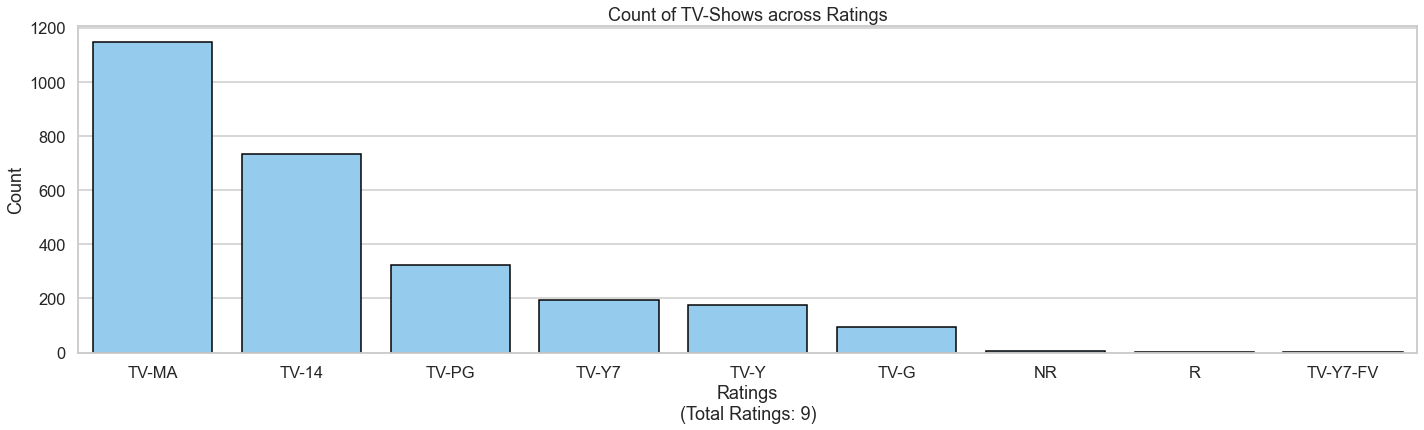

In [118]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.countplot(x = df_show['rating'], 
              order=df_show['rating'].value_counts().index, 
              color='lightskyblue', edgecolor='black')
plt.xlabel(f"Ratings\n(Total Ratings: {df_show['rating'].nunique()})")
plt.ylabel('Count')
plt.title('Count of TV-Shows across Ratings')
plt.savefig('./images/shows_count_byRating.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: genre**

In [119]:
df_show['genre_mod'].str.get_dummies(sep='+')

Anime Series  British TV Shows  Classic & Cult TV  Crime TV Shows  \
show_id                                                                      
s2                  0                 0                  0               0   
s3                  0                 0                  0               1   
s4                  0                 0                  0               0   
s5                  0                 0                  0               0   
s6                  0                 0                  0               0   
...               ...               ...                ...             ...   
s8796               1                 0                  0               0   
s8797               0                 0                  0               0   
s8798               0                 0                  0               0   
s8801               0                 0                  0               0   
s8804               0                 0                  0               0   

         Docuseries  International TV Shows  Kids' TV  Korean TV Shows  \
show_id                                                                  
s2                0                       1         0                0   
s3                0                       1         0                0   
s4                1                       0         0                0   
s5                0                       1         0                0   
s6                0                       0         0                0   
...             ...                     ...       ...              ...   
s8796             0                       0         1                0   
s8797             0                       1         0                0   
s8798             0                       0         1                0   
s8801             0                       1         0                0   
s8804             0                       0         1                1   

         Reality TV  Romantic TV Shows  ...  Stand-Up Comedy & Talk Shows  \
show_id                                 ...                                 
s2                0                  0  ...                             0   
s3                0                  0  ...                             0   
s4                1                  0  ...                             0   
s5                0                  1  ...                             0   
s6                0                  0  ...                             0   
...             ...                ...  ...                           ...   
s8796             0                  0  ...                             0   
s8797             0                  0  ...                             0   
s8798             0                  0  ...                             0   
s8801             0                  1  ...                             0   
s8804             0                  0  ...                             0   

         TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
show_id                                                             
s2                           0            0          1          0   
s3                           1            0          0          0   
s4                           0            0          0          0   
s5                           0            1          0          0   
s6                           0            0          1          1   
...                        ...          ...        ...        ...   
s8796                        0            0          0          0   
s8797                        0            0          1          0   
s8798                        0            0          0          0   
s8801                        0            0          1          0   
s8804                        0            1          0          0   

         TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  \
show_id                                                      

In [120]:
print('Total number of unique genres:', series_show_genre.value_counts().index.nunique())

Total number of unique genres: 22


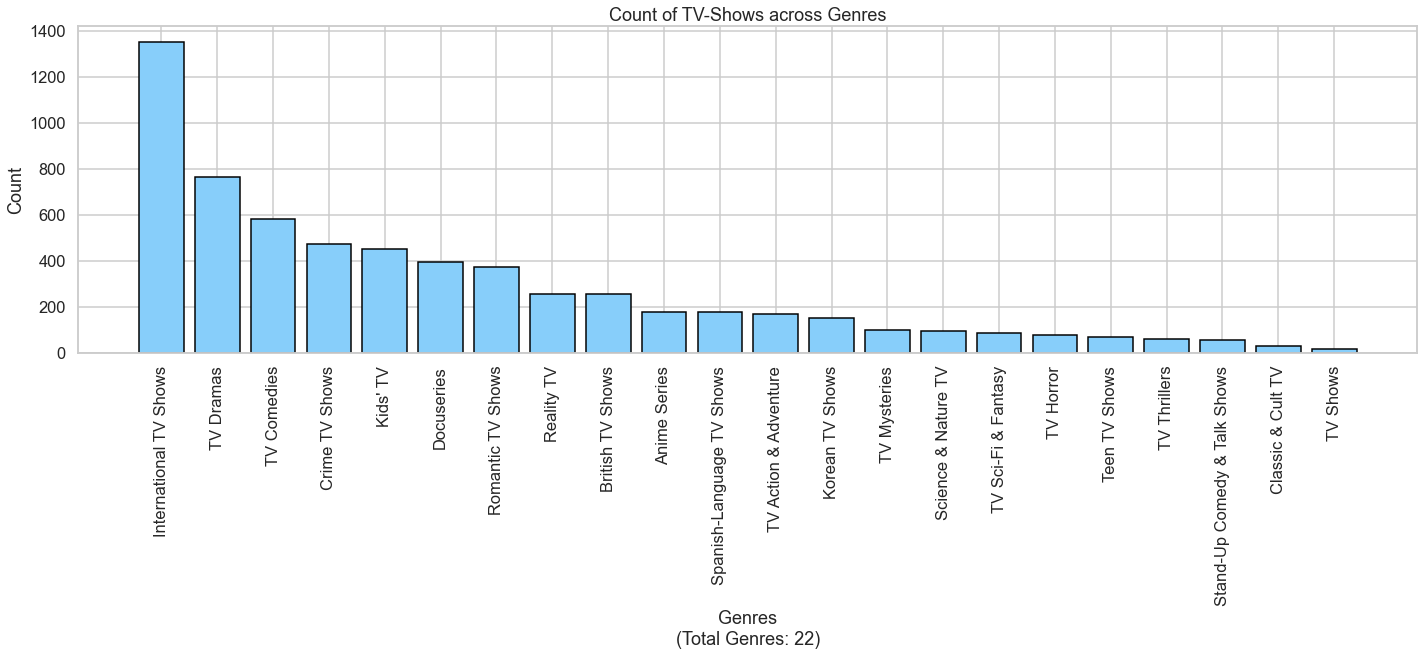

In [121]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_show_genre.value_counts().index, 
        series_show_genre.value_counts(), 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Genres\n(Total Genres: {series_show_genre.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of TV-Shows across Genres')
plt.savefig('./images/shows_count_byGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: country**

In [122]:
df_show['country_mod'].str.get_dummies(sep='+')

Argentina  Australia  Austria  Azerbaijan  Belarus  Belgium  Brazil  \
show_id                                                                        
s2               0          0        0           0        0        0       0   
s3               0          0        0           0        0        0       0   
s4               0          0        0           0        0        0       0   
s5               0          0        0           0        0        0       0   
s6               0          0        0           0        0        0       0   
...            ...        ...      ...         ...      ...      ...     ...   
s8796            0          0        0           0        0        0       0   
s8797            0          0        0           0        0        0       0   
s8798            0          0        0           0        0        0       0   
s8801            0          0        0           0        0        0       0   
s8804            0          0        0           0        0        0       0   

         Canada  Chile  China  ...  Taiwan  Thailand  Turkey  Ukraine  \
show_id                        ...                                      
s2            0      0      0  ...       0         0       0        0   
s3            0      0      0  ...       0         0       0        0   
s4            0      0      0  ...       0         0       0        0   
s5            0      0      0  ...       0         0       0        0   
s6            0      0      0  ...       0         0       0        0   
...         ...    ...    ...  ...     ...       ...     ...      ...   
s8796         1      0      0  ...       0         0       0        0   
s8797         0      0      0  ...       0         0       1        0   
s8798         0      0      0  ...       0         0       0        0   
s8801         0      0      0  ...       0         0       0        0   
s8804         0      0      0  ...       0         0       0        0   

         United Arab Emirates  United Kingdom  United States  Unknown  \
show_id                                                                 
s2                          0               0              0        0   
s3                          0               0              0        1   
s4                          0               0              0        1   
s5                          0               0              0        0   
s6                          0               0              0        1   
...                       ...             ...            ...      ...   
s8796                       0               0              0        0   
s8797                       0               0              0        0   
s8798                       0               0              1        0   
s8801                       0               0              0        0   
s8804                       0               0              0        1   

         Uruguay  West Germany  
show_id                         
s2             0             0  
s3             0             0  
s4             0             0  
s5             0             0  
s6             0             0  
...          ...           ...  
s8796          0             0  
s8797          0             0  
s8798          0             0  
s8801          0             0  
s8804          0             0  

[2676 rows x 66 columns]

In [123]:
print('Total number of unique content-producing countries:', series_show_con.value_counts().index.nunique())

Total number of unique content-producing countries: 65


Since there are a large number of countires:   
we will see only the Top-20 content-producing countries and count of shows per country

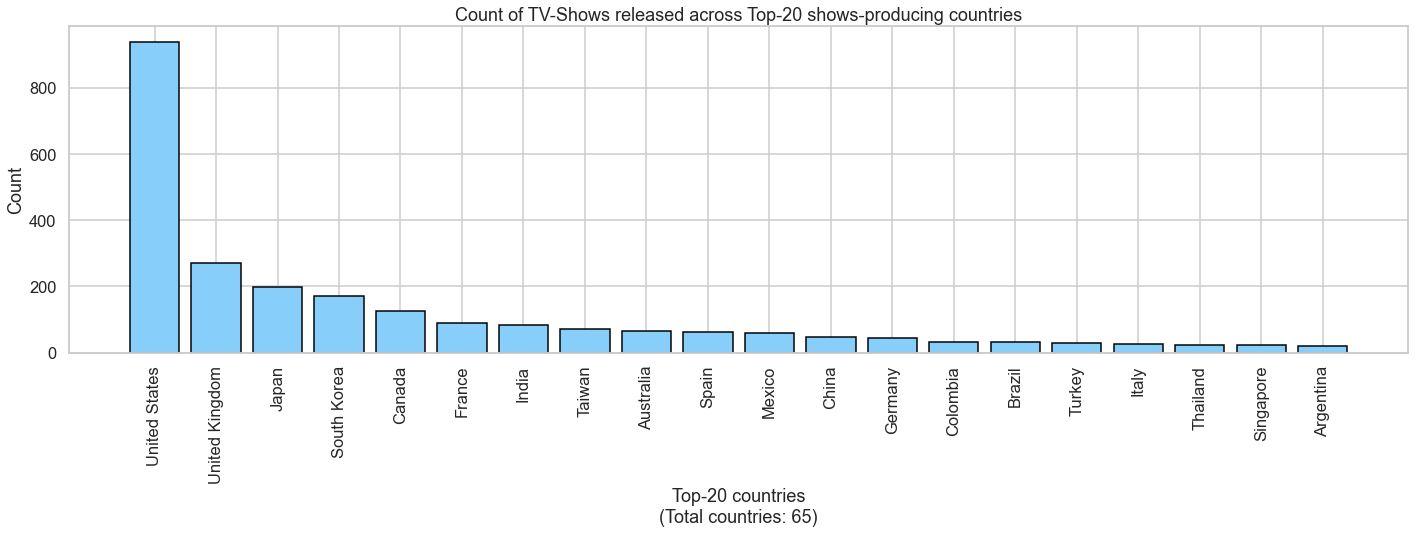

In [124]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_show_con.value_counts()[:20].index, 
        series_show_con.value_counts()[:20], 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Top-20 countries\n(Total countries: {series_show_con.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of TV-Shows released across Top-20 shows-producing countries')
plt.savefig('./images/shows_count_byCountry.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: cast**

In [125]:
print('Total number of unique TV-Show actors:', series_show_cast.value_counts().index.nunique())

Total number of unique TV-Show actors: 14863


Since there are a large number of TV-Show actors:   
we will see only the Top-30 actors and count of shows per actor

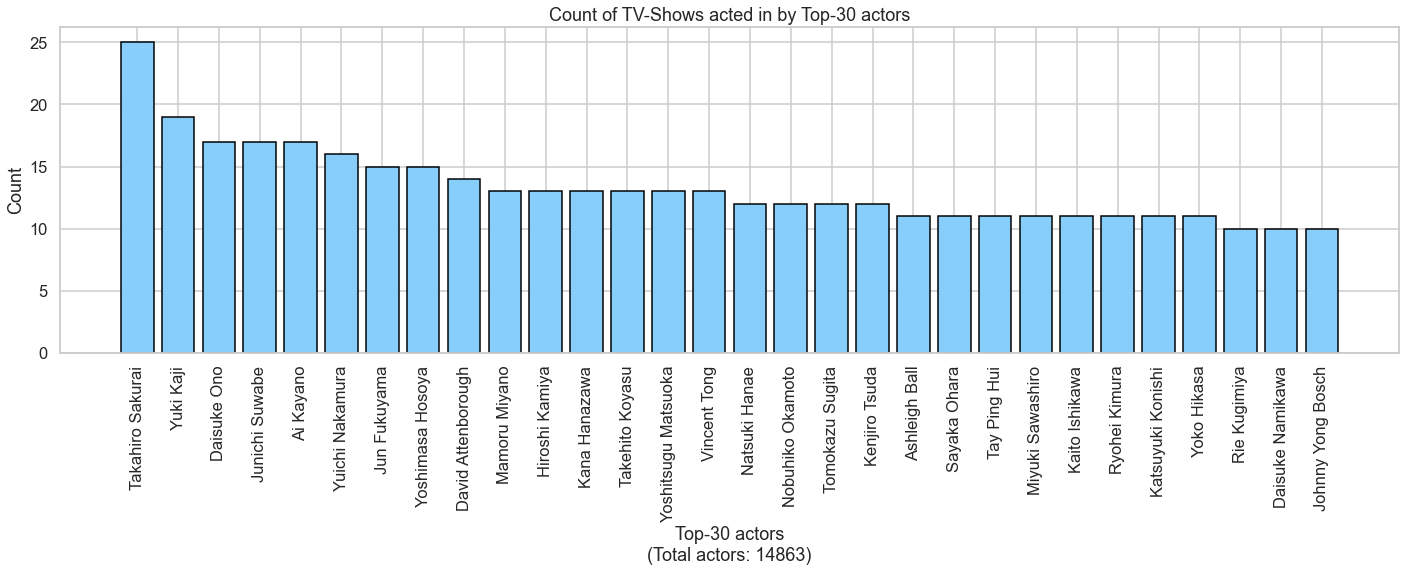

In [126]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(series_show_cast.value_counts()[:30].index, 
        series_show_cast.value_counts()[:30], 
        color='lightskyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel(f'Top-30 actors\n(Total actors: {series_show_cast.value_counts().index.nunique()})')
plt.ylabel('Count')
plt.title('Count of TV-Shows acted in by Top-30 actors')
plt.savefig('./images/shows_count_byActor.png', dpi='figure', bbox_inches='tight')
plt.show()

### **Quantitative variables**

#### **Feature: release_year**

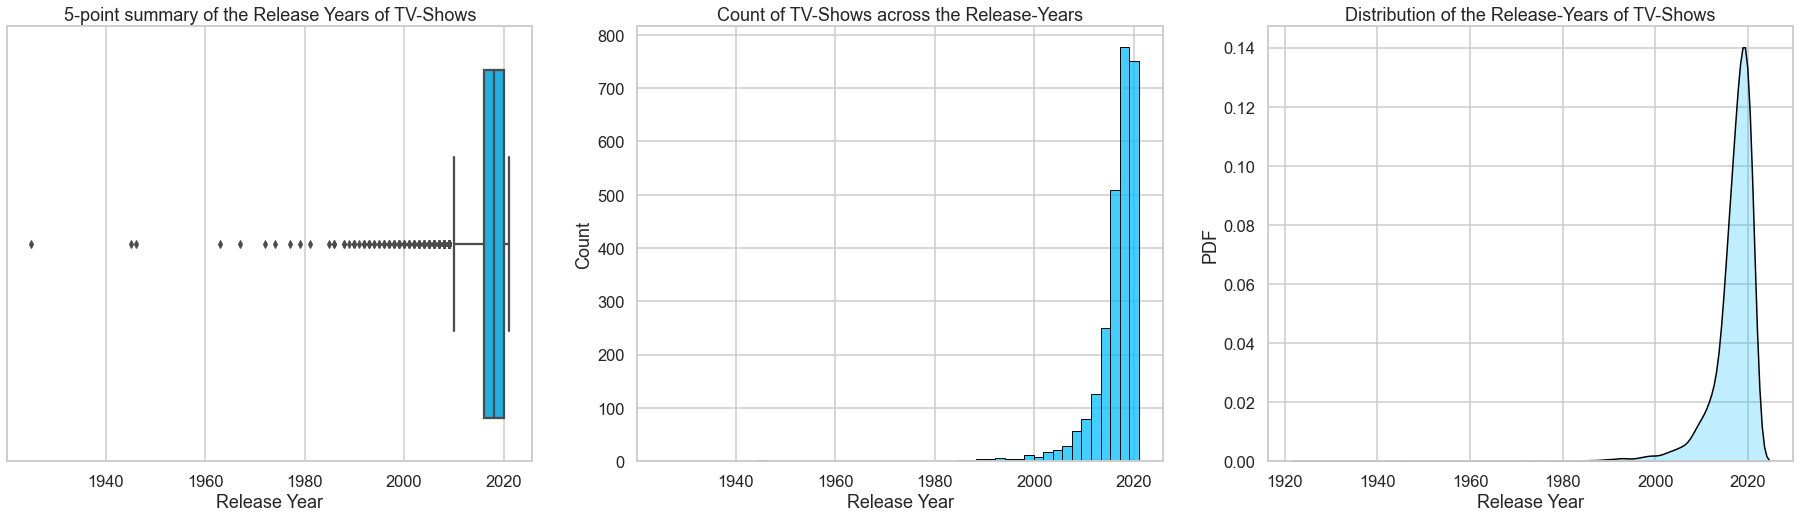

In [127]:
fig = plt.figure(figsize=(32,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 3, 1)
sns.boxplot(x=df_show['release_year'], color='deepskyblue')
plt.xlabel('Release Year')
plt.title('5-point summary of the Release Years of TV-Shows')
plt.subplot(1, 3, 2)
sns.histplot(x = df_show['release_year'], bins=50,
            color='deepskyblue', edgecolor='black')
plt.title('Count of TV-Shows across the Release-Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.kdeplot(df_show['release_year'], 
            fill=True, color='deepskyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('PDF')
plt.title('Distribution of the Release-Years of TV-Shows')
plt.savefig('./images/shows_byReleaseYear.png', dpi='figure', bbox_inches='tight')
plt.show()

In [128]:
df_show['release_year'].nunique()

46

#### **Feature: seasons**

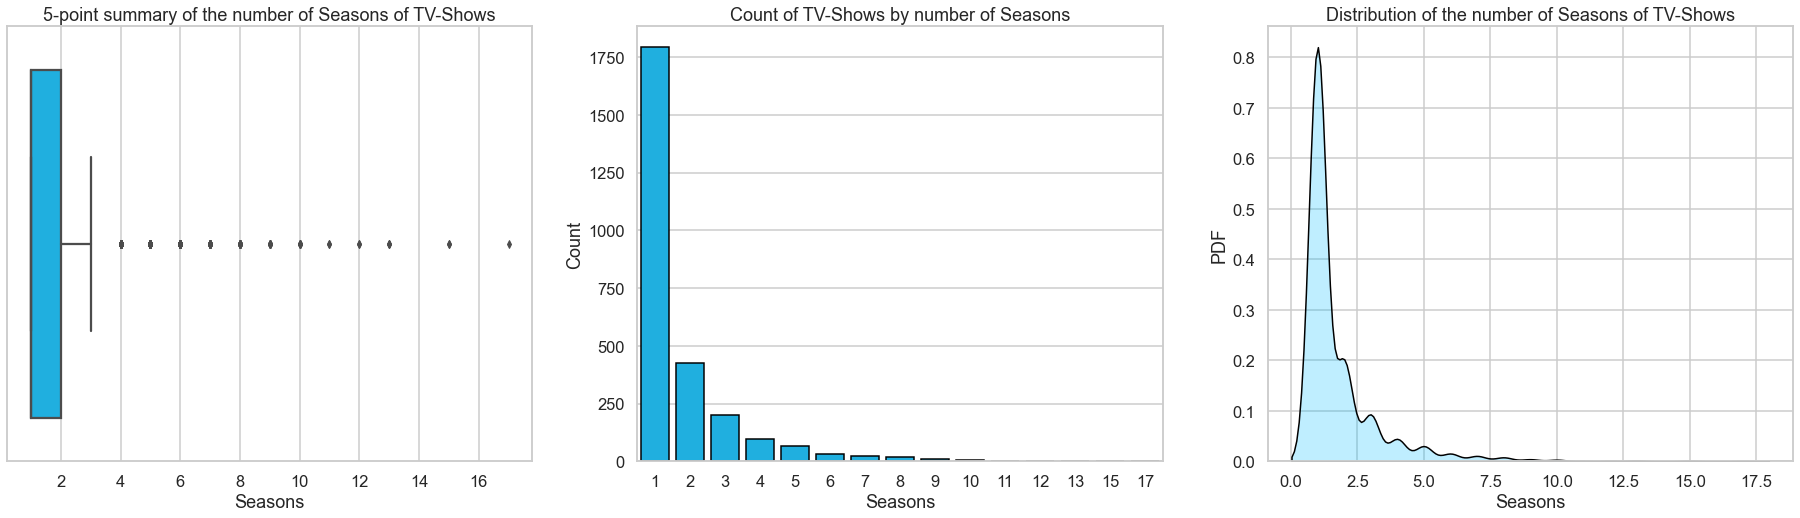

In [129]:
fig = plt.figure(figsize=(32,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 3, 1)
sns.boxplot(x=df_show['seasons'], color='deepskyblue')
plt.xlabel('Seasons')
plt.title('5-point summary of the number of Seasons of TV-Shows')
plt.subplot(1, 3, 2)
sns.countplot(x = df_show['seasons'],
            color='deepskyblue', edgecolor='black')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Count of TV-Shows by number of Seasons')
plt.subplot(1, 3, 3)
sns.kdeplot(df_show['seasons'], 
            fill=True, color='deepskyblue', edgecolor='black')
plt.xlabel('Seasons')
plt.ylabel('PDF')
plt.title('Distribution of the number of Seasons of TV-Shows')
plt.savefig('./images/shows_bySeasons.png', dpi='figure', bbox_inches='tight')
plt.show()

#### **Feature: date_added**

***Overall temporal trend of TV-Shows getting added on Netflix***

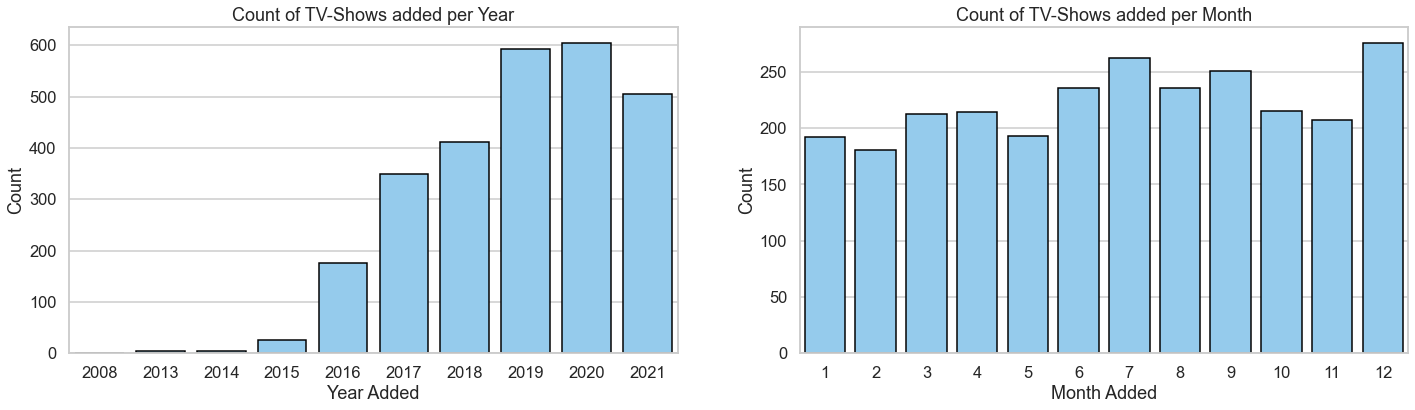

In [130]:
fig = plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
sns.countplot(x = df_show['year_added'],
            color='lightskyblue', edgecolor='black')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Count of TV-Shows added per Year')
plt.subplot(1, 2, 2)
sns.countplot(x = df_show['month_added'],
            color='lightskyblue', edgecolor='black')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Count of TV-Shows added per Month')
plt.savefig('./images/shows_byYearMonth.png', dpi='figure', bbox_inches='tight')
plt.show()

***When was the most number of TV-Shows added on Netflix (across Year and Month)?***

In [131]:
df_show_yearAdd_monthAdd_pt = pd.pivot_table(df_show, index='month_added', columns='year_added', values='title', aggfunc='count')
# df_show_yearAdd_monthAdd_pt

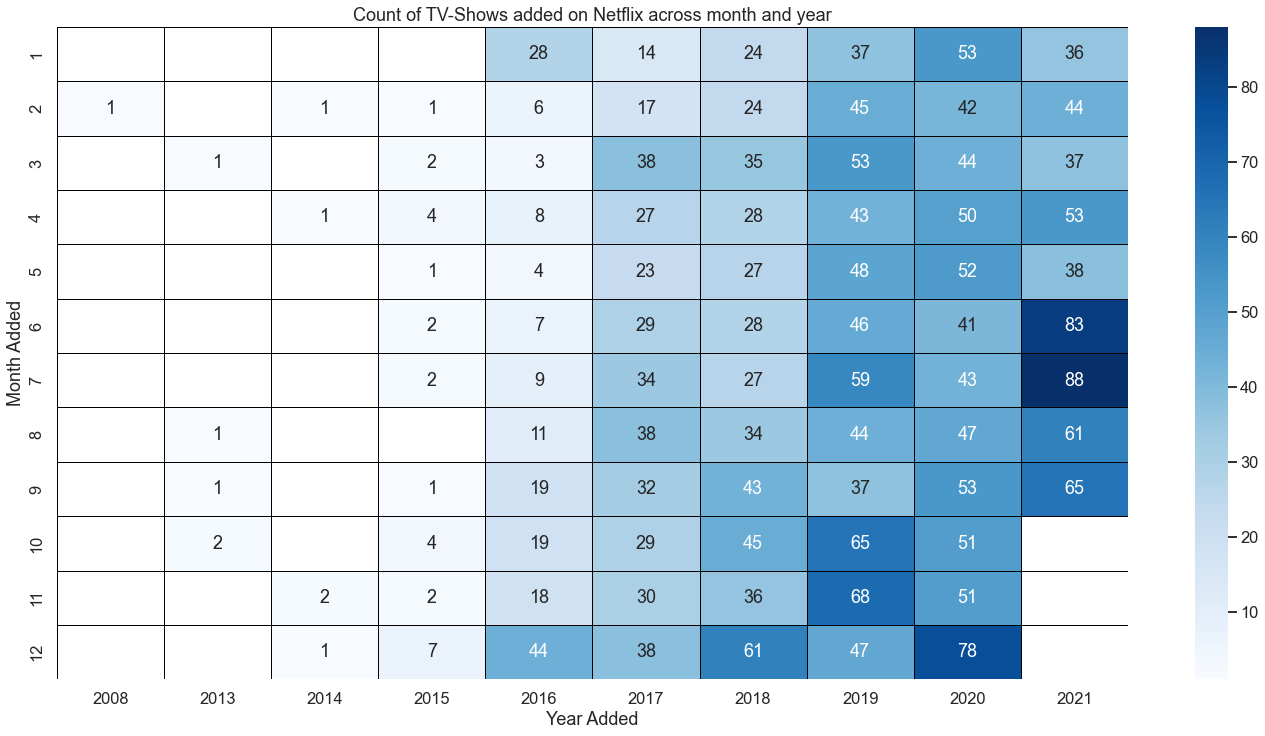

In [132]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(df_show_yearAdd_monthAdd_pt, 
            annot=True, fmt=".0f", cmap='Blues',
            linewidth=1, linecolor='black')
plt.xlabel("Year Added")
plt.ylabel("Month Added")
plt.title("Count of TV-Shows added on Netflix across month and year")
plt.savefig('./images/shows_byYearMonth_HeatMap.png', dpi='figure', bbox_inches='tight')
plt.show()

In [133]:
showAdd_acrossTime = df_show.groupby(['year_added', 'month_added'])['title'].agg(['count']).reset_index()

In [134]:
showAdd_acrossTime['year_month'] = showAdd_acrossTime[['year_added', 'month_added']].apply(lambda x: str(x['year_added']) + str('-') + str(x['month_added']), axis=1)
showAdd_acrossTime_post2015 = showAdd_acrossTime.loc[showAdd_acrossTime['year_added'] > 2015]

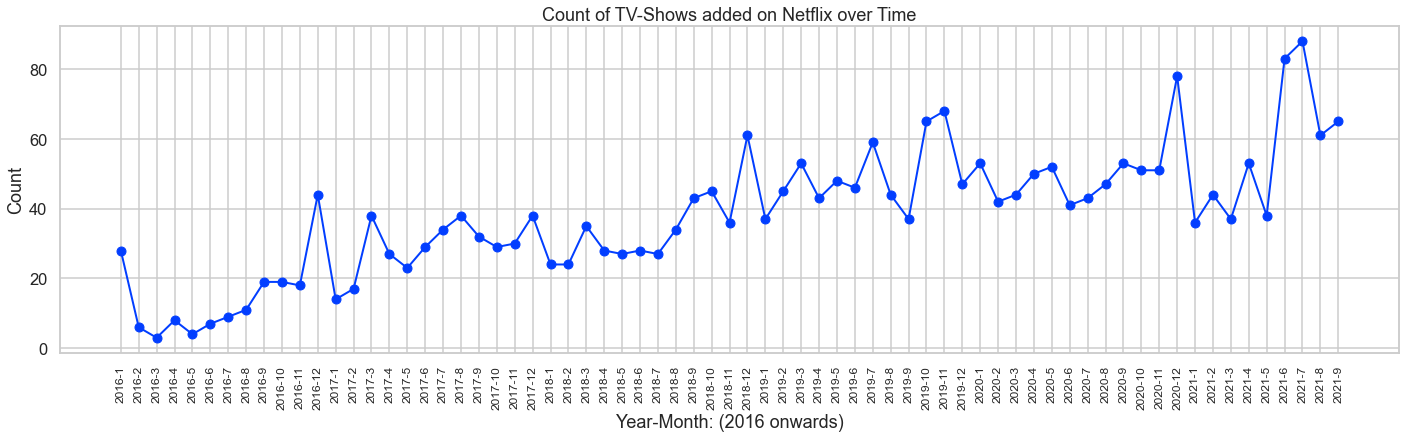

In [135]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.plot(showAdd_acrossTime_post2015['year_month'], 
         showAdd_acrossTime_post2015['count'], 
         marker='o', linewidth=2)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Year-Month: (2016 onwards)")
plt.ylabel("Count")
plt.title("Count of TV-Shows added on Netflix over Time")
plt.show()

## **Shows: Visualization-Multivariate**

### **Shows with high number of seasons(>3)**

In [136]:
shows_low_seasons = df_show.loc[df_show['seasons'] <= 3]
shows_high_seasons = df_show.loc[df_show['seasons'] > 3]

In [137]:
df_show['seasons'].apply(lambda x: 'Upto 3 seasons' if x <=3 else 'More than 3 seasons').value_counts()

Upto 3 seasons         2417
More than 3 seasons     259
Name: seasons, dtype: int64

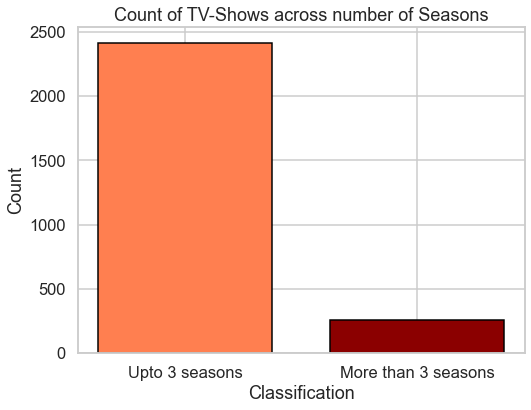

In [138]:
plt.figure(figsize=(8,6))
sns.set_context('talk')
sns.set_style('whitegrid')
c = ['coral', 'darkred']
plt.bar(df_show['seasons'].apply(lambda x: 'Upto 3 seasons' if x <=3 else 'More than 3 seasons').value_counts().index, 
        df_show['seasons'].apply(lambda x: 'Upto 3 seasons' if x <=3 else 'More than 3 seasons').value_counts(),
        color=c, edgecolor='black', width=0.75, align='center')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Count of TV-Shows across number of Seasons')
plt.savefig('./images/HighLowSeason_shows_count.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***What are the ratings of the shows with high seasons(>3)?***

In [139]:
shows_low_seasons_rating_counts = shows_low_seasons['rating'].value_counts()
shows_high_seasons_rating_counts = shows_high_seasons['rating'].value_counts().reindex(shows_low_seasons_rating_counts.index)

In [140]:
shows_high_seasons_rating_counts.fillna(0, inplace=True)

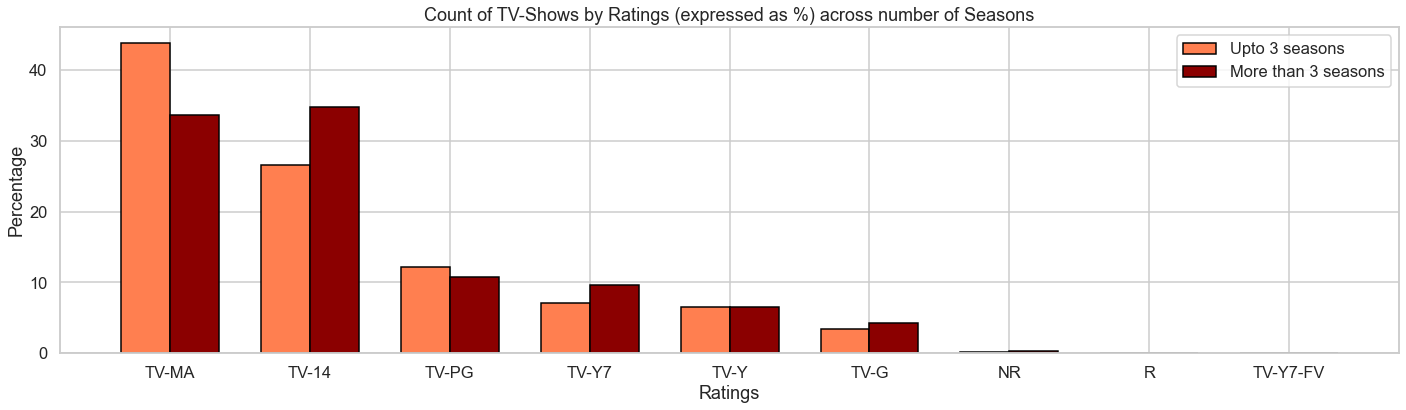

In [141]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
ind = np.arange(shows_low_seasons_rating_counts.index.size)
width=0.35
plt.bar(ind, 
        100*(shows_low_seasons_rating_counts/shows_low_seasons_rating_counts.values.sum()),
        color='coral', edgecolor='black', width=width, label='Upto 3 seasons')
plt.bar(ind+width, 
        100*(shows_high_seasons_rating_counts/shows_high_seasons_rating_counts.values.sum()),
        color='darkred', edgecolor='black', width=width, label='More than 3 seasons')
plt.xticks(ticks=(ind + width/2), labels=shows_low_seasons_rating_counts.index)
plt.xlabel(f'Ratings')
plt.ylabel('Percentage')
plt.title('Count of TV-Shows by Ratings (expressed as %) across number of Seasons')
plt.legend()
plt.savefig('./images/HighLowSeason_shows_count_byRating.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***What are the genres of the shows with high seasons(>3)?***

In [142]:
shows_low_seasons_genre_counts = shows_low_seasons['genre_mod'].str.get_dummies(sep='+').sum().sort_values(ascending=False)
shows_high_seasons_genre_counts = shows_high_seasons['genre_mod'].str.get_dummies(sep='+').sum().reindex(index=shows_low_seasons_genre_counts.index)

In [143]:
shows_high_seasons_genre_counts.values

array([55., 90., 95., 38., 56., 14., 18., 13., 26.,  9., 10.,  1., 33.,
        2., 14., 10., 21., 12.,  5.,  7., nan, 17.])

In [144]:
shows_high_seasons_genre_counts.fillna(0, inplace=True)

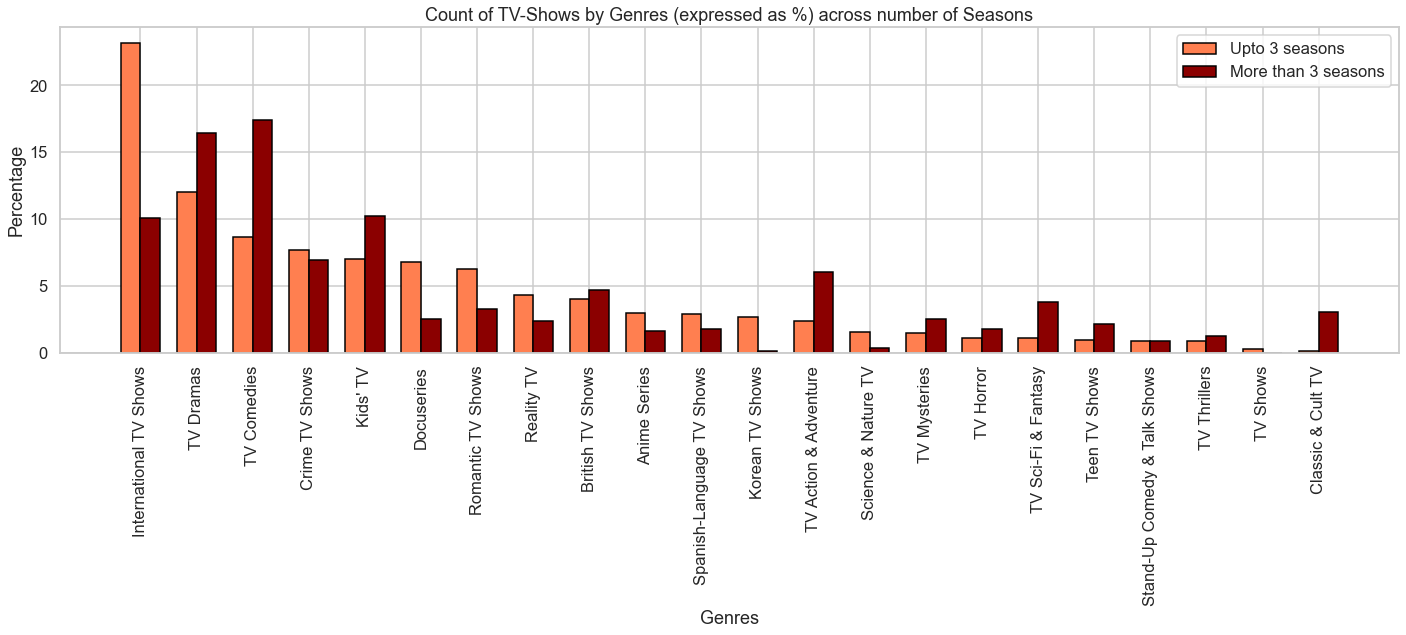

In [145]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
ind = np.arange(shows_low_seasons_genre_counts.index.size)
width=0.35
plt.bar(ind, 
        100*(shows_low_seasons_genre_counts/shows_low_seasons_genre_counts.values.sum()),
        color='coral', edgecolor='black', width=width, label='Upto 3 seasons')
plt.bar(ind+width, 
        100*(shows_high_seasons_genre_counts/shows_high_seasons_genre_counts.values.sum()),
        color='darkred', edgecolor='black', width=width, label='More than 3 seasons')
plt.xticks(ticks=(ind + width/2), labels=shows_low_seasons_genre_counts.index, rotation=90)
plt.xlabel(f'Genres')
plt.ylabel('Percentage')
plt.title('Count of TV-Shows by Genres (expressed as %) across number of Seasons')
plt.legend()
plt.savefig('./images/HighLowSeason_shows_count_byGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Temporal trend of how TV-Shows with higer seasons(>3) were added in Netflix?***

In [146]:
shows_low_seasons_yearAdd_counts = shows_low_seasons['year_added'].value_counts().sort_index()
shows_high_seasons_yearAdd_counts = shows_high_seasons['year_added'].value_counts().reindex(shows_low_seasons_yearAdd_counts.index)

In [147]:
shows_high_seasons_yearAdd_counts.fillna(0, inplace=True)

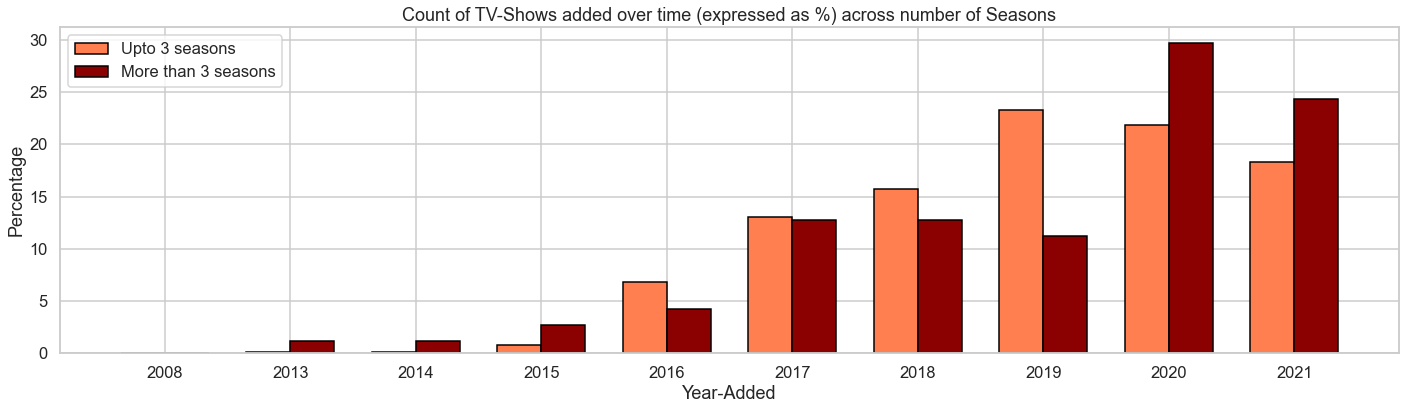

In [148]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
ind = np.arange(shows_low_seasons_yearAdd_counts.index.size)
width=0.35
plt.bar(ind, 
        100*(shows_low_seasons_yearAdd_counts/shows_low_seasons_yearAdd_counts.values.sum()),
        color='coral', edgecolor='black', width=width, label='Upto 3 seasons')
plt.bar(ind+width, 
        100*(shows_high_seasons_yearAdd_counts/shows_high_seasons_yearAdd_counts.values.sum()),
        color='darkred', edgecolor='black', width=width, label='More than 3 seasons')
plt.xticks(ticks=(ind + width/2), labels=shows_low_seasons_yearAdd_counts.index)
plt.xlabel(f'Year-Added')
plt.ylabel('Percentage')
plt.title('Count of TV-Shows added over time (expressed as %) across number of Seasons')
plt.legend()
plt.savefig('./images/HighLowSeason_shows_count_overTime.png', dpi='figure', bbox_inches='tight')
plt.show()

### **Shows in Top-5 Genres and Top-5 Ratings**

In [149]:
top5_genres = series_show_genre.value_counts().index[:5]
top5_ratings = df_show['rating'].value_counts().index[:5]

In [150]:
# Filtering out shows if in any of the Top-5 genres (Note that genres are non-mutually exclusive)
df_show_t1 = pd.concat([df_show, df_show['genre_mod'].str.get_dummies(sep='+').loc[:, top5_genres]], axis=1)
shows_top5_genres = df_show_t1.loc[df_show_t1[top5_genres].apply(np.any, axis=1)]
# Now we filter only those shows which fall in the Top-5 ratings
shows_top5_genres_top5_ratings = shows_top5_genres.loc[shows_top5_genres['rating'].isin(top5_ratings), 
                                                       ['title', 'country_mod', 'rating', 'seasons', 'release_year', 'year_added', 'International TV Shows', 'TV Dramas', 'TV Comedies', 
                                                        'Crime TV Shows', "Kids' TV"]]

#### ***Count of shows*** 

In [151]:
showsCount_top5_genres_top5_ratings = shows_top5_genres_top5_ratings.groupby('rating')[top5_genres].agg(['sum'])
showsCount_top5_genres_top5_ratings.columns = [tup[0] for tup in showsCount_top5_genres_top5_ratings.columns]
showsCount_top5_genres_top5_ratings

International TV Shows  TV Dramas  TV Comedies  Crime TV Shows  \
rating                                                                   
TV-14                      472        269          140             111   
TV-MA                      715        434          270             350   
TV-PG                      134         49           60               4   
TV-Y                         0          0           28               0   
TV-Y7                        3          0           54               3   

        Kids' TV  
rating            
TV-14          0  
TV-MA          1  
TV-PG         41  
TV-Y         176  
TV-Y7        189

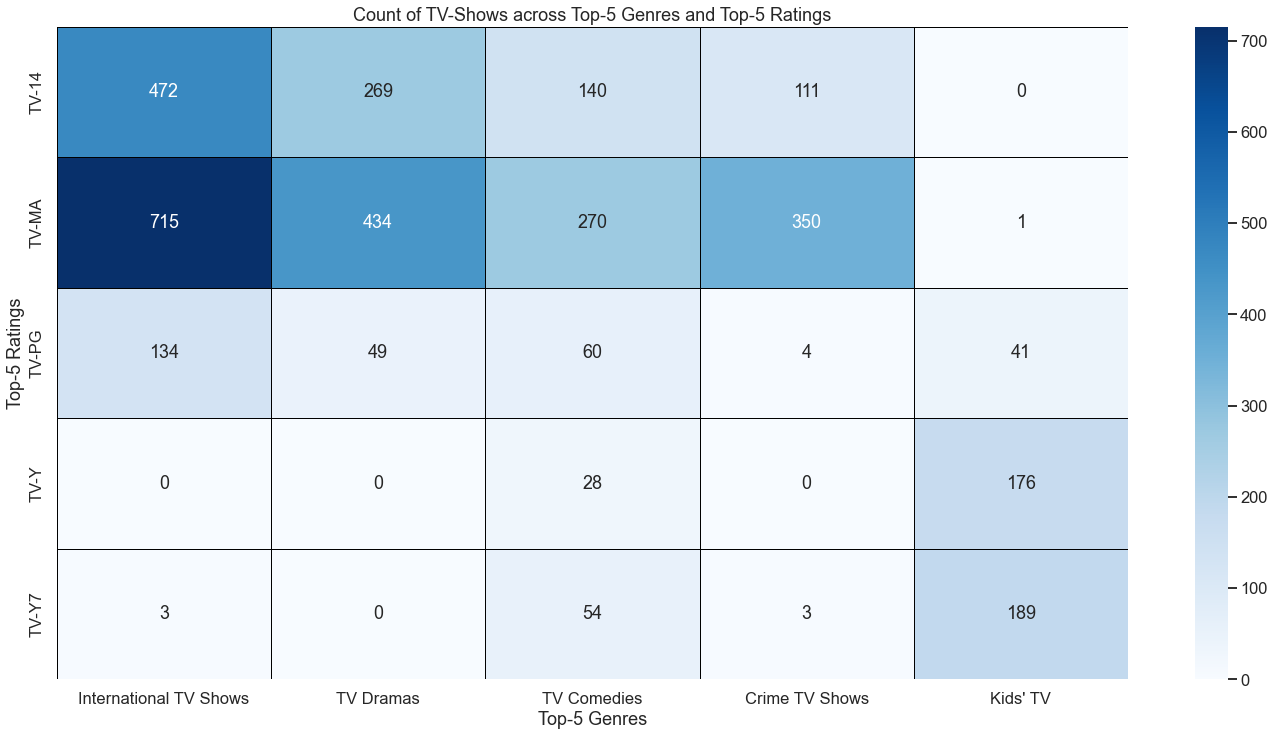

In [152]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(showsCount_top5_genres_top5_ratings, 
            annot=True, fmt=".0f", cmap='Blues',
            linewidth=1, linecolor='black')
plt.xlabel("Top-5 Genres")
plt.ylabel("Top-5 Ratings")
plt.title("Count of TV-Shows across Top-5 Genres and Top-5 Ratings")
plt.savefig('./images/shows_count_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

In [153]:
# Melting all the genres under a single column
shows_top5_genres_top5_ratings_melt = pd.melt(shows_top5_genres_top5_ratings, id_vars=['title', 'country_mod', 'rating', 'seasons', 'release_year', 'year_added'], 
                                              var_name='genre', value_name='genre_value')
# Filtering out only those rows where show is of a valid genre
shows_top5_genres_top5_ratings_melt = shows_top5_genres_top5_ratings_melt.loc[shows_top5_genres_top5_ratings_melt['genre_value'] == 1]

#### ***Mean of seasons*** 

In [154]:
showsSeasonMean_top5_genres_top5_ratings = pd.pivot_table(shows_top5_genres_top5_ratings_melt, 
                                                                 index='rating', columns='genre', values='seasons', aggfunc='mean')[top5_genres]
showsSeasonMean_top5_genres_top5_ratings

genre   International TV Shows  TV Dramas  TV Comedies  Crime TV Shows  \
rating                                                                   
TV-14                 1.338983   1.959108     2.150000        1.963964   
TV-MA                 1.495105   1.797235     2.003704        1.634286   
TV-PG                 1.216418   1.836735     2.700000        1.000000   
TV-Y                       NaN        NaN     1.857143             NaN   
TV-Y7                 1.666667        NaN     2.166667        2.333333   

genre   Kids' TV  
rating            
TV-14        NaN  
TV-MA   1.000000  
TV-PG   2.024390  
TV-Y    1.852273  
TV-Y7   2.042328

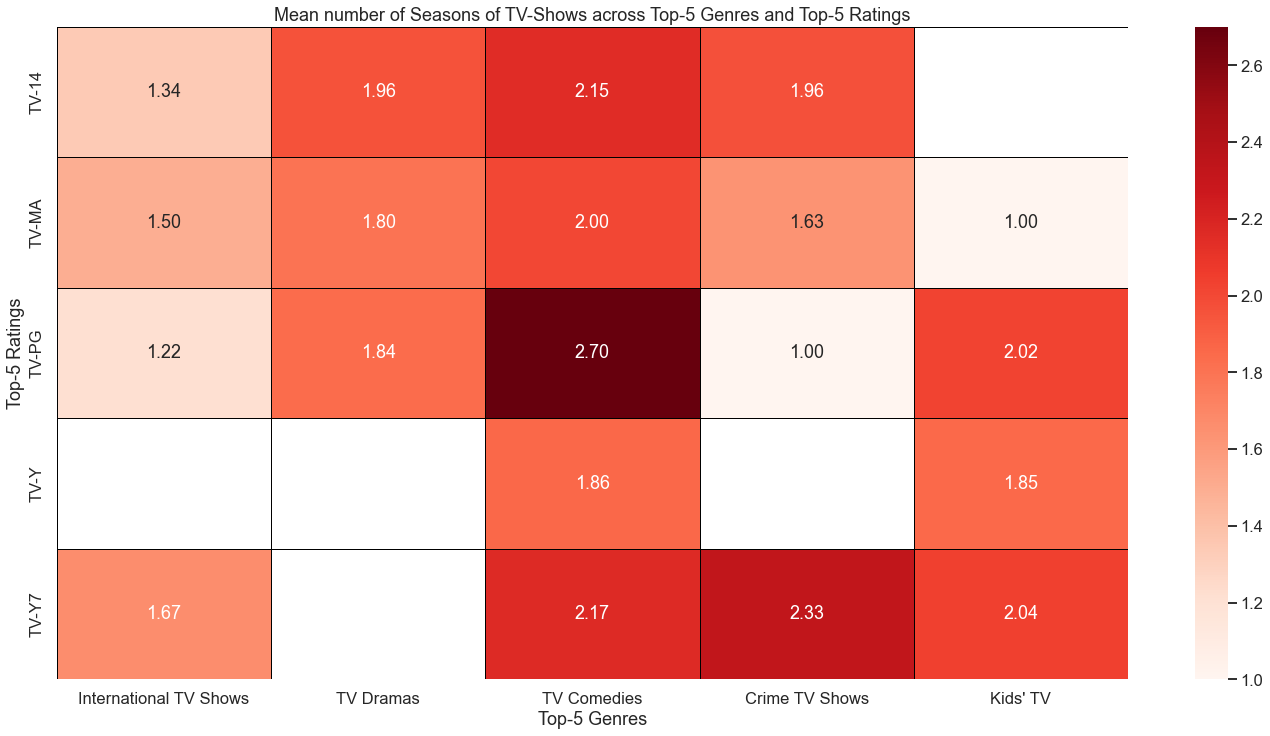

In [155]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(showsSeasonMean_top5_genres_top5_ratings, 
            annot=True, fmt=".2f", cmap='Reds',
            linewidth=1, linecolor='black')
plt.xlabel("Top-5 Genres")
plt.ylabel("Top-5 Ratings")
plt.title("Mean number of Seasons of TV-Shows across Top-5 Genres and Top-5 Ratings")
plt.savefig('./images/shows_meanSeasons_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Temporal Trend***

In [156]:
showsPost2015_top5_genres_top5_ratings = shows_top5_genres_top5_ratings_melt.loc[(shows_top5_genres_top5_ratings_melt['year_added'] >= 2016) & 
                                                                                 (shows_top5_genres_top5_ratings_melt['year_added'] < 2021)]

In [157]:
# fig = plt.figure(figsize=(32,8))
# sns.set_context('talk')
# sns.set_style('whitegrid')
# plt.subplot(1, 2, 1)
# sns.countplot(x = showsPost2015_top5_genres_top5_ratings['year_added'], 
#               hue=showsPost2015_top5_genres_top5_ratings['rating'])
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.title('Count of TV-Shows (Top-5 Ratings) across the Release-Years')
# plt.subplot(1, 2, 2)
# sns.countplot(x = showsPost2015_top5_genres_top5_ratings['year_added'], 
#               hue=showsPost2015_top5_genres_top5_ratings['genre'])
# plt.title('Count of TV-Shows (Top-5 Genres) across the Release-Years')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

In [158]:
showsPost2015_top5_genre_yoy = showsPost2015_top5_genres_top5_ratings.groupby(['genre', 'year_added'])['title'].agg(['count']).reset_index()
showsPost2015_top5_genre_yoy_pivot = pd.pivot(showsPost2015_top5_genre_yoy, index=['year_added'], columns='genre', values='count')
showsPost2015_top5_genre_yoy_pivot

genre       Crime TV Shows  International TV Shows  Kids' TV  TV Comedies  \
year_added                                                                  
2016                    27                      85        36           37   
2017                    62                     201        42           60   
2018                    85                     213        59           98   
2019                   109                     328        76          112   
2020                   103                     272        99          123   

genre       TV Dramas  
year_added             
2016               41  
2017              129  
2018              108  
2019              163  
2020              161

In [159]:
showsPost2015_top5_rating_yoy = showsPost2015_top5_genres_top5_ratings.groupby(['rating', 'year_added'])['title'].agg(['count']).reset_index()
showsPost2015_top5_rating_yoy_pivot = pd.pivot(showsPost2015_top5_rating_yoy, index=['year_added'], columns='rating', values='count')
showsPost2015_top5_rating_yoy_pivot

rating      TV-14  TV-MA  TV-PG  TV-Y  TV-Y7
year_added                                  
2016           78     82     30     9     27
2017          228    149     61    20     36
2018          147    307     51    19     39
2019          212    433     64    33     46
2020          158    441     45    72     42

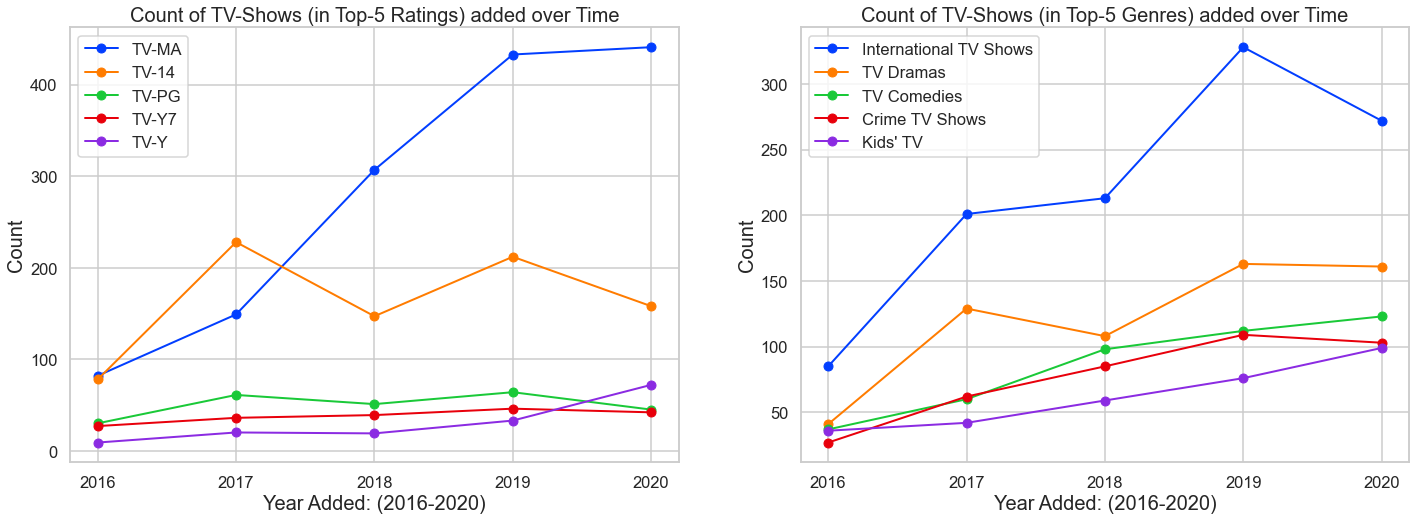

In [160]:
fig = plt.figure(figsize=(24,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
plt.plot(showsPost2015_top5_rating_yoy_pivot.index, showsPost2015_top5_rating_yoy_pivot['TV-MA'], label='TV-MA', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_rating_yoy_pivot.index, showsPost2015_top5_rating_yoy_pivot['TV-14'], label='TV-14', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_rating_yoy_pivot.index, showsPost2015_top5_rating_yoy_pivot['TV-PG'], label='TV-PG', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_rating_yoy_pivot.index, showsPost2015_top5_rating_yoy_pivot['TV-Y7'], label='TV-Y7', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_rating_yoy_pivot.index, showsPost2015_top5_rating_yoy_pivot["TV-Y"], label="TV-Y", linewidth=2, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.title('Count of TV-Shows (in Top-5 Ratings) added over Time', fontsize=20)
plt.subplot(1, 2, 2)
plt.plot(showsPost2015_top5_genre_yoy_pivot.index, showsPost2015_top5_genre_yoy_pivot['International TV Shows'], label='International TV Shows', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_genre_yoy_pivot.index, showsPost2015_top5_genre_yoy_pivot['TV Dramas'], label='TV Dramas', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_genre_yoy_pivot.index, showsPost2015_top5_genre_yoy_pivot['TV Comedies'], label='TV Comedies', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_genre_yoy_pivot.index, showsPost2015_top5_genre_yoy_pivot['Crime TV Shows'], label='Crime TV Shows', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_genre_yoy_pivot.index, showsPost2015_top5_genre_yoy_pivot["Kids' TV"], label="Kids' TV", linewidth=2, marker='o')
plt.title('Count of TV-Shows (in Top-5 Genres) added over Time', fontsize=20)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.savefig('./images/shows_count_overTime_top5RatingGenre.png', dpi='figure', bbox_inches='tight')
plt.show()

### **Seeing trends across Top-5 TV-Show creating country**

In [161]:
top5_con = series_show_con.value_counts().index[:5]

In [162]:
df_show_t2 = pd.concat([df_show, df_show['country_mod'].str.get_dummies(sep='+').loc[:, top5_con]], axis=1)
shows_top5_con = df_show_t2.loc[df_show_t2[top5_con].apply(np.any, axis=1), ['title', 'genre_mod', 'rating', 'seasons', 'release_year', 'year_added', 
                                                                             'United States', 'United Kingdom', 'Japan', 'South Korea', "Canada"]]

In [163]:
df_show_t2.shape

(2676, 17)

In [164]:
shows_top5_con.shape

(1571, 11)

#### ***Popular Ratings***

In [165]:
showsCount_byRating_top5_con = shows_top5_con.groupby('rating')[top5_con].agg(['sum'])
showsCount_byRating_top5_con.columns = [tup[0] for tup in showsCount_byRating_top5_con.columns]
showsCount_byRating_top5_con

United States  United Kingdom  Japan  South Korea  Canada
rating                                                             
NR                    2               2      0            0       0
TV-14               221              45     76           82      20
TV-G                 42              15      2            1       9
TV-MA               382             115     70           55      35
TV-PG               124              57     22           15      14
TV-Y                 75              29      2            8      20
TV-Y7                92               9     27            9      27
TV-Y7-FV              0               0      0            0       1

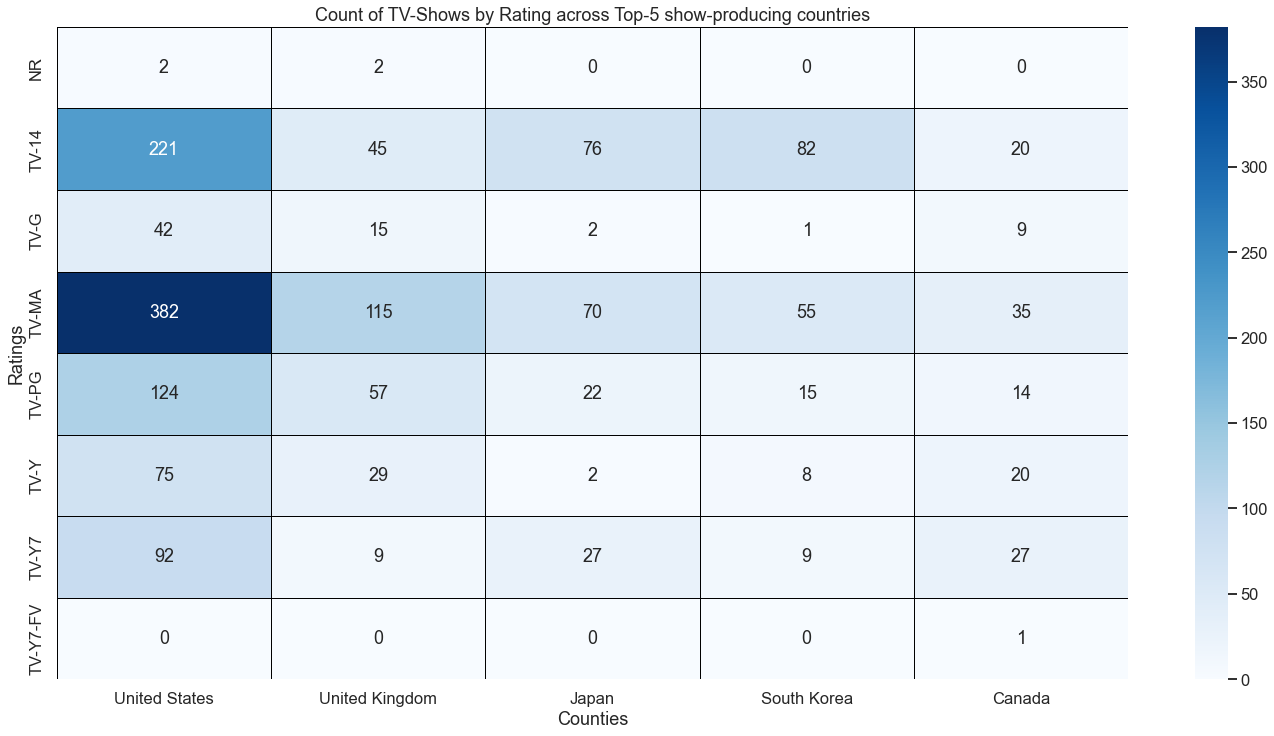

In [166]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(showsCount_byRating_top5_con, 
            annot=True, fmt=".0f", cmap='Blues',
            linewidth=1, linecolor='black')
plt.xlabel("Counties")
plt.ylabel("Ratings")
plt.title("Count of TV-Shows by Rating across Top-5 show-producing countries")
plt.savefig('./images/shows_count_byRating_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Popular Genres***

In [167]:
# Splitting open thye genres_mod column
df_show_t3 = pd.concat([shows_top5_con[['title', 'United States', 'United Kingdom', 'Japan', 'South Korea', "Canada"]], shows_top5_con['genre_mod'].str.get_dummies(sep='+')], axis=1)
# Melting all the genres under a single column
shows_top5_con_genresMelt = pd.melt(df_show_t3, id_vars=['title', 'United States', 'United Kingdom', 'Japan', 'South Korea', "Canada"], var_name='genres', value_name='genre_value')
# Filtering out only those rows where show is of a valid genre
shows_top5_con_genresMelt = shows_top5_con_genresMelt.loc[shows_top5_con_genresMelt['genre_value'] == 1]

In [168]:
showsCount_byGenre_top5_con = shows_top5_con_genresMelt.groupby('genres')[top5_con].agg(['sum'])
showsCount_byGenre_top5_con.columns = [tup[0] for tup in showsCount_byGenre_top5_con.columns]
showsCount_byGenre_top5_con

United States  United Kingdom  Japan  \
genres                                                               
Anime Series                             18               0    143   
British TV Shows                         24             225      1   
Classic & Cult TV                        17               7      0   
Crime TV Shows                          145              48     16   
Docuseries                              192              89      2   
International TV Shows                   74             128    151   
Kids' TV                                214              43     29   
Korean TV Shows                           3               0      0   
Reality TV                              123              35      9   
Romantic TV Shows                        44              11     21   
Science & Nature TV                      49              27      0   
Spanish-Language TV Shows                29               1      0   
Stand-Up Comedy & Talk Shows             33               1      1   
TV Action & Adventure                    94               9      5   
TV Comedies                             258              44     10   
TV Dramas                               232              36     21   
TV Horror                                37               2      5   
TV Mysteries                             51               2      4   
TV Sci-Fi & Fantasy                      60               4      0   
TV Shows                                  4               0      1   
TV Thrillers                             27               2      6   
Teen TV Shows                            33               0     14   

                              South Korea  Canada  
genres                                             
Anime Series                            0       2  
British TV Shows                        0       3  
Classic & Cult TV                       0       4  
Crime TV Shows                         24      15  
Docuseries                              0      11  
International TV Shows                152      25  
Kids' TV                               16      61  
Korean TV Shows                       132       1  
Reality TV                              4       9  
Romantic TV Shows                      77       2  
Science & Nature TV                     0       4  
Spanish-Language TV Shows               0       0  
Stand-Up Comedy & Talk Shows            4       0  
TV Action & Adventure                   9      12  
TV Comedies                            19      30  
TV Dramas                              38      32  
TV Horror                               3       8  
TV Mysteries                            3       9  
TV Sci-Fi & Fantasy                     0       9  
TV Shows                                0       0  
TV Thrillers                            1       5  
Teen TV Shows                           0       2

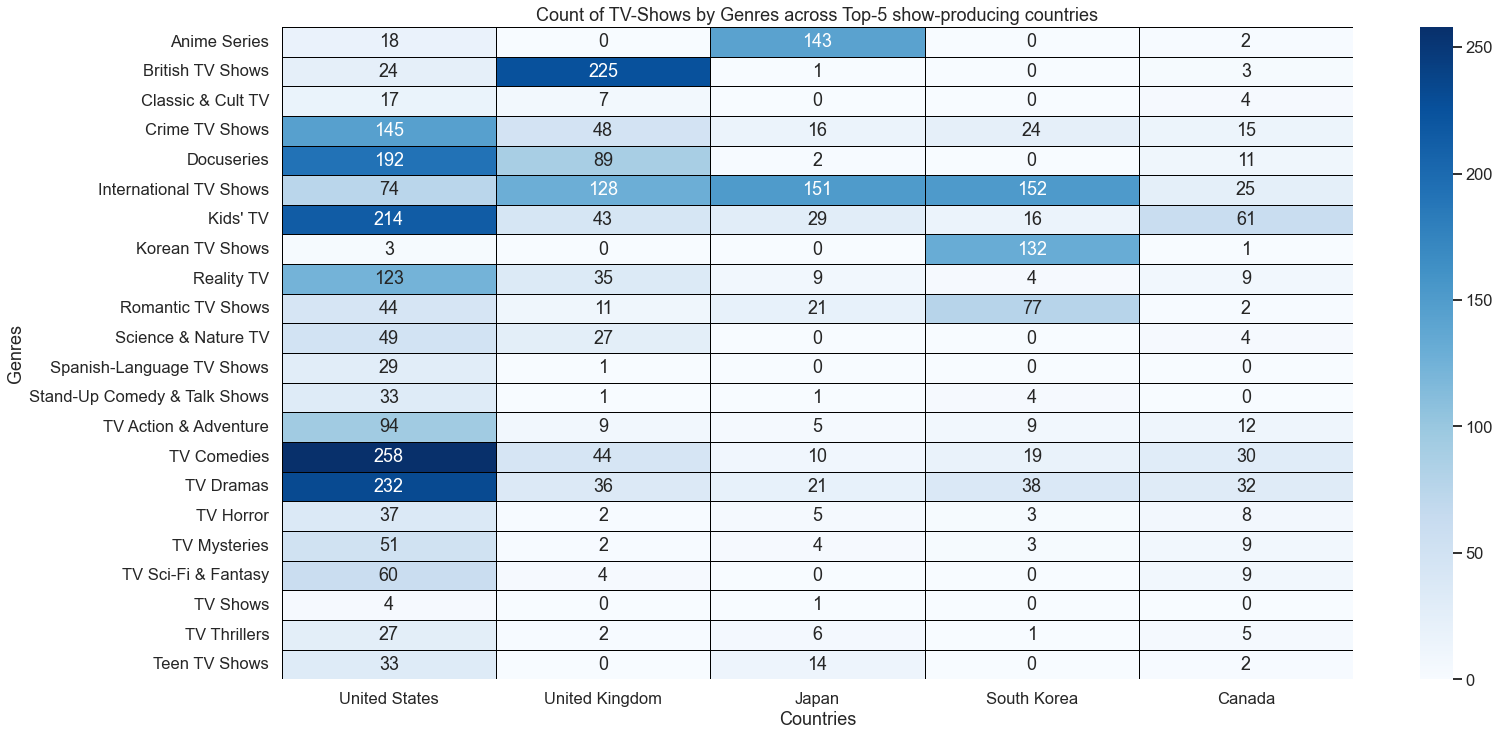

In [169]:
plt.figure(figsize=(24,12))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.heatmap(showsCount_byGenre_top5_con, 
            annot=True, fmt=".0f", cmap='Blues',
            linewidth=1, linecolor='black')
plt.xlabel("Countries")
plt.ylabel("Genres")
plt.title("Count of TV-Shows by Genres across Top-5 show-producing countries")
plt.savefig('./images/shows_count_byGenre_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

In [170]:
# Melting all the countries under a single column
shows_top5_con_conMelt = pd.melt(shows_top5_con, id_vars=['title', 'genre_mod', 'rating', 'seasons', 'release_year', 'year_added'], var_name='country', value_name='country_value')
# Filtering out only those rows where show is of a valid country
shows_top5_con_conMelt = shows_top5_con_conMelt.loc[shows_top5_con_conMelt['country_value'] == 1]

#### ***Seasons***

In [171]:
shows_top5_con_conMelt.groupby('country')['seasons'].agg(['mean']).sort_values('mean')[::-1]

mean
country                 
Canada          2.817460
United States   2.313433
United Kingdom  1.900735
Japan           1.587940
South Korea     1.252941

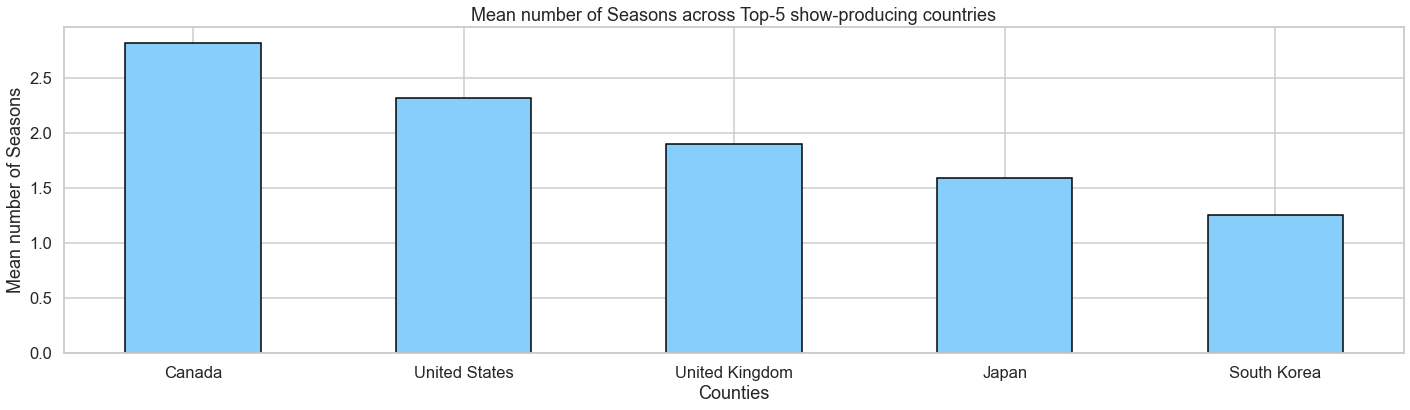

In [172]:
plt.figure(figsize=(24,6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.bar(shows_top5_con_conMelt.groupby('country')['seasons'].agg(['mean']).sort_values('mean')[::-1].index, 
        shows_top5_con_conMelt.groupby('country')['seasons'].agg(['mean']).sort_values('mean')['mean'][::-1], 
        width=0.5, color='lightskyblue', edgecolor='black')
plt.xlabel("Counties")
plt.ylabel("Mean number of Seasons")
plt.title("Mean number of Seasons across Top-5 show-producing countries")
plt.savefig('./images/shows_meanSeasons_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

#### ***Temporal Trend***

In [173]:
shows_top5_con_conMelt

title  \
1                          Dear White People   
3     He-Man and the Masters of the Universe   
4                                  Nailed It   
6                          Saved by the Bell   
9                                    Lucifer   
...                                      ...   
7820                        The Pyramid Code   
7826       The Super Mario Bros. Super Show!   
7828                              The Tudors   
7837                                   Tobot   
7853                         Yu-Gi-Oh! Arc-V   

                                 genre_mod rating  seasons  release_year  \
1                    TV Comedies+TV Dramas  TV-MA        4          2021   
3             Kids' TV+TV Sci-Fi & Fantasy  TV-Y7        1          2021   
4                               Reality TV  TV-PG        6          2021   
6                     Kids' TV+TV Comedies  TV-PG        9          1994   
9     Crime TV Shows+TV Comedies+TV Dramas  TV-14        6          2021   
...                                    ...    ...      ...           ...   
7820        Docuseries+Science & Nature TV  TV-PG        1          2009   
7826                              Kids' TV  TV-Y7        1          1989   
7828                             TV Dramas  TV-MA        4          2010   
7837              Kids' TV+Korean TV Shows  TV-Y7        2          2018   
7853                 Anime Series+Kids' TV  TV-Y7        2          2015   

      year_added        country  country_value  
1           2021  United States              1  
3           2021  United States              1  
4           2021  United States              1  
6           2021  United States              1  
9           2021  United States              1  
...          ...            ...            ...  
7820        2016         Canada              1  
7826        2016         Canada              1  
7828        2018         Canada              1  
7837        2019         Canada              1  
7853        2018         Canada              1  

[1705 rows x 8 columns]

In [174]:
showsPost2015_top5_con = shows_top5_con_conMelt.loc[(shows_top5_con_conMelt['year_added'] >= 2016) & 
                                                    (shows_top5_con_conMelt['year_added'] < 2021)]

In [175]:
showsPost2015_top5_con_yoy = showsPost2015_top5_con.groupby(['country', 'year_added'])['title'].agg(['count']).reset_index()
showsPost2015_top5_con_yoy_pivot = pd.pivot(showsPost2015_top5_con_yoy, index=['year_added'], columns='country', values='count')
showsPost2015_top5_con_yoy_pivot

country     Canada  Japan  South Korea  United Kingdom  United States
year_added                                                           
2016            14     24           10              22             64
2017            17     20           32              53             98
2018            19     31           18              44            145
2019            22     45           45              60            178
2020            31     49           44              50            252

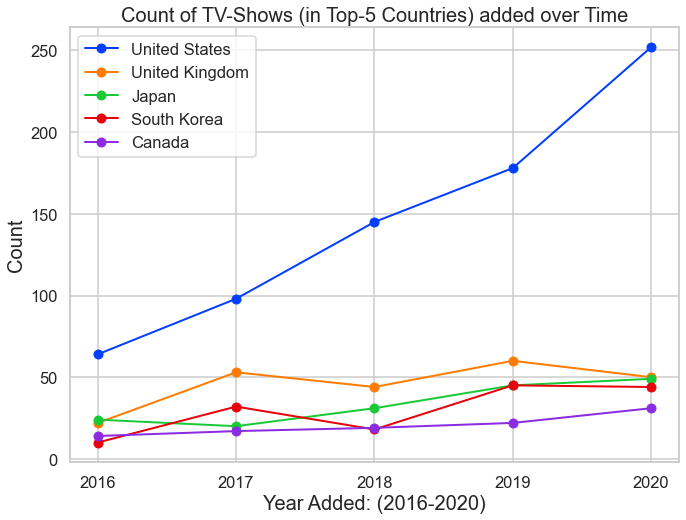

In [176]:
plt.figure(figsize=(24,8))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
plt.plot(showsPost2015_top5_con_yoy_pivot.index, showsPost2015_top5_con_yoy_pivot['United States'], label='United States', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_con_yoy_pivot.index, showsPost2015_top5_con_yoy_pivot['United Kingdom'], label='United Kingdom', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_con_yoy_pivot.index, showsPost2015_top5_con_yoy_pivot['Japan'], label='Japan', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_con_yoy_pivot.index, showsPost2015_top5_con_yoy_pivot['South Korea'], label='South Korea', linewidth=2, marker='o')
plt.plot(showsPost2015_top5_con_yoy_pivot.index, showsPost2015_top5_con_yoy_pivot["Canada"], label="Canada", linewidth=2, marker='o')
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.xlabel('Year Added: (2016-2020)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend()
plt.title('Count of TV-Shows (in Top-5 Countries) added over Time', fontsize=20)
plt.savefig('./images/shows_count_overTime_top5Country.png', dpi='figure', bbox_inches='tight')
plt.show()

In [177]:
# movAdd_acrossTime_post2015

In [178]:
# showAdd_acrossTime_post2015

In [179]:
# movAdd_acrossTime_post2015['count'].values - showAdd_acrossTime_post2015['count'].values

In [180]:
# Count of content added on Netflix across Year and Month (2016 onwards, line chart)

# fig = plt.figure(figsize=(24,20))
# sns.set_context('talk')
# sns.set_style('whitegrid')
# plt.subplot(2, 1, 1)
# plt.plot(movAdd_acrossTime_post2015['year_month'], 
#          movAdd_acrossTime_post2015['count'], 
#          marker='o', linewidth=2, label='Movies')
# plt.plot(showAdd_acrossTime_post2015['year_month'], 
#          showAdd_acrossTime_post2015['count'], 
#          marker='o', linewidth=2, label='TV-Shows')
# plt.xticks(rotation=90, fontsize=12)
# plt.xlabel("Year-Month: (2016 onwards)")
# plt.ylabel("Count")
# plt.title("Count of content added on Netflix over Time")
# plt.legend()
# # plt.subplot(2, 1, 2)
# # plt.plot(showAdd_acrossTime_post2015['year_month'], 
# #          movAdd_acrossTime_post2015['count'].values - showAdd_acrossTime_post2015['count'].values, 
# #          marker='o', linewidth=2, color='red', label='TV-Shows')
# # plt.xticks(rotation=90, fontsize=12)
# # plt.xlabel("Year-Month: (2016 onwards)")
# # plt.ylabel("Count")
# # plt.title("Difference in movies and TV-Shows added on Netflix over Time")
# plt.savefig('./images/movies_vs_shows_count_overTime.png', dpi='figure', bbox_inches='tight')
# plt.show()

In [181]:
# Count of content added on Netflix across years (2016-2020)

# df_concat = pd.concat([df_mov, df_show], axis=0)
# df_concat.columns

# plt.figure(figsize=(24,6))
# sns.set_context('talk')
# sns.set_style('whitegrid')
# sns.countplot(x = df_concat.loc[(df_concat['year_added']>=2016) & (df_concat['year_added']<=2020), 'year_added'], 
#               hue=df_concat.loc[(df_concat['year_added']>=2016) & (df_concat['year_added']<=2020), 'type'], edgecolor='black')
# plt.xlabel(f"Year-Added")
# plt.ylabel('Count')
# plt.title('Count of Movies and TV-Shows added over the Years')
# plt.savefig('./images/movies_vs_shows_count_byYear.png', dpi='figure', bbox_inches='tight')
# plt.show()

# **Showing basic statistics on the data (After data cleaning)**

## **Movies**

In [182]:
df_mov.describe(include='all')

type                 title director     cast  \
count    6131                  6131     6131     6131   
unique      1                  6131     4355     5446   
top     Movie  Dick Johnson Is Dead  Unknown  Unknown   
freq     6131                     1      188      475   
mean      NaN                   NaN      NaN      NaN   
std       NaN                   NaN      NaN      NaN   
min       NaN                   NaN      NaN      NaN   
25%       NaN                   NaN      NaN      NaN   
50%       NaN                   NaN      NaN      NaN   
75%       NaN                   NaN      NaN      NaN   
max       NaN                   NaN      NaN      NaN   

                                              description    country_mod  \
count                                                6131           6131   
unique                                               6105            648   
top     Paranormal activity at a lush, abandoned prope...  United States   
freq                                                    4           2059   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                          genre_mod rating  duration_mins  release_year  \
count                          6131   6131    6131.000000   6131.000000   
unique                          278     14            NaN           NaN   
top     Dramas+International Movies  TV-MA            NaN           NaN   
freq                            362   2067            NaN           NaN   
mean                            NaN    NaN      99.564998   2013.121514   
std                             NaN    NaN      28.289504      9.678169   
min                             NaN    NaN       3.000000   1942.000000   
25%                             NaN    NaN      87.000000   2012.000000   
50%                             NaN    NaN      98.000000   2016.000000   
75%                             NaN    NaN     114.000000   2018.000000   
max                             NaN    NaN     312.000000   2021.000000   

         year_added  month_added  
count   6131.000000  6131.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean    2018.849290     6.608057  
std        1.561922     3.452525  
min     2008.000000     1.000000  
25%     2018.000000     4.000000  
50%     2019.000000     7.000000  
75%     2020.000000    10.000000  
max     2021.000000    12.000000

## **TV-Shows**

In [183]:
df_show.describe(include='all')

type          title             director     cast  \
count      2676           2676                  230     2676   
unique        1           2676                  222     2284   
top     TV Show  Blood & Water  Alastair Fothergill  Unknown   
freq       2676              1                    3      350   
mean        NaN            NaN                  NaN      NaN   
std         NaN            NaN                  NaN      NaN   
min         NaN            NaN                  NaN      NaN   
25%         NaN            NaN                  NaN      NaN   
50%         NaN            NaN                  NaN      NaN   
75%         NaN            NaN                  NaN      NaN   
max         NaN            NaN                  NaN      NaN   

                                              description    country_mod  \
count                                                2676           2676   
unique                                               2672            196   
top     This educational series for tiny tots features...  United States   
freq                                                    2            760   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

       genre_mod rating      seasons  release_year   year_added  month_added  
count       2676   2676  2676.000000   2676.000000  2676.000000  2676.000000  
unique       236      9          NaN           NaN          NaN          NaN  
top     Kids' TV  TV-MA          NaN           NaN          NaN          NaN  
freq         220   1147          NaN           NaN          NaN          NaN  
mean         NaN    NaN     1.764948   2016.605755  2018.927877     6.782511  
std          NaN    NaN     1.582752      5.740138     1.599659     3.406394  
min          NaN    NaN     1.000000   1925.000000  2008.000000     1.000000  
25%          NaN    NaN     1.000000   2016.000000  2018.000000     4.000000  
50%          NaN    NaN     1.000000   2018.000000  2019.000000     7.000000  
75%          NaN    NaN     2.000000   2020.000000  2020.000000    10.000000  
max          NaN    NaN    17.000000   2021.000000  2021.000000    12.000000

# **Missing values and Outlier Check**

-  Missing values have been dealt with in the data pre-processing section
-  Outlier check is shown below:
    -  Only quantitative columns will have outliers
    -  We analyse the following columns for Movies and TV-Show seperately:
        1. Release_Year
        2. Duration

## **Movies**

### **Release_Year:**
-  The data is left-skewed and we have many outliers
-  Outliers are present only on one side and lie roughly below 2003
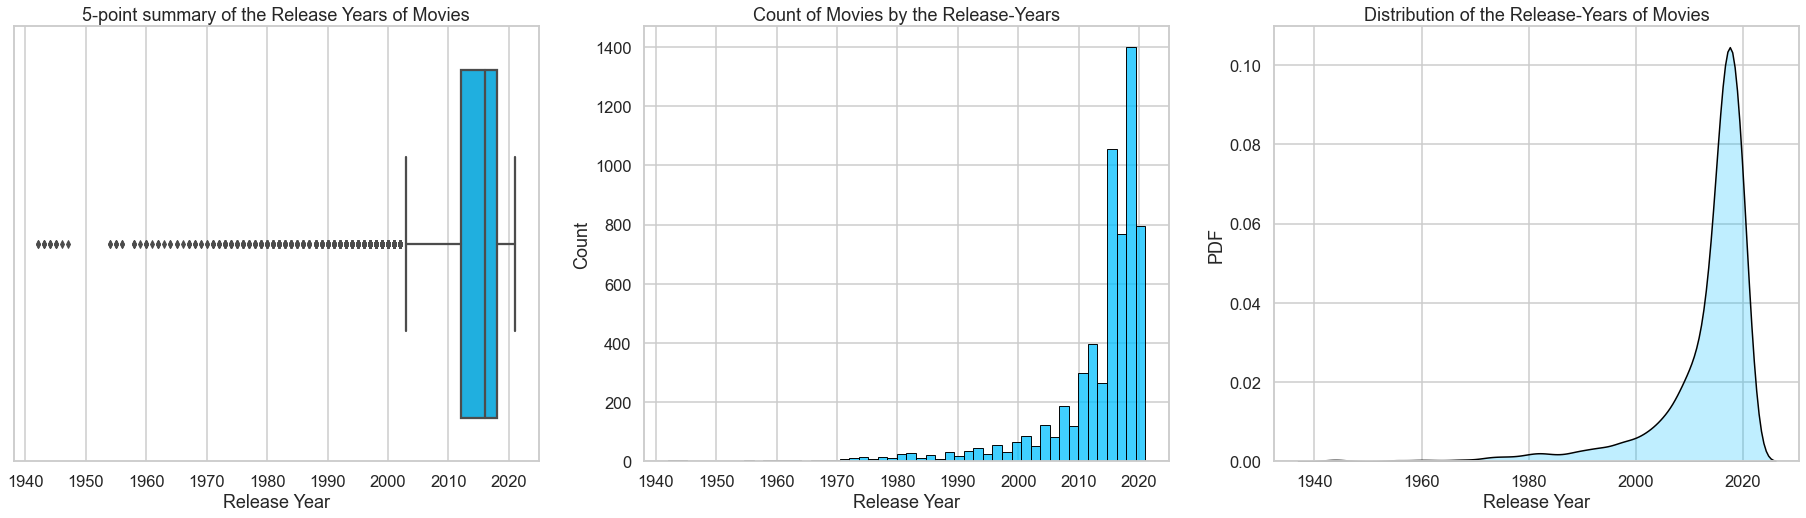

### **Duration in minutes:**
-  The data looks evenly distributed
-  Outliers are present on both sides and lie roughly above 150 mins and below 50 mins
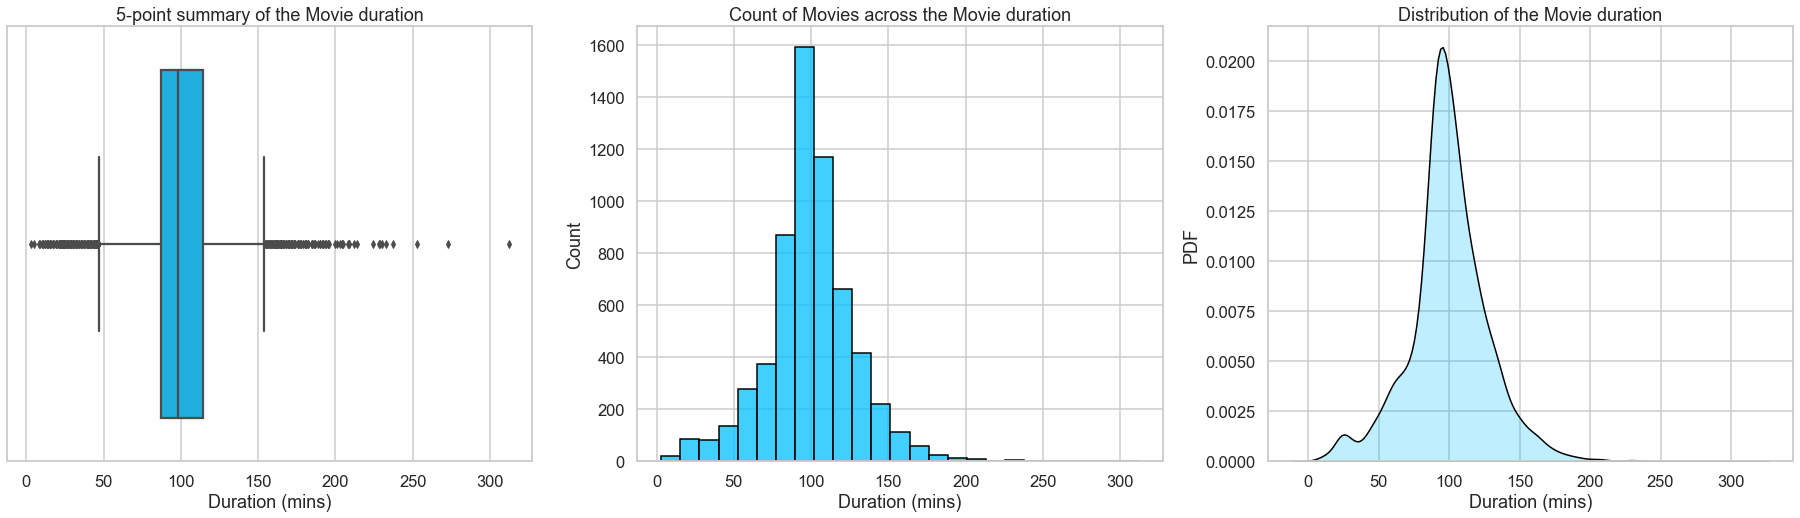

## **TV-Shows**

### **Release_Year:**
-  The data is left-skewed and we have many outliers
-  Outliers are present only on one side and lie roughly below 2009
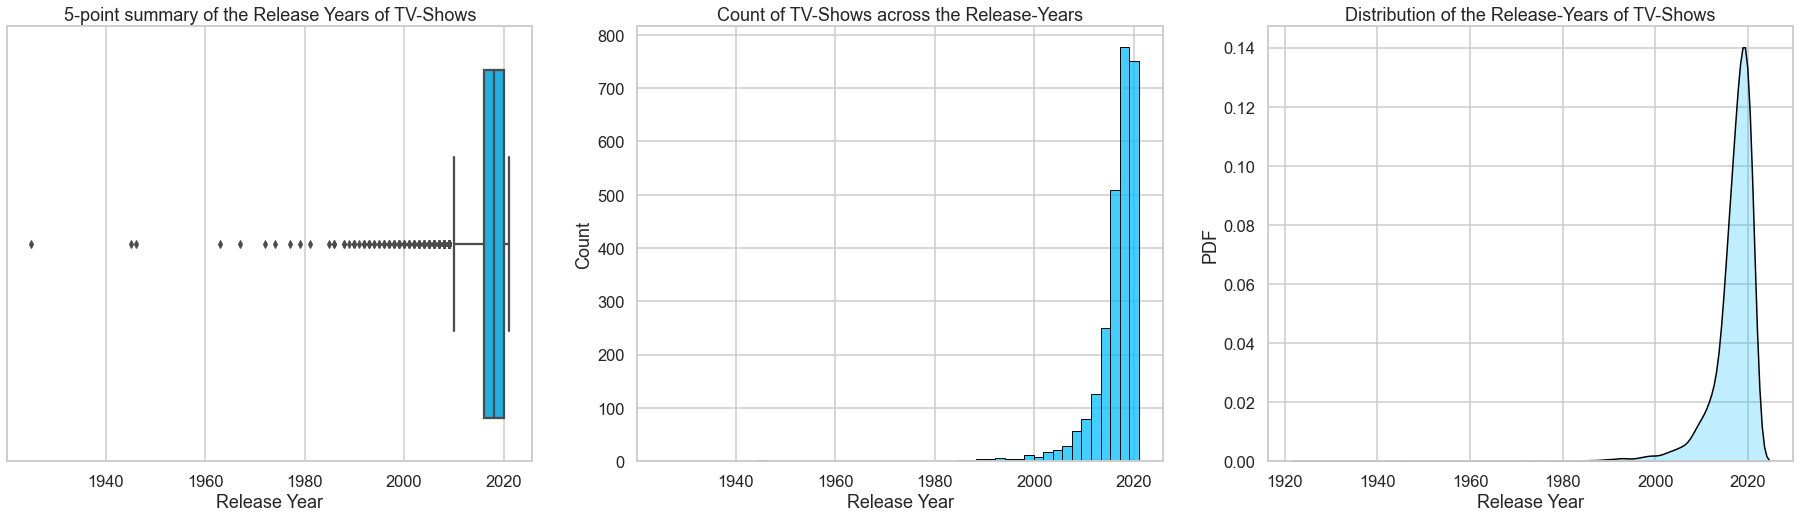

### **Duration in Number of Seasons:**
-  The data is right skewd and there are some outliers
-  Outliers are present only on one side and lie roughly above 3
-  We have grouped all the outliers (shows with #seasons > 3) and done a comparative analysis with all the other shows which constitute the bulk of the data
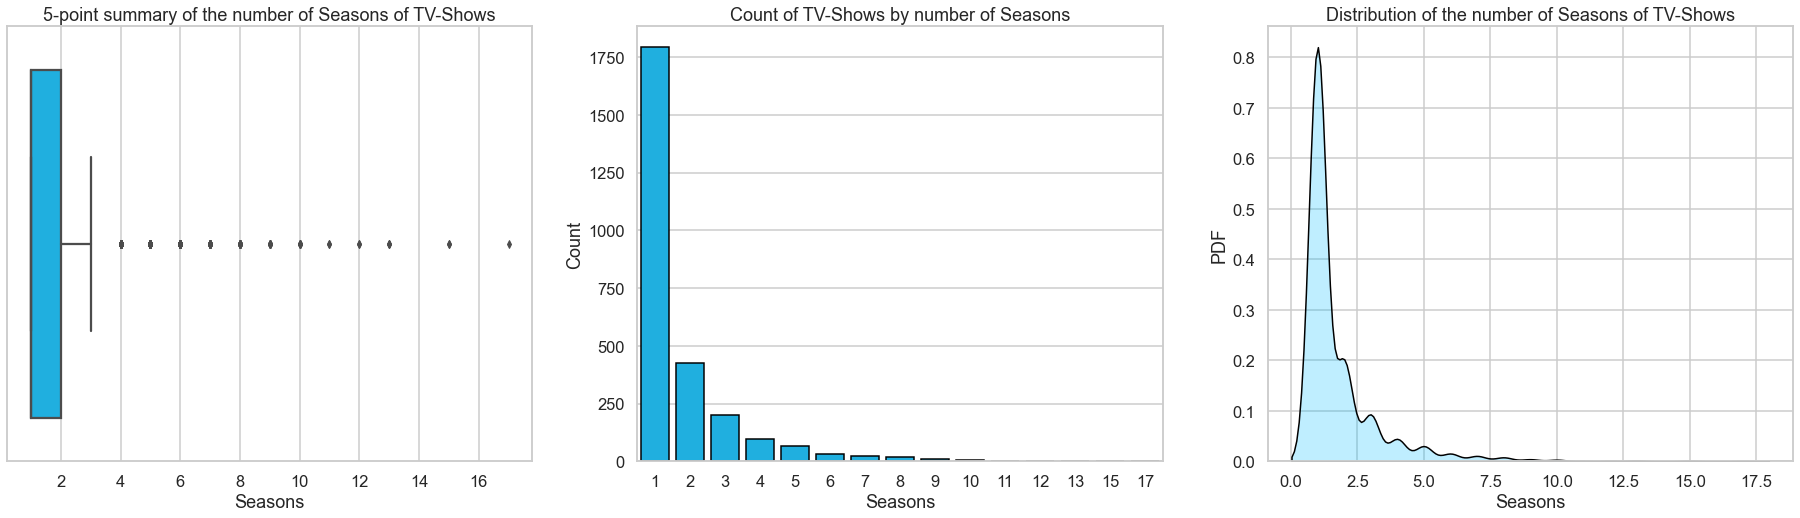

# **Business Insights and Recommendations**

## ***Movies vs TV-Shows***  

***INSIGHTS:***
-  The content in Netflix can be classfied into 2 segments: Movies and TV shows
-  From the data it is very evident that Movies outnumber the TV-Shows. 
-  We can also see how Movies and TV-Shows were added on Neflix over time:  
    -  The number of Movies added over time (2016 onwards) has clearly dominated that of the TV-Shows as evident from below.

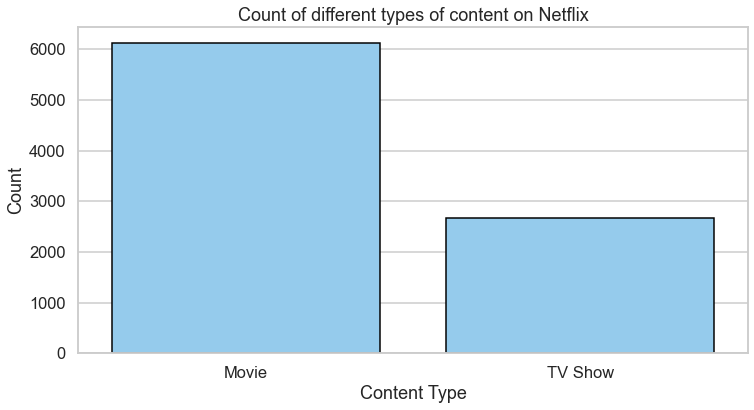
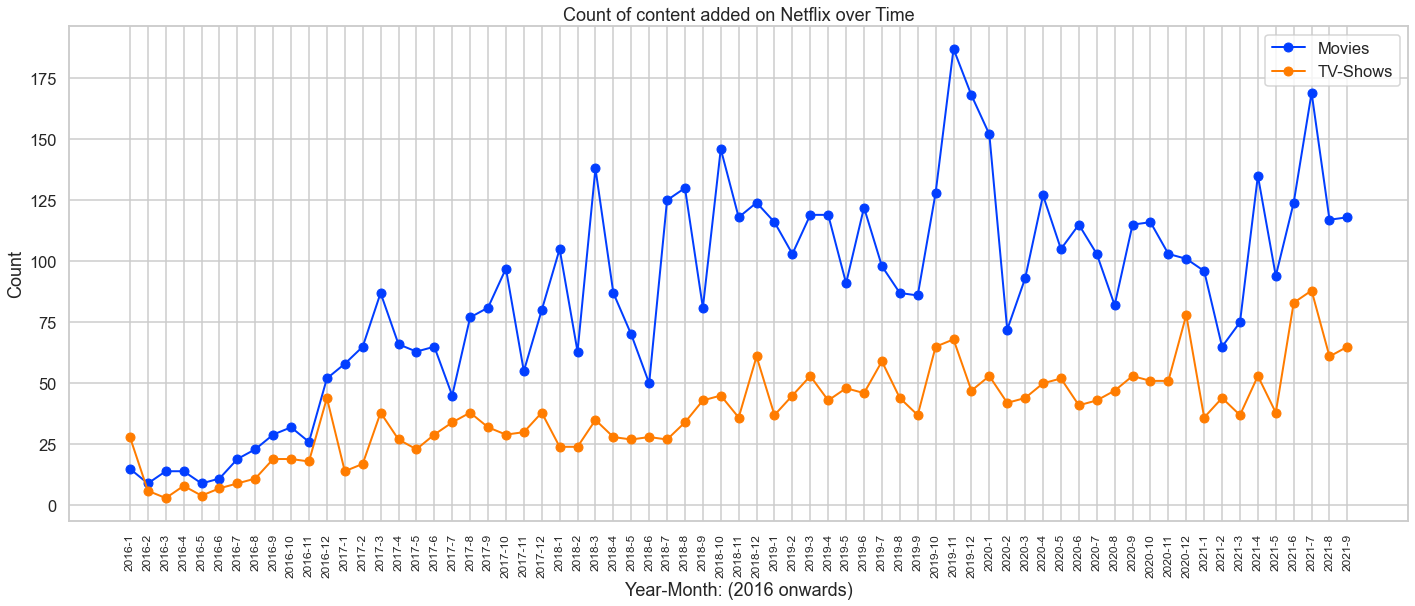

***Possible reasons for more  Movies than TV-Shows:***
-  We can assume that the demand of Movies on Netflix is more than that of TV-Shows.
-  The time to consume a movie is far less than that of a TV-Show thus making it more suitable for watching.
-  Usually TV-Shows will have a single story told over many episodes and many people may not simply have the time to watch a complete TV-Shows.

***Recent trends on Movies vs TV-Shows***
-  However we see that there is an increase in the number of TV-shows added over the years (from 2016 to 2020). This is a good sign as it indicates that TV-Shows is a growing niche market. 
-  At the same time we see that the number of movies added across the same time frame had increased and peaked in 2019 and then started to decline from there on
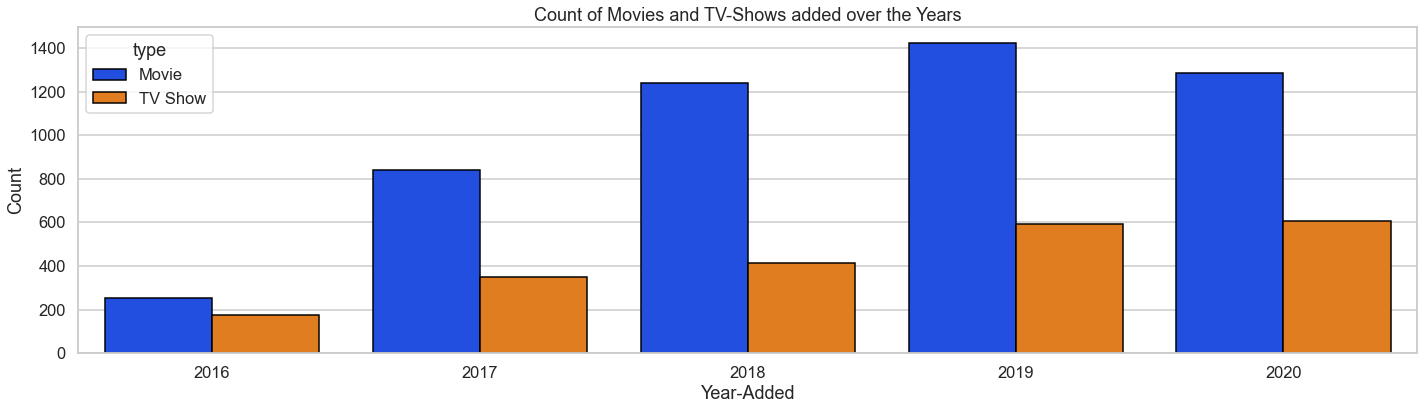



***RECOMMENDATIONS:***
-  Focus should be primarily given on movies since it constitutes majority of the content
-  However since the number of TV-Shows added over time has increased, we can slowly ramp up the production of more shows.
-  **The content to be added should be based on the following broad factors: (We try to answer all these questions sunsequently)**
    -  What are the popular genres and ratings for the content on Netflix?
    -  Can we get really specific and find out the most loved genre and rating across Movies and TV-Shows?
    -  What are the top content producing countries?
    -  Is there any country-wise trend when it comes to the genres and ratings of the content produced?
        -  For example, Genre-A may be a popular genere globally but may not be a popular genre in Country-A. In that case, we should give less priority to produce content of Genre-A in Country-A.
        -  More specifically, we want to find out the popular genres and ratings across the Top 5 content producing countries?
        -  Draw insights from the temporal trends observed across countries
    - Comparison b/w TV Shows which ran for more than 3 seasons and those that didnt
-  **We will now try to identify the answers to the above questions individually for both Movies and TV-Shows**

## ***What are the popular genres and ratings of the Netflix content?***

***INSIGHTS:***
-  We have clearly identified the most popular genres, ratings across both Movies and TV-Shows
-  ***Popular Movie Genres:*** 
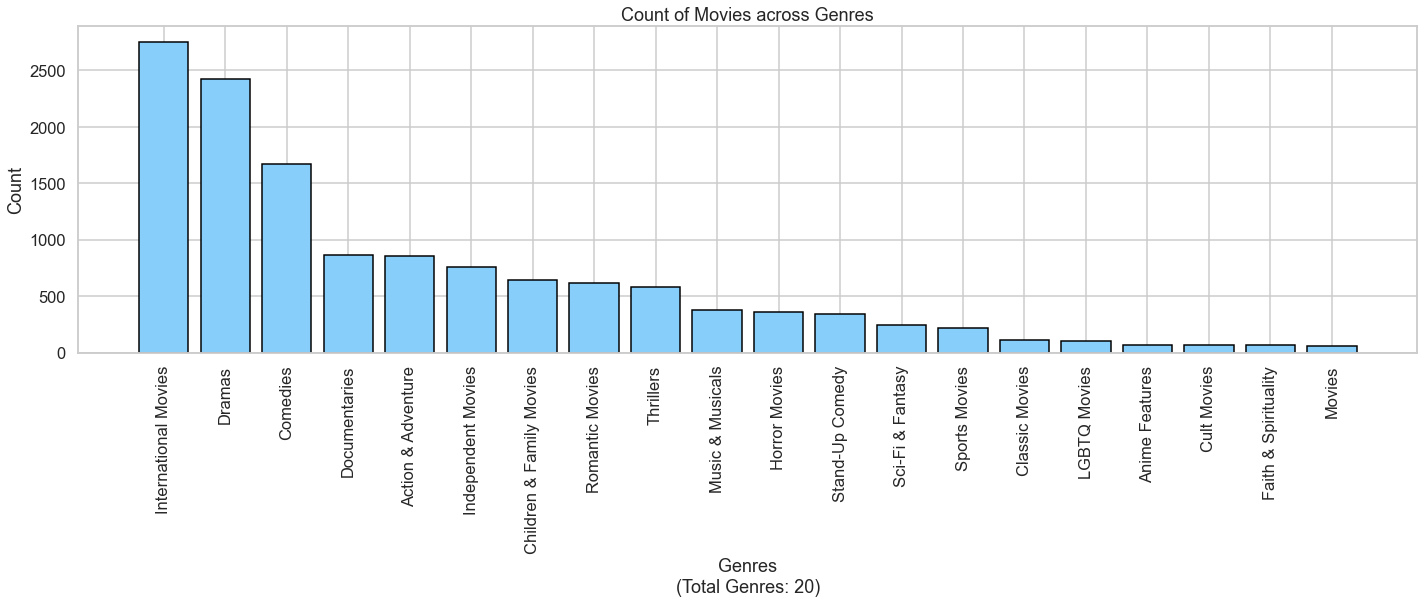

-  ***Popular Movie Ratings:*** 
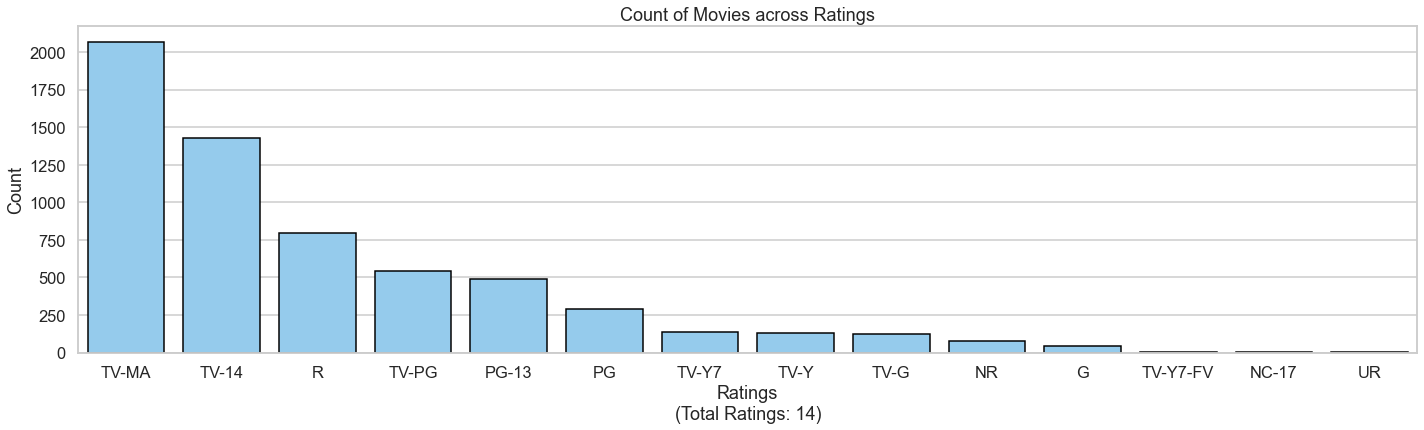

-  ***Popular TV-Show Genres:*** 
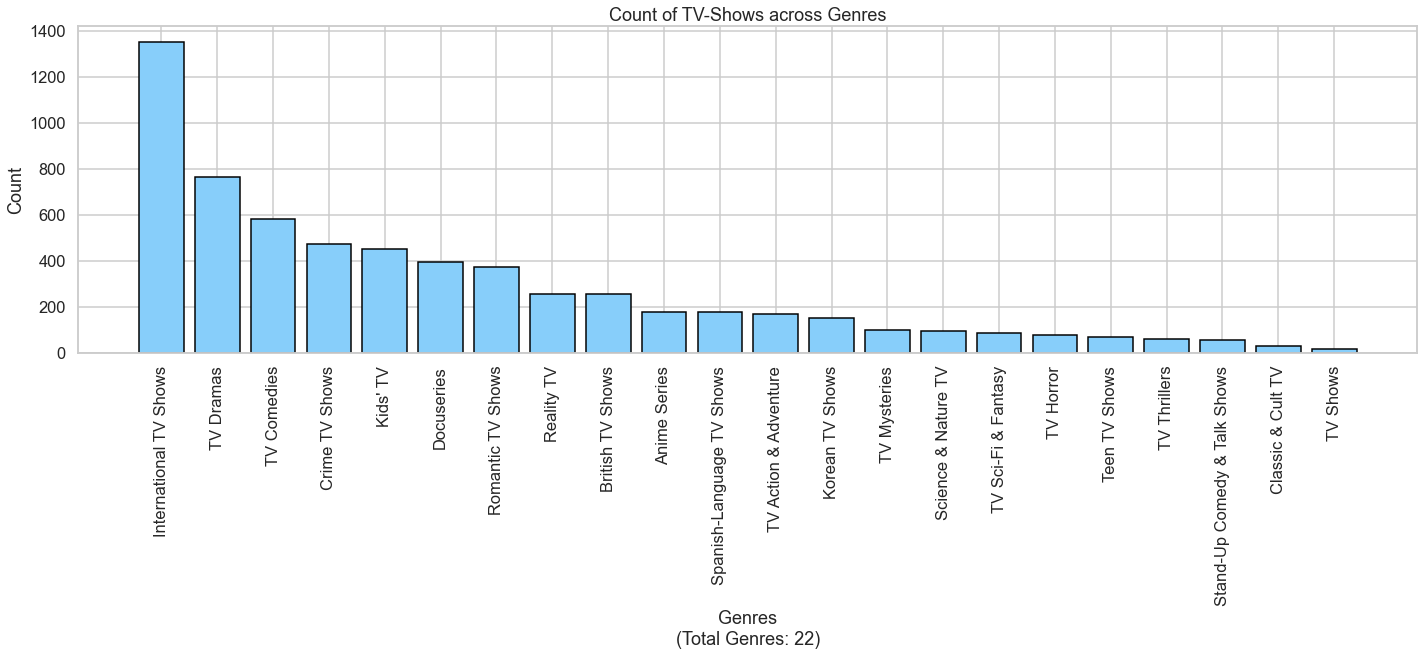

-  ***Popular TV-Show Ratings:*** 
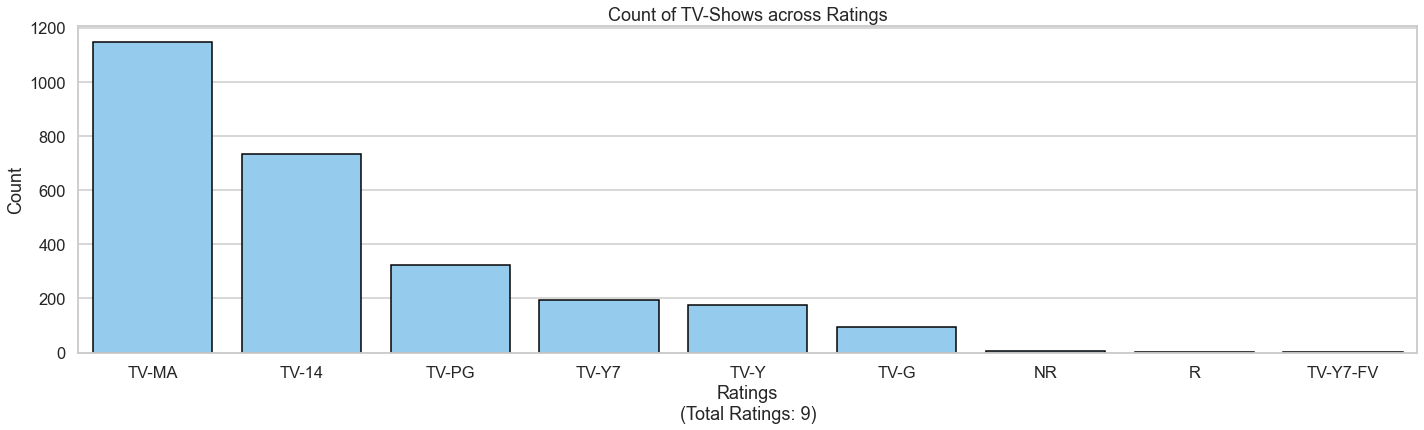


***RECOMMENDATIONS:***
-  We can clearly see the popular genres and ratings for both Movies and TV-Shows that are present in Netflix
-  This gives us a fair idea about the kind of content that is in demand and people want to watch
-  For the subsequent content that are produced or launched on the Netflix platform, we can consciously make a plan that the content should be from the above identified popular options so that it performs well with the audience

## ***Can we get really specific and find out the most loved genre and rating across Movies and TV-Shows?***

***INSIGHTS:***
-  Above we have seen the popular genres and rating, but what about the most loved genre and rating?
-  Sometimes the budget for content production can be limited. In such cases, we would like to know the best genre and the best rating so that we can produce the content accordingly.
-  We have tried to see the count of movies/show across the Top-5 genres and Top-5 Ratings
-  ***For Movies:***
    -  Top Genre: International Movies
    -  Top Rating: TV-MA / TV-14
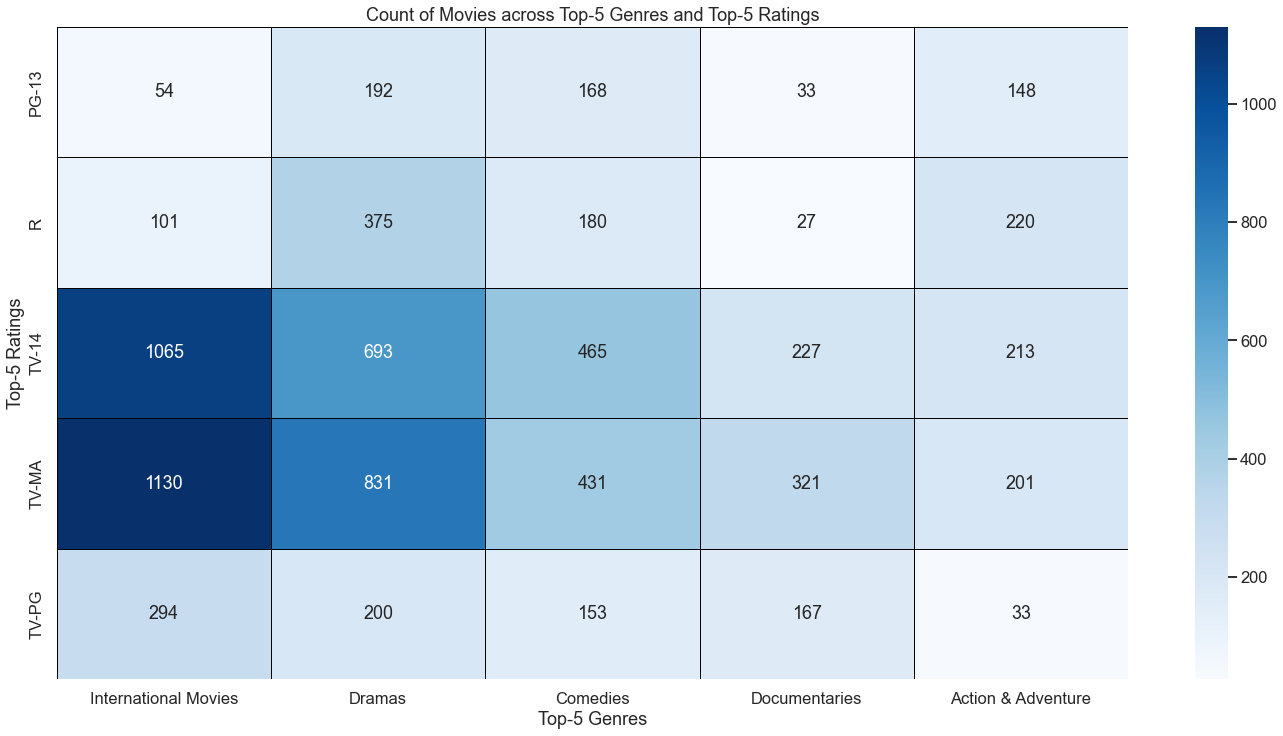
-  ***For TV-Shows:***
    -  Top Genre: International TV-Shows
    -  Top Rating: TV-MA
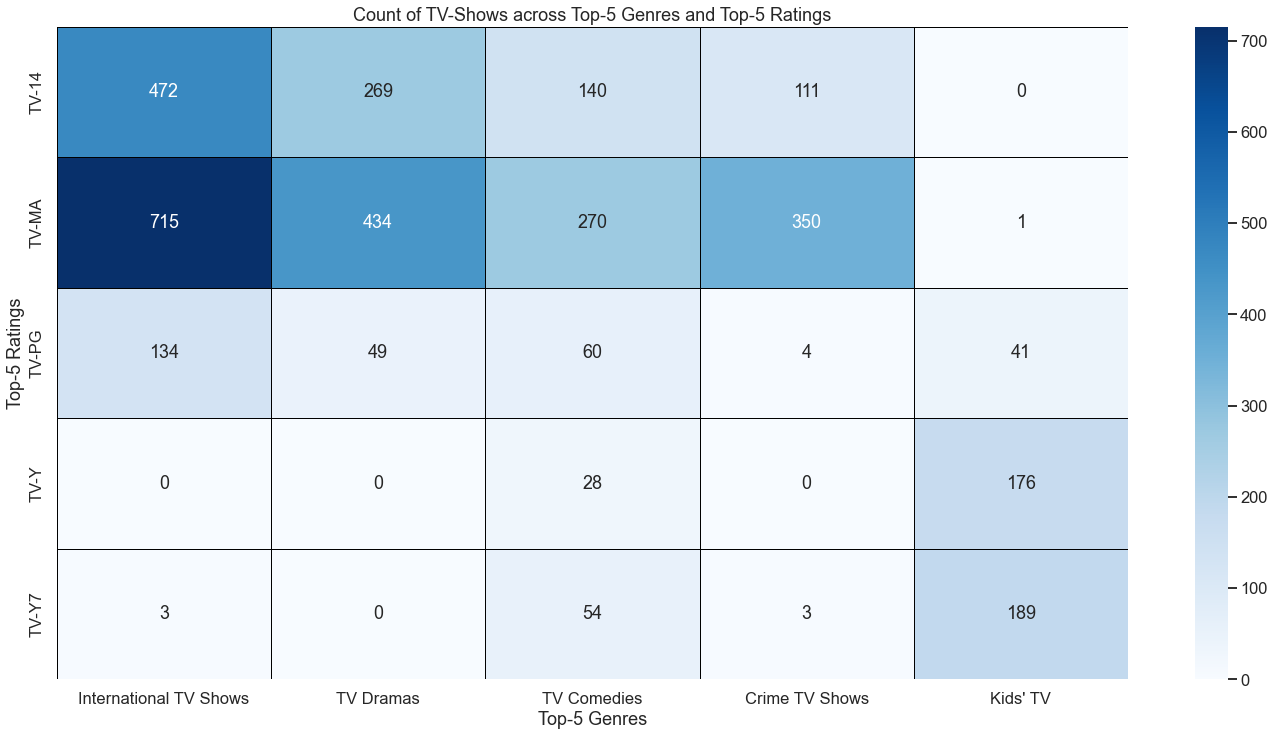

***RECOMMENDATIONS:***
-  The above plots give us the count of content across genre and rating. From this data we can clearly identify the genres and ratings which are the most in demand.
-  A by-product of the above plot is that we also become aware of the those genres and rating combinations for which the content is not there and there may be scope for more such content to target a particular kind of audience
    -  This is very evident in the TV Show plot. 
    -  Some of the boxes being 0 actually make sense and has got more to do with the nature of the content 
        -  eg: Kid's TV genre has little or no shows with mature ratings
    -  However genre = comedy and rating = (TV-Y7, TV-Y, TV-PG) have fewer content and there may be scope to create more content here (especially if there are some hit TV-Shows already present under these combibnations)

## ***What is the mean Running time / Seasons for Movies and TV-Shows respectively?***

***INSIGHTS:***
-  Again we will focus only on the content that falls in the Top-5 Genres and Top-5 Ratings across Movies and TV-Shows.
-  From the below plots, we can get an understanding about the mean running time for movies and mean seaosns for TV-Shows across different combinations of genres and ratings.
-  ***For Movies:***
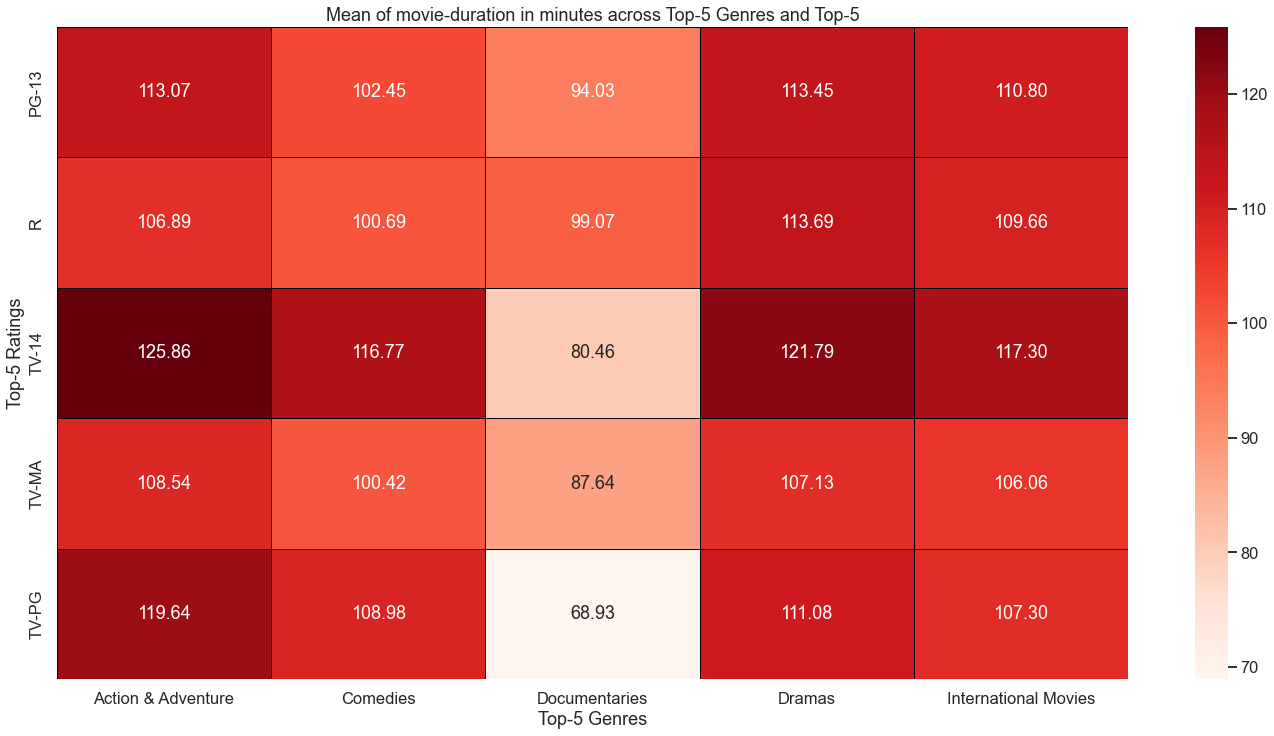
-  ***For TV-Shows:***
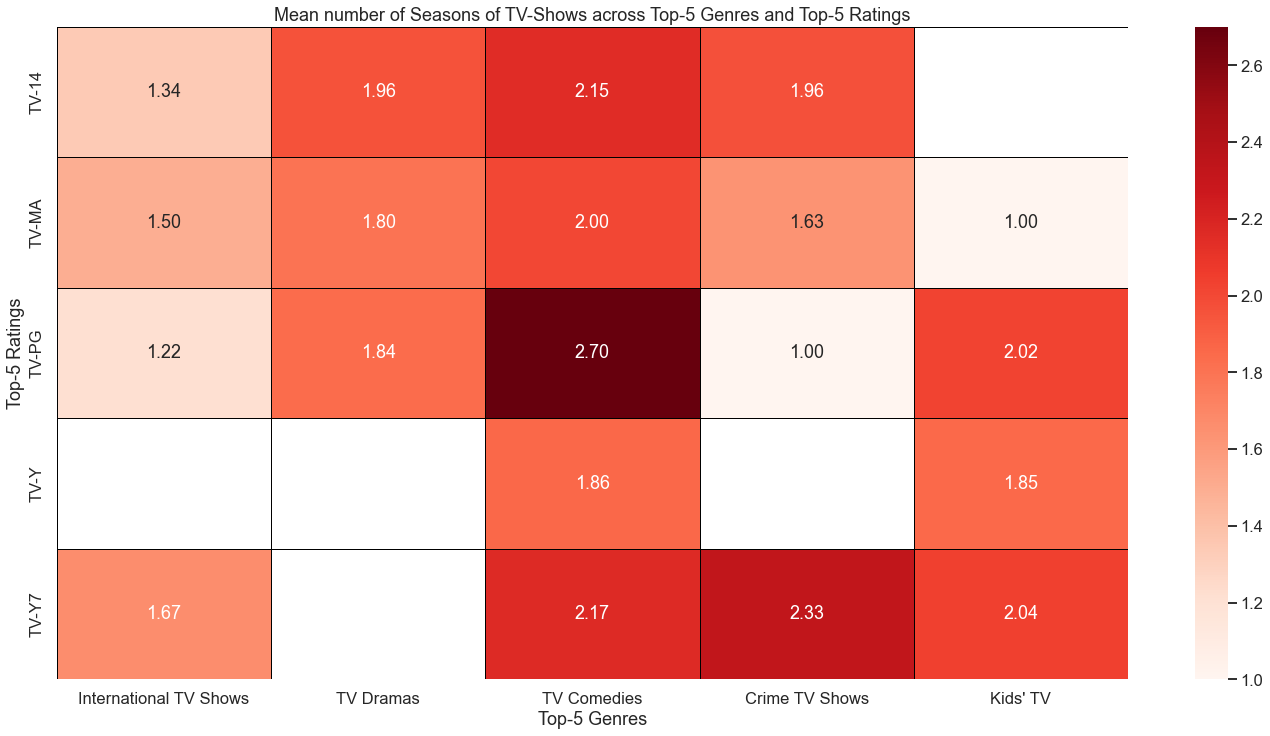

***RECOMMENDATIONS:***
-  The above graphs can act as a coarse reference point for the duration of the contant already existing in Netflix.
-  The duration of the content is an important metric since it the audience engagement heavily depends on it
-  For Movies: The most in demand genre-rating combos are: 
    -  **International Movies + TV-MA:** *Mean running time is* ***109 mins***
    -  **International Movies + TV-14:** *Mean running time is* ***126 mins***
-  For TV-Shows: The most in demand genre-rating combos are: 
    -  **International TV-Show + TV-MA:** *Mean number of seasons is* ***1-2 Seasons***
-  Thus we can see how we can use the above data for making the content more curated

## ***What are the top content producing countries?***

***INSIGHTS:***
-  Below are the plots showing number of Movies/TV-Shows per content producing countries
-  ***For Movies:***
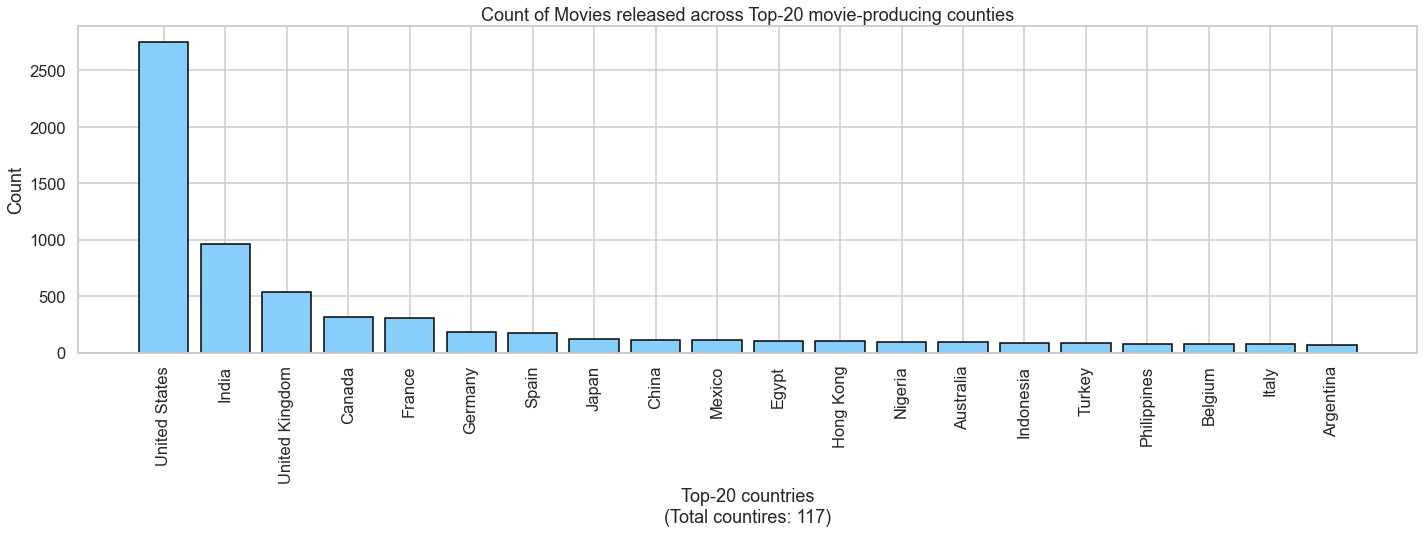
-  ***For TV-Shows:***
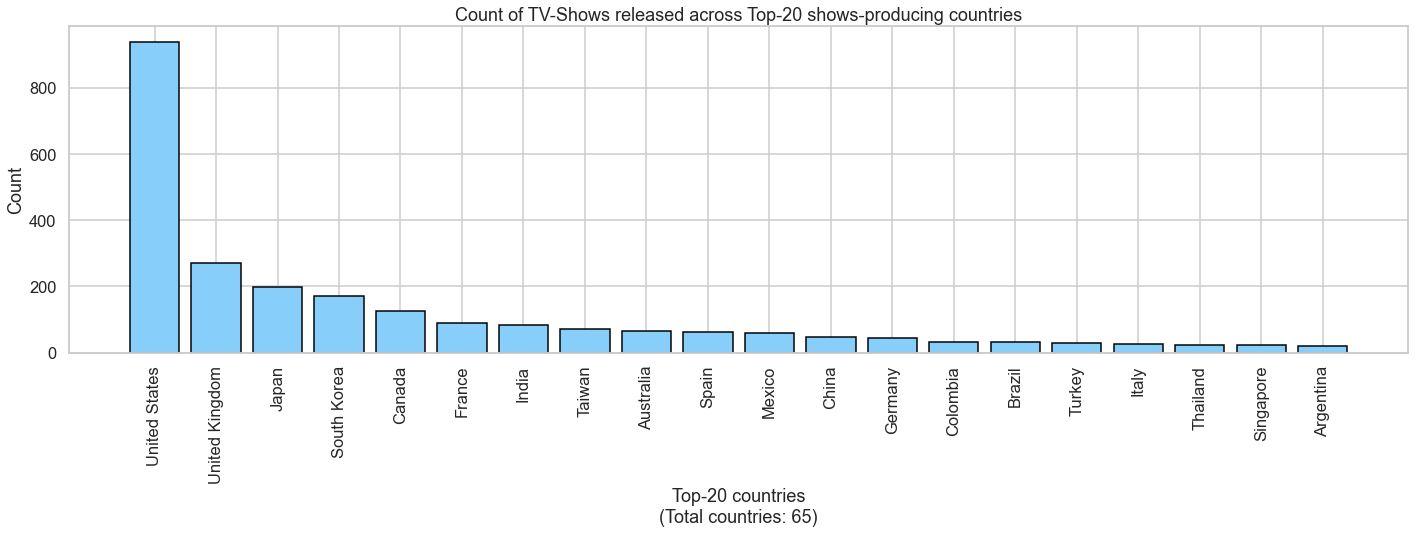



***RECOMMENDATIONS:***
-  We can identify the top content creating countries and do subsequent country specific analysis on the Top-5 countries for Movies and TV-Shows seperately.
-  Each country is unique and different and the content preferred will be different across the cultures.
-  We want to make curated content in those countries where the total amount of movies/shows are significant, hence this insight is critical

## ***Country specific analysis for Movies (Top-5 countries)***

***INSIGHTS:***
-  The top-5 Movie producing countries are:
    1. US
    2. India
    3. UK
    4. Canada
    5. France


#### **What are the popular genres across countries?**  
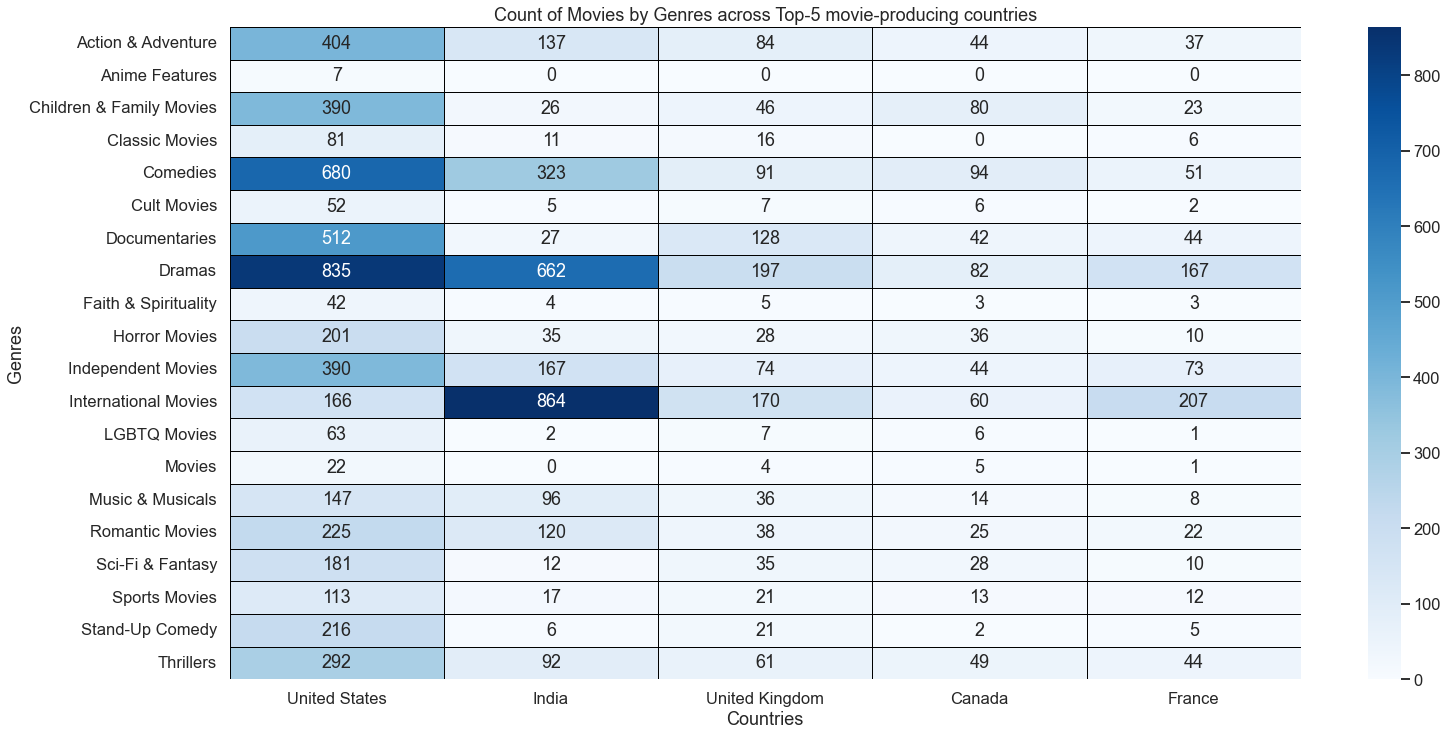  

#### **What are the popular ratings across countries?**  
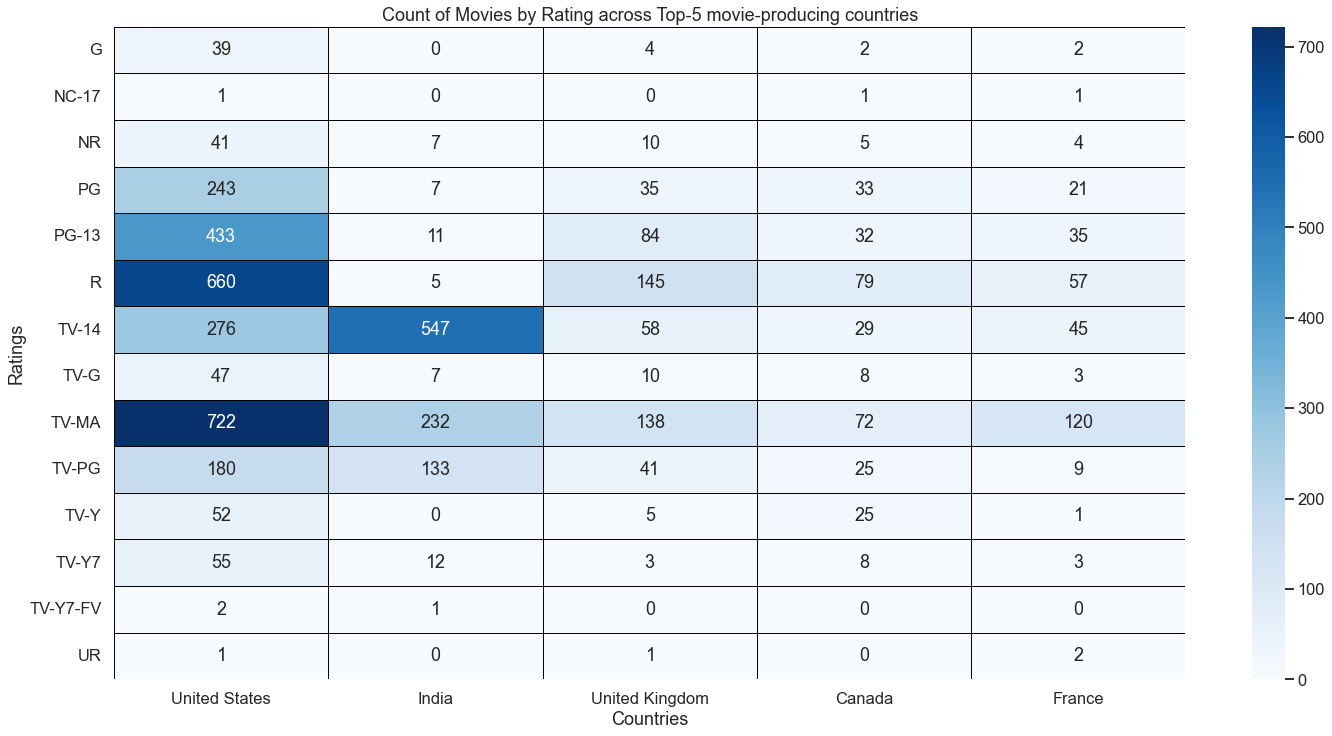  

#### **What is the mean Movie running time across countries?**  
-  Movies produced in India are longer than all the other countries considered here  
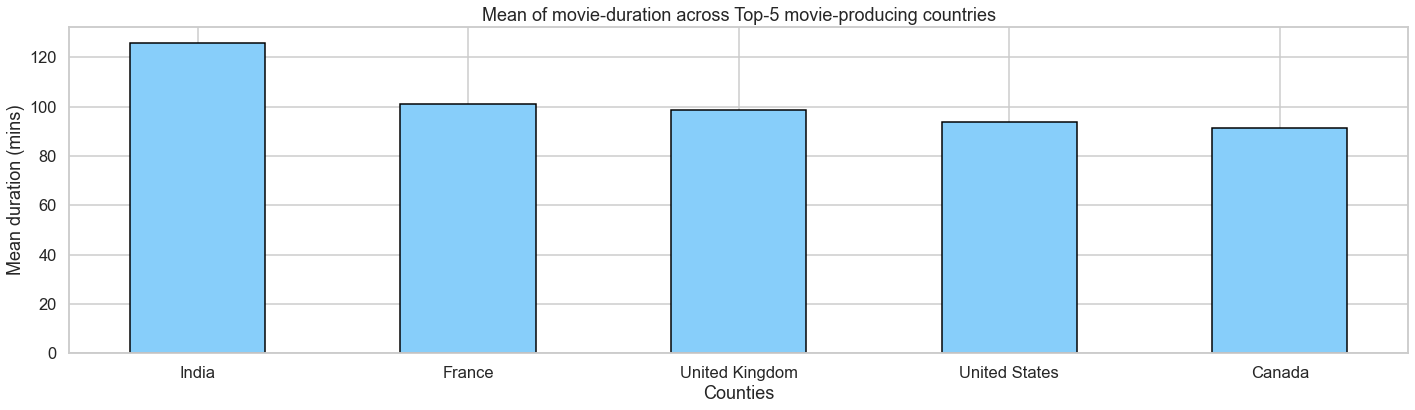  

#### **How are the movies added over the years across countries?**  
-  Number of Movies produced in the US and India are showing a decline after experiencing prominent peaks  
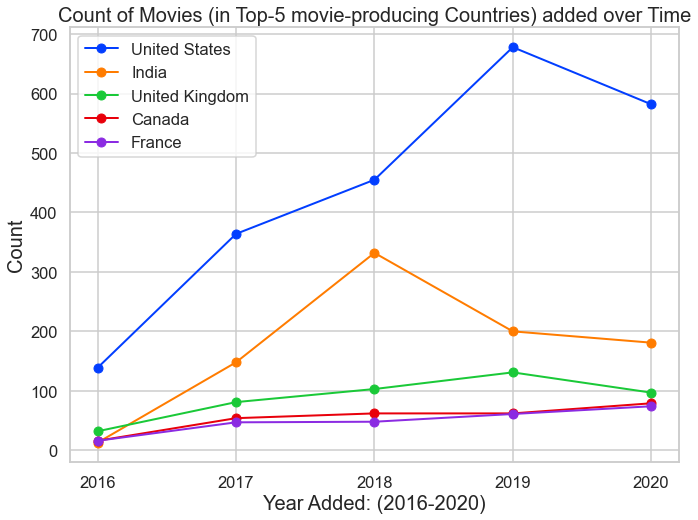


***RECOMMENDATIONS:***
-  **Popular Genres**
    1. US: Dramas
    2. India: International Movie
    3. UK: Dramas
    4. Canada: Comedies
    5. France: International Movies
-  **Popular Ratings**
    1. US: TV-MA
    2. India: TV-14
    3. UK: R
    4. Canada: R
    5. France: TV-MA
-  **Decline in movies produced in prominent markets (ALARMING!!)**
    -  As seen before, Movies outnumber TV-Shows in Netflix and thus we can assume that they generate the majority of the revenue for Netflix.
    -  Even though the general trend suggests than number of movies added on Netflix has declined in the recent years, the US and India are the Top-2 countries where movies are produced.
    -  This is a cause of serious concern and we must find out what is the reason for this
        -  Is the pricing too high?
        -  Are TV-Shows taking over in these markets?
        -  Or has the quality and customer review of the movies added recently been poor?

## ***Country specific analysis for TV-Shows (Top-5 countries)***

***INSIGHTS:***
-  The top-5 TV-Show producing countries are:
    1. US
    2. UK
    3. Japan
    4. South Korea
    5. Canada


#### **What are the popular genres across countries?**  
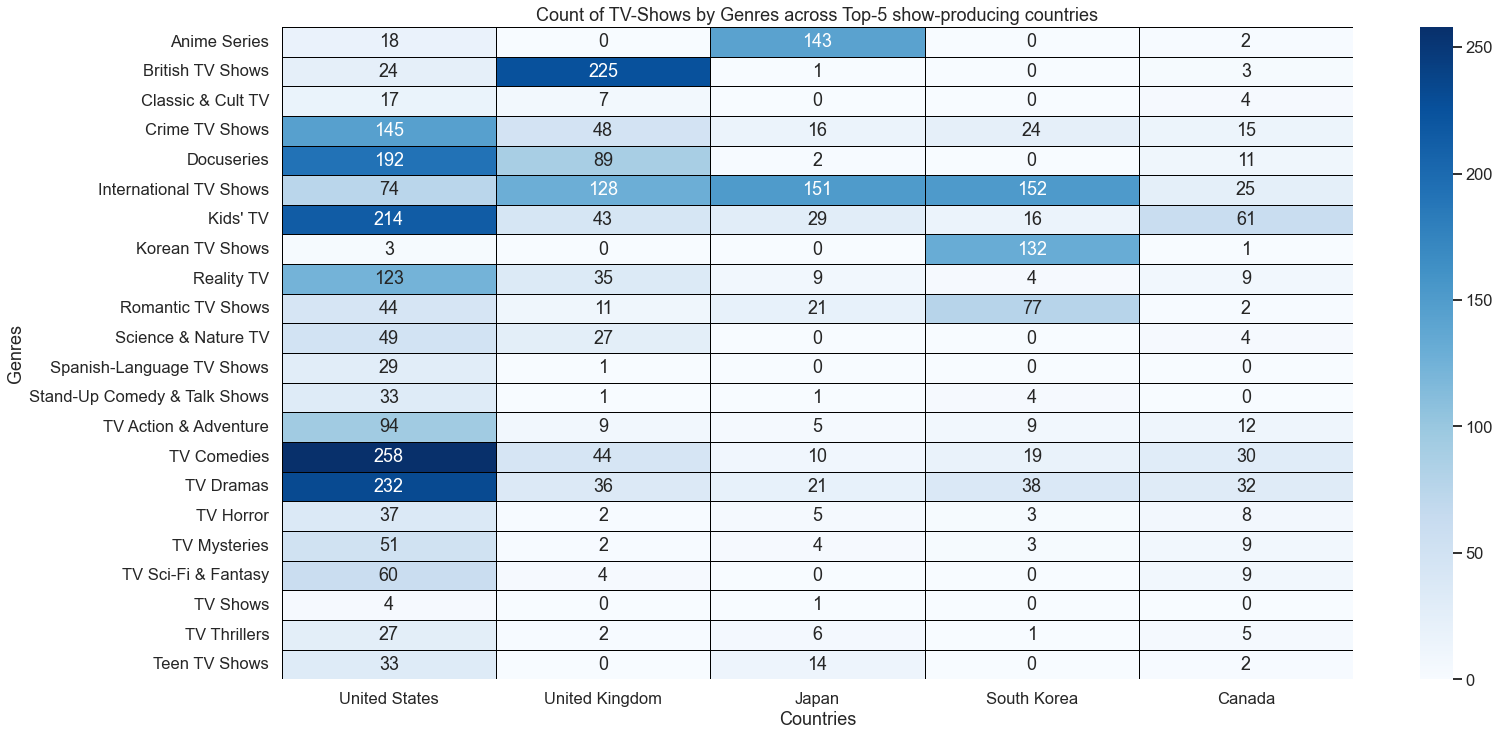

#### **What are the popular ratings across countries?**  
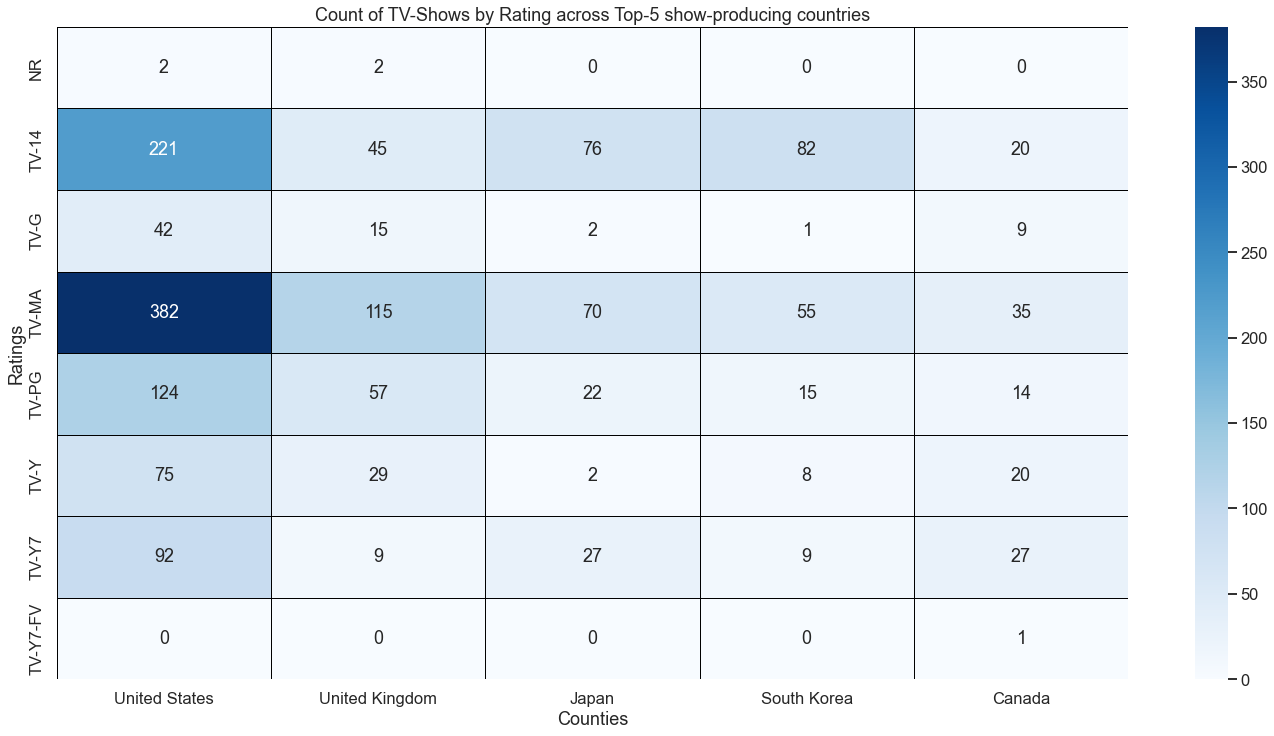

#### **What is the mean number of seasons of TV-Shows across countries?**  
-  TV-Shows produced in Canada run for longer number of seasons than all the other countries considered here
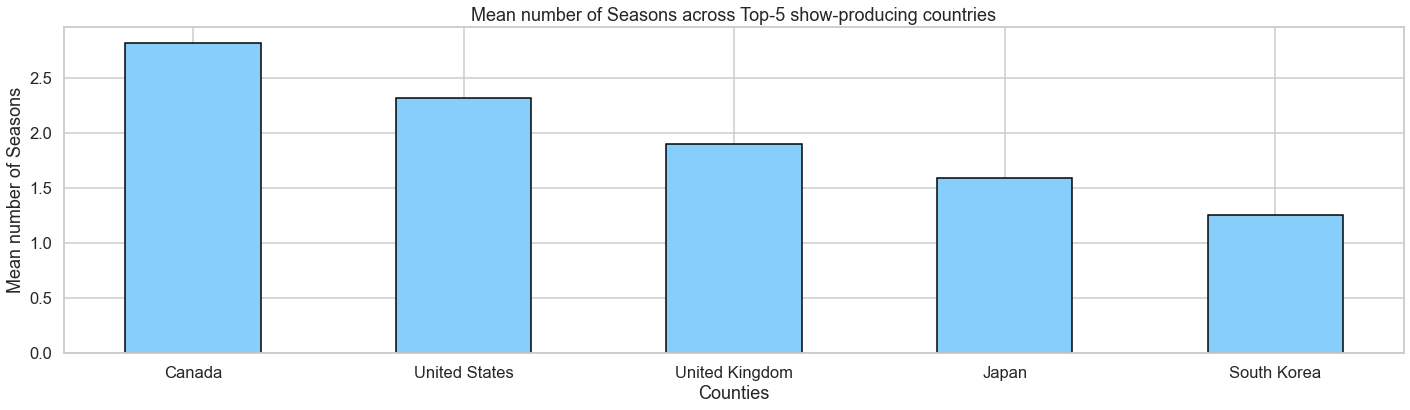 

#### **How are the TV-Shows added over the years across countries?**  
-  Number of TV-Shows produced in the US is steadily increasing  
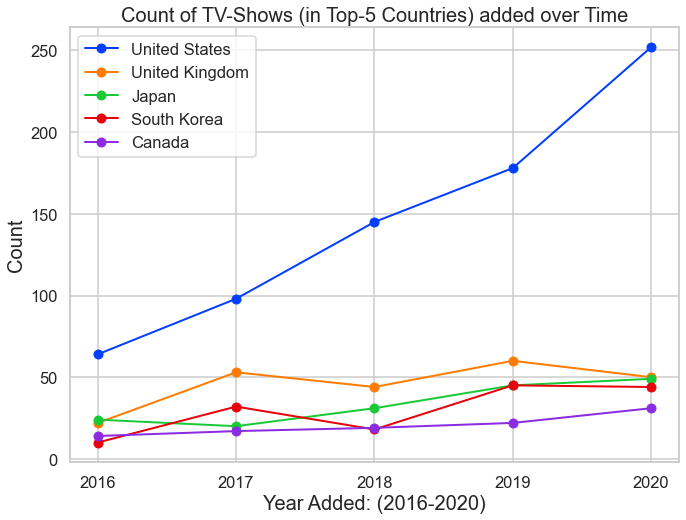


***RECOMMENDATIONS:***
-  **Popular Genres**
    1. US: TV Comedies
    2. UK: British TV Shows
    3. Japan: International TV Shows, Anime Series
    4. South Korea: International TV Shows, Korean TV Shows
    5. Canada: Kid's TV
-  **Popular Ratings**
    1. US: TV-MA
    2. UK: TV-MA
    3. Japan: TV-14
    4. South Korea: TV-14
    5. Canada: TV-MA
-  **US is a booming market for launching TV-Shows**
    -  We have seen earlier that the number of TV-Shows added on Netflix has grown over the last few years.
    -  Thus going by recent trends, the demand of TV-Shows is increasing
    -  From the data above we see that the demand in the US for TV-Shows has rapidly grown and overshadowed the other countries.
        -  This makes the US the perfect market to launch even more TV-Shows and with the information that we drew above we can make curated content so that the shows become big hits.

## **TV Shows which ran for more than 3 seasons vs those that didnt**

***INSIGHTS***
-  We want to understand what makes a TV Show successful.
-  The very fact that a TV show gets sanctioned for a new season is a proof of the fact that the show was well received by the audience and there is scope for airing 1 more season.
-  If we proceed with the assumption, we can segregate TV-Shows into 2 buckets
    -  Group A- Shows which ran for <= 3 season
    -  Group B- Shows which ran for > 3 seasons
- The aim of this analysis is to get some parammeters on which shows with higher number of seasons differ from those with less seasons

**Count of shows in Group-A vs Group-B:**  
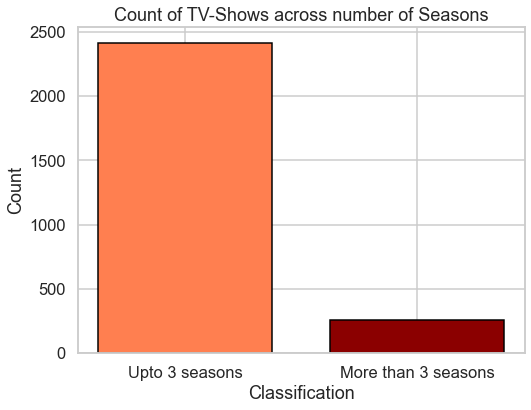

**Count of shows in Group-A vs Group-B by Rating:**  
-  TV-14 and TV-MA are the ratings which form the majority when it comes to the shows with higher number of seasons
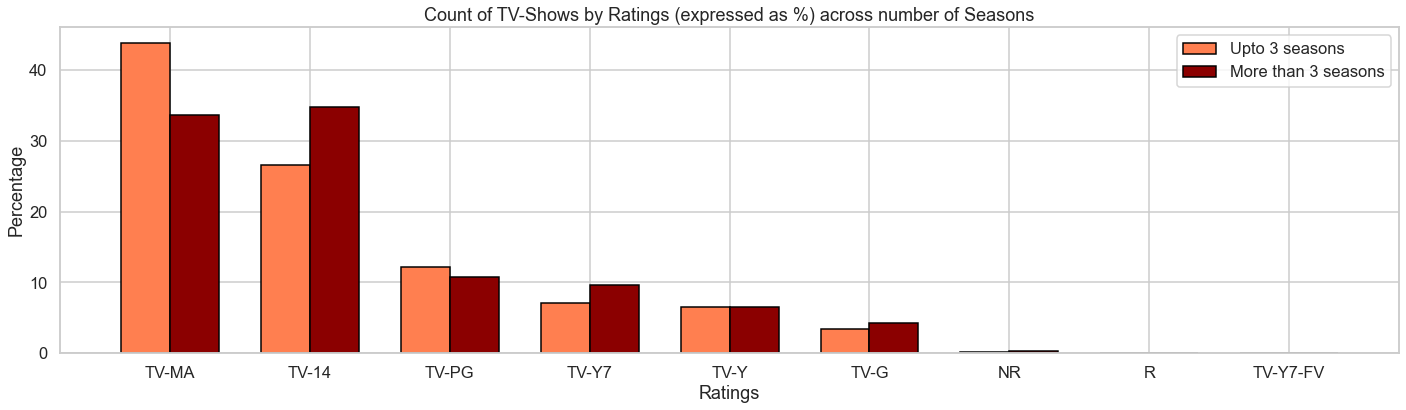

**Count of shows in Group-A vs Group-B by Genre:**
-  TV Comedies seem to be the genre which run for higher number of seasons followed by TV Dramas
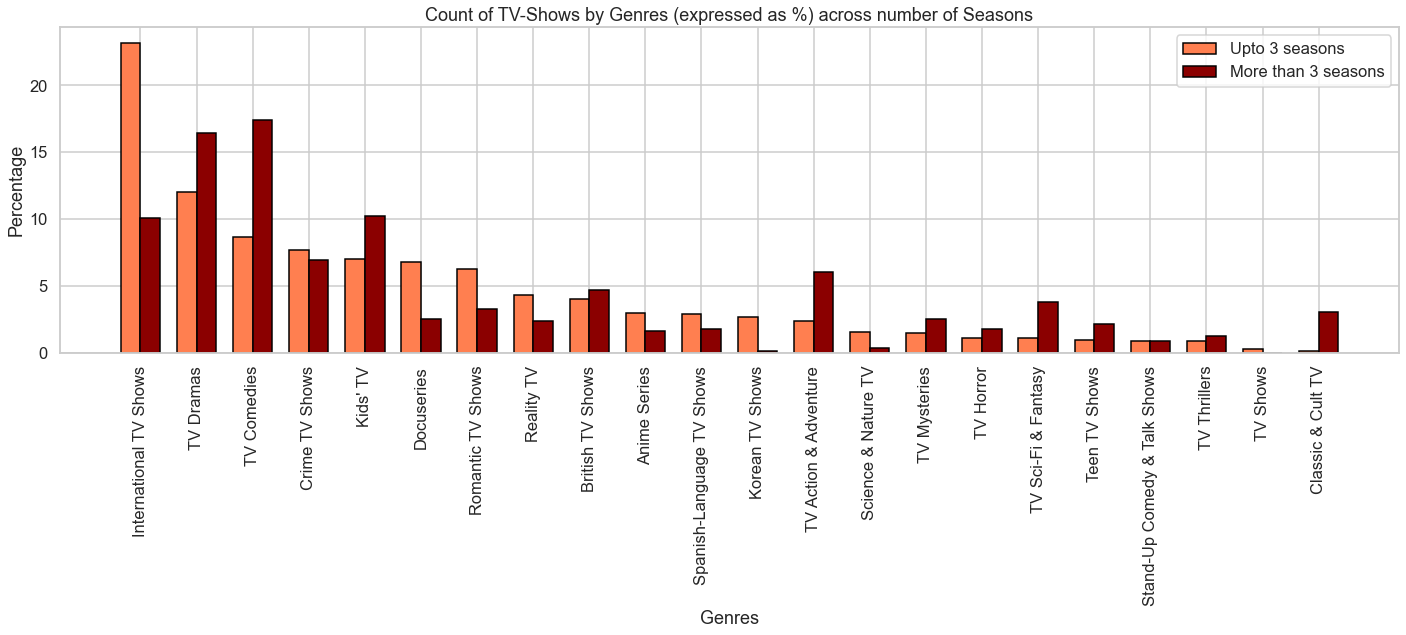

**Temporal Trend on how the shows (of Group A and Group B) were added in Netflix over time:**  
-  We observe that in recent years more shows were added on Netflix which ran for higher number of seasons
-  Note that the data for 2021 is not for the complete year and only the first 9 months 
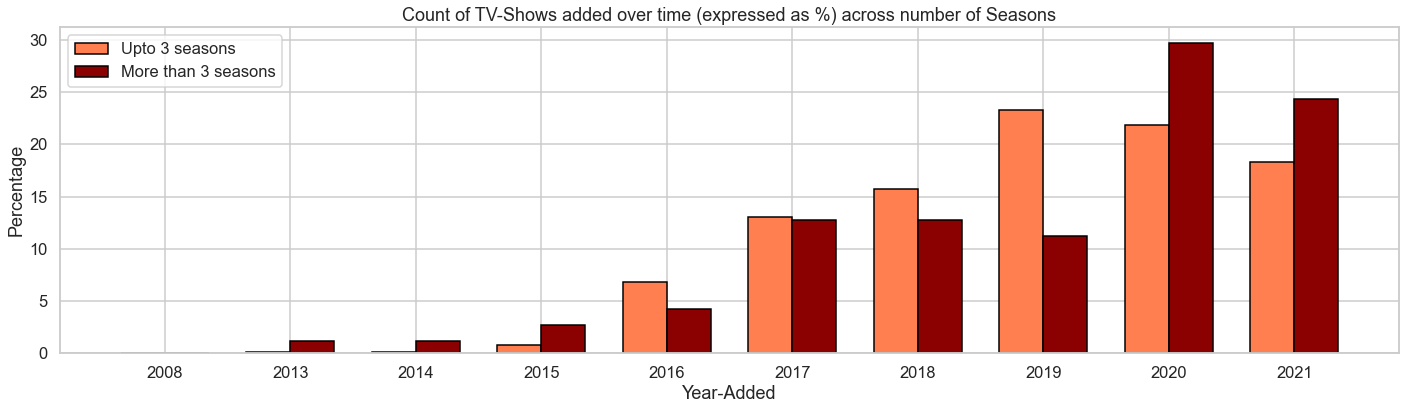


***RECOMMENDATIONS:***
-  The fact that the demand of TV-Shows has increased over time can be explained by the fact that the number of shows with high seasons added over time has also increased
-  Thus if we do consider the shows with high seasons to be audience hits, then there is something to learn from them:
    -  We have identified the genres and ratings of these succesful shows
    -  We can launch more such shows on Netflix
    -  Even when Netflix is creating new content, this data point can be kept in mind